# IAU-PROJEKT, STAHOVEC a VIEST

------------------------------------------------
Projekt začína základnými importmi pre knižnice, ktoré budeme v projekte používať.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import mannwhitneyu
import statsmodels.api as sm
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

pd.options.mode.chained_assignment = None

In [2]:
sns.set_theme(style="whitegrid", palette="viridis")
sns.set_palette("viridis")

Hneď na začiatok si **načítame dáta** zo súboru funkciou **read_csv()**
Následne vykonáme prvú "čistiacu" operáciu, v ktorej vymažeme prvý stĺpec, v ktorom
je očíslovanie stĺpcov, ktoré je pre našu analýzu zbytočné.

In [3]:
data_labor = pd.read_csv("dataset/labor.csv", sep="\t")
# del data["Unnamed: 0"]
data_labor = data_labor.iloc[:, 1:]
data_labor

,smoker,hbver,erytrocyty,alt,leukocyty,etytr,hemoglobin,ssn,name,trombocyty,alp,relationship,indicator,er-cv,weight,ast,hematokrit
0,yes,4.98718,8.89463,2.40520,5.75830,6.93712,4.54976,021-87-4523,Jeremy Tanner,6.23782,45.93625,divoced,0.0,55.43592,-2.73558,51.62366,3.34206
1,yes,6.67732,4.21847,0.66072,6.29064,5.19990,4.10863,513-39-9691,Jocelyn Kelly,6.27100,20.30249,divoced,0.0,45.34617,81.56533,61.59374,5.78180
2,no,6.51444,7.94461,1.28337,5.83567,6.88758,6.45793,881-46-4810,Crystal Kelley,6.02783,82.09305,divoced,0.0,29.29190,151.24191,47.96329,4.55230
3,no,6.05025,7.67537,0.83197,6.33300,4.45912,6.96013,826-16-7757,Doris Duncan,6.83876,69.43441,divoced,1.0,60.47398,83.89451,57.47174,7.17271
4,yes,6.20737,7.84993,0.93395,5.66904,4.88628,6.41332,167-37-6059,John Parks,5.75903,90.09567,divoced,1.0,41.10299,107.22958,34.25820,6.93681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9966,Y,5.17020,5.61728,0.60775,5.35296,4.59956,5.52802,425-94-7489,Ryan Pineda,3.86179,75.76127,single,0.0,38.06206,60.90926,41.67857,4.57350
9967,no,5.70666,8.82840,2.35342,5.20966,3.73586,6.25482,375-27-0860,Travis Brown,5.03429,85.17538,widowed,1.0,48.35999,106.88451,23.49894,7.00122
9968,Y,6.45549,6.83179,0.62415,7.84688,4.52864,5.57765,300-91-9095,Michelle Watson,6.38035,79.13200,married,1.0,28.09339,75.74349,23.52645,6.94466
9969,Y,4.81311,7.26178,0.84372,6.76794,7.54696,7.07142,691-20-7896,Ryan Hahn,5.27933,79.64629,married,0.0,56.63966,52.15898,31.12380,4.98399


V nasledujúcich bunkách sme **nahradili chýbajúce hodnoty** priemerom v danom stĺpci.
Túto operáciu sme mohli vykonať z dôvodu, že všetky **chýbajúce hodnoty** boli iba v tých
stĺpcoch, ktoré obsahujú **numerické hodnoty** (float64).

Ešte predtým sme overili, či data_labor skutočne obsahuje nejaké chýbajúce hodnoty.

In [4]:
data_labor.isna().sum()

smoker           0
hbver           31
erytrocyty      32
alt             30
leukocyty       30
etytr           31
hemoglobin      31
ssn              0
name             0
trombocyty      30
alp             30
relationship     0
indicator        0
er-cv           30
weight           0
ast             30
hematokrit      30
dtype: int64

In [5]:
data_labor = data_labor.fillna(data_labor.mean())
data_labor

C:\Users\PC\AppData\Local\Temp/ipykernel_11160/3025875362.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_labor = data_labor.fillna(data_labor.mean())


,smoker,hbver,erytrocyty,alt,leukocyty,etytr,hemoglobin,ssn,name,trombocyty,alp,relationship,indicator,er-cv,weight,ast,hematokrit
0,yes,4.98718,8.89463,2.40520,5.75830,6.93712,4.54976,021-87-4523,Jeremy Tanner,6.23782,45.93625,divoced,0.0,55.43592,-2.73558,51.62366,3.34206
1,yes,6.67732,4.21847,0.66072,6.29064,5.19990,4.10863,513-39-9691,Jocelyn Kelly,6.27100,20.30249,divoced,0.0,45.34617,81.56533,61.59374,5.78180
2,no,6.51444,7.94461,1.28337,5.83567,6.88758,6.45793,881-46-4810,Crystal Kelley,6.02783,82.09305,divoced,0.0,29.29190,151.24191,47.96329,4.55230
3,no,6.05025,7.67537,0.83197,6.33300,4.45912,6.96013,826-16-7757,Doris Duncan,6.83876,69.43441,divoced,1.0,60.47398,83.89451,57.47174,7.17271
4,yes,6.20737,7.84993,0.93395,5.66904,4.88628,6.41332,167-37-6059,John Parks,5.75903,90.09567,divoced,1.0,41.10299,107.22958,34.25820,6.93681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9966,Y,5.17020,5.61728,0.60775,5.35296,4.59956,5.52802,425-94-7489,Ryan Pineda,3.86179,75.76127,single,0.0,38.06206,60.90926,41.67857,4.57350
9967,no,5.70666,8.82840,2.35342,5.20966,3.73586,6.25482,375-27-0860,Travis Brown,5.03429,85.17538,widowed,1.0,48.35999,106.88451,23.49894,7.00122
9968,Y,6.45549,6.83179,0.62415,7.84688,4.52864,5.57765,300-91-9095,Michelle Watson,6.38035,79.13200,married,1.0,28.09339,75.74349,23.52645,6.94466
9969,Y,4.81311,7.26178,0.84372,6.76794,7.54696,7.07142,691-20-7896,Ryan Hahn,5.27933,79.64629,married,0.0,56.63966,52.15898,31.12380,4.98399


In [6]:
data_labor.describe()

,hbver,erytrocyty,alt,leukocyty,etytr,hemoglobin,trombocyty,alp,indicator,er-cv,weight,ast,hematokrit
count,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000
mean,6.071692,6.842049,1.120983,6.064355,5.318564,6.062952,6.084395,54.622262,0.643165,51.121580,70.305658,50.459989,6.461410
std,1.000834,1.460087,2.019724,1.009118,1.393256,1.741981,1.006202,26.103211,0.479090,12.856008,34.976941,12.771838,1.617865
min,2.148000,1.103640,0.000000,2.239400,0.548790,0.000000,2.587100,0.000000,0.000000,0.000000,-54.061950,0.000000,1.991860
25%,5.401305,6.037930,0.563945,5.393100,4.444160,4.780500,5.407585,31.460750,0.000000,42.546015,46.128010,41.770680,5.127505
50%,6.071692,7.004430,0.780950,6.071080,5.120390,6.115310,6.084395,58.533820,1.000000,50.954600,70.793900,50.618370,6.753050
75%,6.742105,7.807580,1.166560,6.730190,6.019805,7.378890,6.765420,78.880725,1.000000,59.861495,94.071090,59.039665,7.490275
max,10.532500,12.769020,100.000000,9.767710,10.673750,11.720370,9.774760,100.000000,1.000000,100.000000,194.734070,100.000000,13.021170


# 1. fáza - Prieskumná analýza

#### Percentuálny podiel práce: Stahovec = 50%, Viest = 50%

## a) Základný opis dát spolu s ich charakteristikami
-------------------------------------------------------
Základné informácie o datasete:

In [7]:
print(f"Počet záznamov v našom datasete: {len(data_labor.index)}")
print(f"Počet atribútov v našom datasete: {len(data_labor.columns)}")
# print(f"Dátové typy v našom datasete:\n {data_labor.dtypes}")
print(f"Dátové typy v našom datasete: {list(set(data_labor.dtypes))}")

Počet záznamov v našom datasete: 9971
Počet atribútov v našom datasete: 17
Dátové typy v našom datasete: [dtype('float64'), dtype('O')]


V tejto časti uvedieme pre zvolené **významné atribúty ich distribúcie a základné
deskriptívne štatistiky.**
Medzi tieto významné atribúty patria **erytrocyty, leukocyty, trombocyty, váha a
hemoglobín**.
Pre ich deskriptívne štatistiky uvádzame **medián, modus, priemer, rozptyl a smerodajnú odchylku.**
<br>

Hodnota modusu je väčšinou **rovná priemeru**, keďže nahradzujeme chýbajúce hodnoty priemerom. Je
potrebné brať tieto hodnoty s rezervou, keďže dáta ešte neboli očistené a mnoho záznamov spadá
do surreálnych hodnôt (napr. záporné záznamy pre atribút váhy).
</br>

###  Erytrocyty

Pri erytrocytoch vidíme, že na začiatku krivky je mierna odchýlka, ktorá spôsobuje to,
že táto distribúcia
nie je Gaussova aj keď, približne od hodnoty 5 na x-ovej osi by sa dalo povedať,
že distribúcia je normálová.

[erytrocyty] Medián:   7.00443
[erytrocyty] Modus:    6.842048781567562
[erytrocyty] Priemer:  6.842048781567561
[erytrocyty] Rozptyl:  2.1316401076201124
[erytrocyty] Smerodajná odchylka:  1.4600137354217297


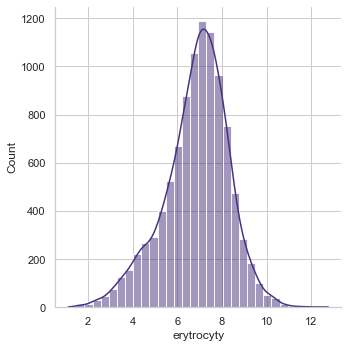

In [8]:
sns.displot(data_labor["erytrocyty"], kde=True, bins=32)
# sns.histplot(data=data_labor, x="erytrocyty", bins=24, kde=True)
print(f"[erytrocyty] Medián:  ", data_labor["erytrocyty"].median())
print(f"[erytrocyty] Modus:   ", data_labor.mode()["erytrocyty"][0])
print(f"[erytrocyty] Priemer: ", data_labor["erytrocyty"].mean())
print(f"[erytrocyty] Rozptyl: ", np.var(data_labor["erytrocyty"]))
print(f"[erytrocyty] Smerodajná odchylka: ", np.std(data_labor["erytrocyty"]))

### Leukocyty

Pri leukocytoch vidíme menší spike presne v strede distribúcie, čo môže byť náhoda
znásobená faktom, že sme nahradzovali chýbajúce hodnoty údajom, ktorý sa nachádza
práve na tom mieste.

[leukocyty] Medián:   6.07108
[leukocyty] Modus:    6.064355209737452
[leukocyty] Priemer:  6.0643552097374505
[leukocyty] Rozptyl:  1.0182179280312194
[leukocyty] Smerodajná odchylka:  1.0090678510542388


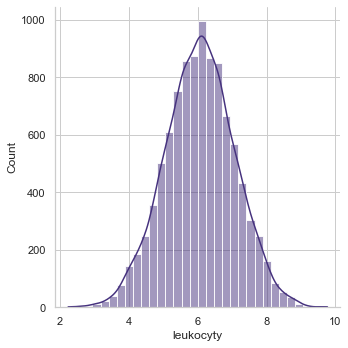

In [9]:
sns.displot(data_labor["leukocyty"], kde=True, bins=32)
# sns.histplot(data=data_labor, x="leukocyty", bins=24, kde=True)
print(f"[leukocyty] Medián:  ", data_labor["leukocyty"].median())
print(f"[leukocyty] Modus:   ", data_labor.mode()["leukocyty"][0])
print(f"[leukocyty] Priemer: ", data_labor["leukocyty"].mean())
print(f"[leukocyty] Rozptyl: ", np.var(data_labor["leukocyty"]))
print(f"[leukocyty] Smerodajná odchylka: ", np.std(data_labor["leukocyty"]))


### Trombocyty

Pri trombocytoch vidíme pomerne veľkú odchýlku v strede distribúcie. Inak je distribúcia Gaussova,
čo znamená, že hodnoty sú rovnomerne rozložené naprieč grafom.

[trombocyty] Medián:   6.084394732924253
[trombocyty] Modus:    6.084394732924253
[trombocyty] Priemer:  6.084394732924253
[trombocyty] Rozptyl:  1.0123415736654913
[trombocyty] Smerodajná odchylka:  1.0061518641166904


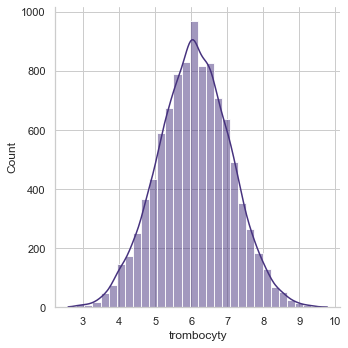

In [10]:
sns.displot(data_labor["trombocyty"], kde=True, bins=32)
# sns.histplot(data=data_labor, x="trombocyty", bins=24, kde=True)
print(f"[trombocyty] Medián:  ", data_labor["trombocyty"].median())
print(f"[trombocyty] Modus:   ", data_labor.mode()["trombocyty"][0])
print(f"[trombocyty] Priemer: ", data_labor["trombocyty"].mean())
print(f"[trombocyty] Rozptyl: ", np.var(data_labor["trombocyty"]))
print(f"[trombocyty] Smerodajná odchylka: ", np.std(data_labor["trombocyty"]))

### Váha

Ako sme vyčítali z metódy describe() na začiatku, tak na grafe sa nám potvrdilo,
že niektoré hodnoty váh siahajú do záporného regiónu. O to sa postaráme neskôr
v tomto notebooku.

[weight] Medián:   70.7939
[weight] Modus:    -13.06891
[weight] Priemer:  70.30565801624712
[weight] Rozptyl:  1223.2637015794558
[weight] Smerodajná odchylka:  34.9751869413082


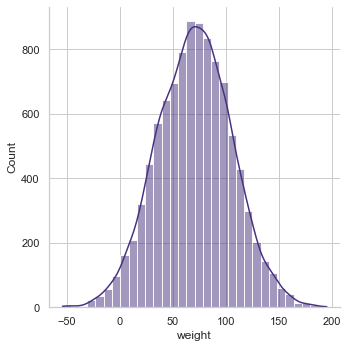

In [11]:
sns.displot(data_labor["weight"], kde=True, bins=32)
# sns.histplot(data=data_labor, x="weight", bins=24, kde=True)
print(f"[weight] Medián:  ", data_labor["weight"].median())
print(f"[weight] Modus:   ", data_labor.mode()["weight"][0])
print(f"[weight] Priemer: ", data_labor["weight"].mean())
print(f"[weight] Rozptyl: ", np.var(data_labor["weight"]))
print(f"[weight] Smerodajná odchylka: ", np.std(data_labor["weight"]))

### Hemoglobin

Pri hemoglobíne vidíme, že distribúcia nie je Gaussova, pretože má veľký sklon a v maximálnych hodnotách
je krivka široká, to znamená, že veľká časť dát má hodnotu blízku k maximálnej.

[hemoglobin] Medián:   6.11531
[hemoglobin] Modus:    6.0629517464788725
[hemoglobin] Priemer:  6.062951746478873
[hemoglobin] Rozptyl:  3.0341928901248703
[hemoglobin] Smerodajná odchylka:  1.7418934784093056


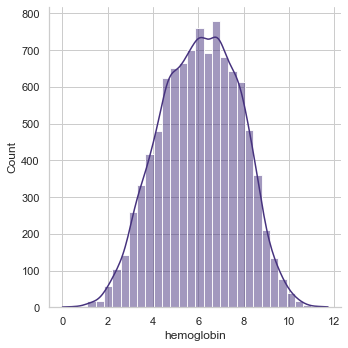

In [12]:
sns.displot(data_labor["hemoglobin"], kde=True, bins=32)
# sns.histplot(data=data_labor, x="trombocyty", bins=24, kde=True)
print(f"[hemoglobin] Medián:  ", data_labor["hemoglobin"].median())
print(f"[hemoglobin] Modus:   ", data_labor.mode()["hemoglobin"][0])
print(f"[hemoglobin] Priemer: ", data_labor["hemoglobin"].mean())
print(f"[hemoglobin] Rozptyl: ", np.var(data_labor["hemoglobin"]))
print(f"[hemoglobin] Smerodajná odchylka: ", np.std(data_labor["hemoglobin"]))

## b) Párová analýza dát
-------------------------------------------------------
### **Skúmanie vzťahov medzi dvojicami atribútov**

<br>

V tejto časti zisťujeme **závislosti** medzi rôznymi atribútmi po dvojiciach. Keďže naše dáta
ešte stále nie sú očistené, výsledné závislosti **nemôžu byť stopercentne korektné**.
</br>
<br>
Na začiatok sme vykreslili **heatmapu**, z ktorej môžeme vyčítať **závislosti medzi všetkými dvojicami
atribútov**. Vďaka tomu máme všeobecný prehľad o koreláciách v našom datasete.
</br>

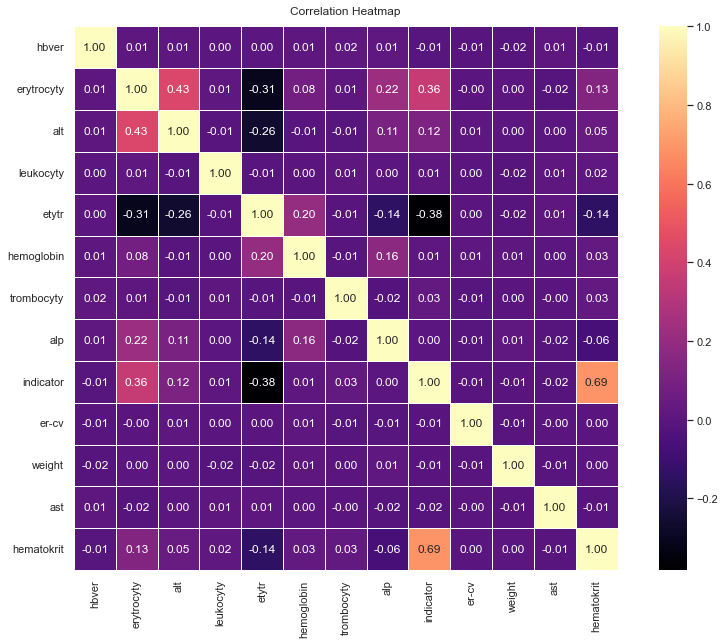

In [13]:
fig, ax = plt.subplots(figsize=(15, 10))
heatmap = sns.heatmap(data_labor.corr(), linewidths=.5, square=True,
                      annot=True, linewidth=0.5, cmap="magma", fmt=".2f")
heatmap.set_title('Correlation Heatmap', pad=12);

Heatmapa z prechádzajúcej bunky nám napovedá, ktoré atribúty môžeme skúmať z hľadiska závislostí.
Na začiatok si vyberieme dvojice, ktoré majú vyšší koeficient korelácie, a teda tie
dvojice atribútov od seba závisia.
<br>

Korelácie medzi dvojicami, ktoré sme si vybrali na párovú analýzu:
- erytrocyty - alt
- hemoglobín - alp
- hemoglobín - etytr
- erytrocyty - leukocyty

Dvojice so závislou premennou:
- indikátor - erytrocyty
- indikátor - hematokrit
- indikátor - trombocyty
- indikátor - etytr


### Erytrocyty a alt
Na tomto grafe môžeme pozerať **silnú závislosť**, keďže rozptyl dát je exponenciálna krivka.
Pri atribútoch, ktoré nekorelujú, budeme vidieť rôzne atypické "machule".
</br>

<AxesSubplot:xlabel='erytrocyty', ylabel='alt'>

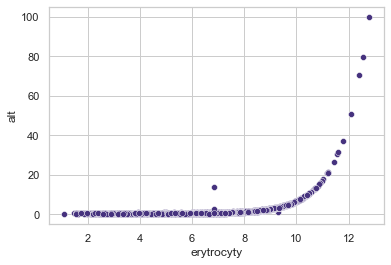

In [14]:
sns.scatterplot(data=data_labor, x="erytrocyty", y="alt")

### Hemoglobín a alp
Na danom grafe pozorujeme **sínusovú závislosť**, keďže osciluje v pravidelnom intervale.
V približnom odhade môžeme tvrdiť, že hodnoty atribútu alp dosahujú maximum vtedy,
ak sa hodnota hemoglobínu blíži k 6% a periodicky osciluje po približne šiestich
percentách.

<AxesSubplot:xlabel='hemoglobin', ylabel='alp'>

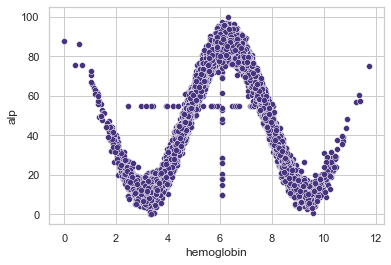

In [15]:
sns.scatterplot(data=data_labor, x="hemoglobin", y="alp")

### Hemoglobin a etytr
V danom porovnaní môžeme pozorovať miernu pozitívnu koreláciu medzi zvolenými atribútmi,
keďže distribúcia v grafe je, laicky povedané, jemne naklonená doprava hore.

<AxesSubplot:xlabel='hemoglobin', ylabel='etytr'>

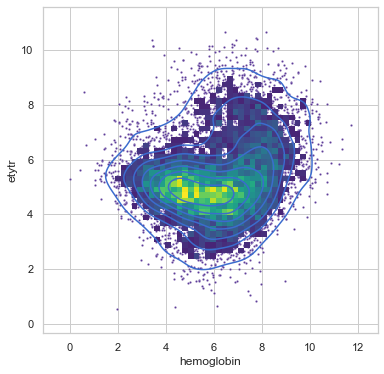

In [16]:
plt.subplots(figsize=(6, 6))
sns.scatterplot(data=data_labor, x="hemoglobin", y="etytr", s=5, color="#5e3c99")
sns.histplot(data=data_labor, x="hemoglobin", y="etytr", bins=50, pthresh=.1, cmap="viridis", shrink=.4)
sns.kdeplot(data=data_labor, x="hemoglobin", y="etytr", levels=8, color="#3b6cce")

Po relatívne závislých atribútoch sme prešli k prípadom, kedy sa korelácie pohybujú v záporných
hodnotách.

### Erytrocyty a Leukocyty
Ako prvú máme vykreslenú závislosť medzi atribútmi erytrocyty a leukocyty, ktorých hodnota korelácie
sa blíži v rádoch stotín k nule.

Nulová korelácia je pozorovateľná na grafe, keďže výskyt závislosti je roztrúsený v kruhovom tvare
uprostred grafu.

<AxesSubplot:xlabel='erytrocyty', ylabel='leukocyty'>

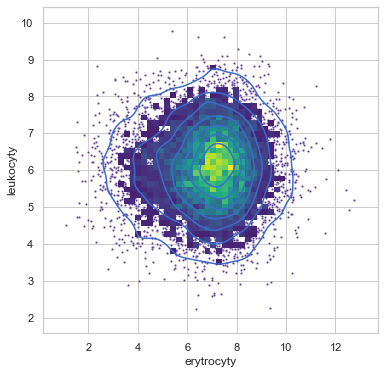

In [17]:
# sns.scatterplot(data=data_labor, x="erytrocyty", y="leukocyty")

plt.subplots(figsize=(6, 6))
sns.scatterplot(data=data_labor, x="erytrocyty", y="leukocyty", s=5, color="#5e3c99")
sns.histplot(data=data_labor, x="erytrocyty", y="leukocyty", bins=50, pthresh=.1, cmap="viridis", shrink=.4)
sns.kdeplot(data=data_labor, x="erytrocyty", y="leukocyty", levels=8, color="#3b6cce")

### Erytrocyty a etytr
Pri porovnaní atribútov **erytrocyty** a **etytr** pozorujeme stredne veľkú negatívnu koreláciu,
keďže rozptyl dát je "negatívne naklonený", čo znamená, že pri rastúcej hodnote erytrocytov
klesá hodnota atribútu etytr.

<AxesSubplot:xlabel='erytrocyty', ylabel='etytr'>

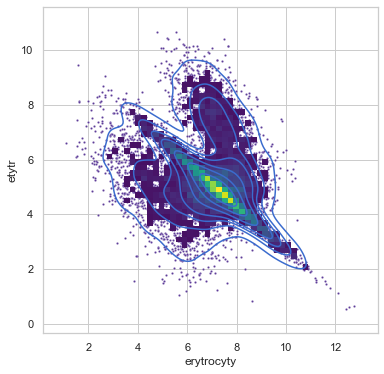

In [18]:
plt.subplots(figsize=(6, 6))
sns.scatterplot(data=data_labor, x="erytrocyty", y="etytr", s=5, color="#5e3c99")
sns.histplot(data=data_labor, x="erytrocyty", y="etytr", bins=50, pthresh=.1, cmap="viridis", shrink=.4)
sns.kdeplot(data=data_labor, x="erytrocyty", y="etytr", levels=8, color="#3b6cce")

### **Skúmanie závislostí medzi predikovanou premennou a ďalšími atribútmi**
V tejto časti sa povenujeme **závislostiam medzi predikovanou premennou** a ostatnými premennými.
Predikovaná premenná je v našom prípade **indicator**.

### Indikátor a erytrocyty (0.36)

Z heatmapy vieme vyčítať, že dvojica atribútov indikátor a erytrocyty je **mierne pozitívne závislá**.
Tieto rozdiely sú badateľné na grafe nižšie, keďže zhluky dát sú zľahka rozdielne deformované a
vertikálne posunuté.

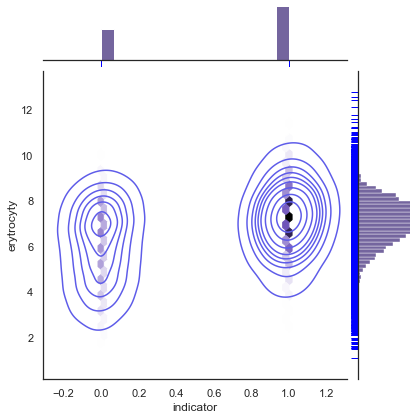

In [19]:
with sns.axes_style('white'):
    graph = sns.jointplot(x="indicator", y="erytrocyty", data=data_labor, kind='hex')
    graph.plot_joint(sns.kdeplot, color="#5e5ce9")
    graph.plot_marginals(sns.rugplot, color="blue", height=-.12, clip_on=False)

<AxesSubplot:xlabel='indicator', ylabel='erytrocyty'>

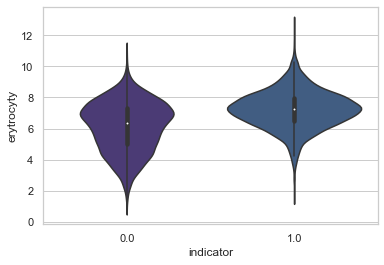

In [20]:
sns.violinplot(data=data_labor, x='indicator', y = 'erytrocyty')

### Indikátor a hematokrit (0.69)

Na tejto dvojici atribútov pozorujeme veľmi **silnú pozitívnu závislosť**, ktorá je viditeľná na oboch
typoch grafov (violin plote aj joint plote). S nárastom hodnoty indikátoru z 0 na 1 výrazne rastie
aj hodnota hematokritu.

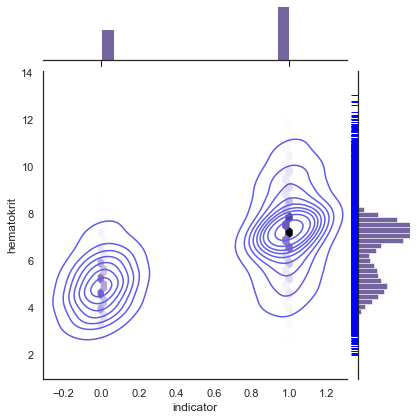

In [21]:
with sns.axes_style('white'):
    graph = sns.jointplot(x="indicator", y="hematokrit", data=data_labor, kind='hex')
    graph.plot_joint(sns.kdeplot, color="#5e5ce9")
    graph.plot_marginals(sns.rugplot, color="blue", height=-.12, clip_on=False)

<AxesSubplot:xlabel='indicator', ylabel='hematokrit'>

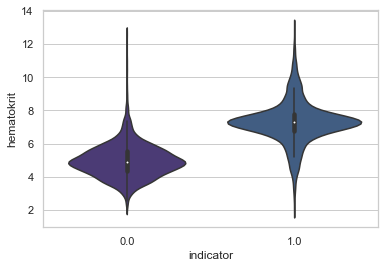

In [22]:
sns.violinplot(data=data_labor, x='indicator', y = 'hematokrit')


### Indikátor a trombocyty (0.027)

**Takmer nulová závislosť** - hodnoty hematokritu sú takmer zhodné pre rôzne hodnoty indikátoru.

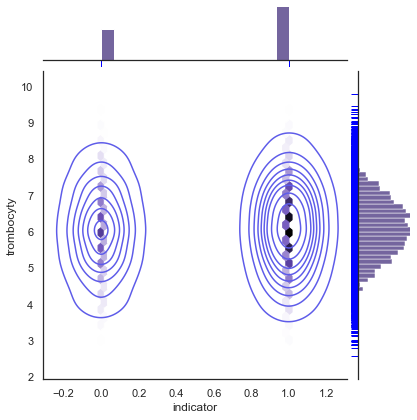

In [23]:
with sns.axes_style('white'):
    graph = sns.jointplot(x="indicator", y="trombocyty", data=data_labor, kind='hex')
    graph.plot_joint(sns.kdeplot, color="#5e5ce9")
    graph.plot_marginals(sns.rugplot, color="blue", height=-.12, clip_on=False)

<AxesSubplot:xlabel='indicator', ylabel='trombocyty'>

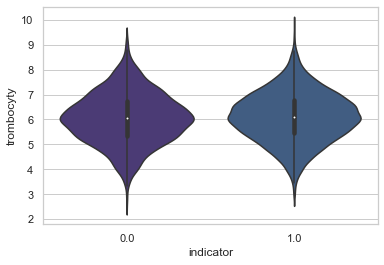

In [24]:
sns.violinplot(data=data_labor, x='indicator', y = 'trombocyty')

### Indikátor a etytr (-0.38)

**Mierne negatívna závislosť** je viditeľná tak, že pri náraste hodnoty indikátoru klesá
hodnota atribútu etytr. Distribúcia pri rôznom indikátore je taktiež **odlišná**.

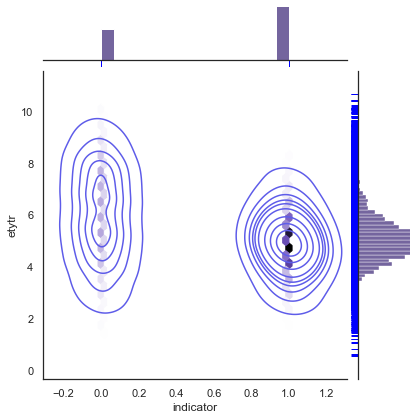

In [25]:
with sns.axes_style('white'):
    graph = sns.jointplot(x="indicator", y="etytr", data=data_labor, kind='hex')
    graph.plot_joint(sns.kdeplot, color="#5e5ce9")
    graph.plot_marginals(sns.rugplot, color="blue", height=-.12, clip_on=False)

<AxesSubplot:xlabel='indicator', ylabel='etytr'>

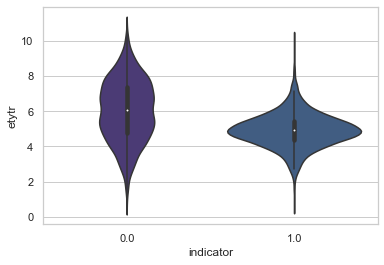

In [26]:
sns.violinplot(data=data_labor, x='indicator', y = 'etytr')

## c) Formulácia a štatistické overenie hypotéz o dátach
-------------------------------------------------------
### Formulácia hypotéz

#### 1. Hypotéza:
##### (**H0**): Pacienti v lepšom stave majú rovnaké hodnoty erytrocytov v krvi ako pacienti
##### v horšom stave.
##### (**H1**): Pacienti v lepšom stave majú iné hodnoty erytrocytov v krvi ako pacienti
##### v horšom stave.

#### 2. Hypotéza:
##### (**H0**): Pacienti v horšom stave majú hodnoty objemu krviniek (hematokrit) rovnaké
##### ako pacienti v lepšom stave.
##### (**H1**): Pacienti v horšom stave majú hodnoty objemu krviniek (hematokrit) rôzne
##### ako pacienti v lepšom stave
-------------------------------------------------------

Tieto hypotézy sme si zvolili z toho dôvodu, že predchádzajúca časť nám naznačila tieto poznatky,
z ktorých vychádzajú dané hypotézy. Pred samotným začiatkom štatistického overenia hypotéz
vykreslíme zopár grafov, z ktorých zistíme, či sú dané **dáta vhodné** na použitie štatistických
testov.

#### 1. Hypotéza:

V prvom boxenplote môžeme vidieť iný typ porovnania závislostí indikátora od erytrocytov, ako
sme použili v predchádzajúcej časti, no výsledok je v podstate rovnaký.
Pozorujeme miernu koreláciu medzi zvolenou dvojicou atribútov.

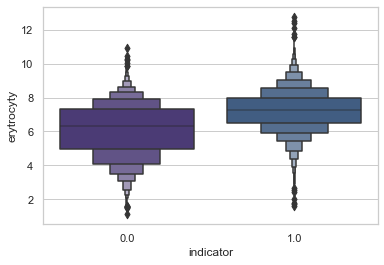

In [27]:
g = sns.boxenplot(data=data_labor, x='indicator', y = 'erytrocyty')

Následne skontrolujeme atribúty indikátor a erytrocyty a ich hodnoty, napr. či sú ich distribúcie
normálne alebo či ich dáta nezasahujú do záporných hodnôt, čo je z logického hľadiska nezmysel.

In [28]:
data_labor[['erytrocyty', 'indicator']].describe()

,erytrocyty,indicator
count,9971.000000,9971.000000
mean,6.842049,0.643165
std,1.460087,0.479090
min,1.103640,0.000000
25%,6.037930,0.000000
50%,7.004430,1.000000
75%,7.807580,1.000000
max,12.769020,1.000000


[erytrocyty] Medián:   7.00443
[erytrocyty] Modus:    6.842048781567562
[erytrocyty] Priemer:  6.842048781567561
[erytrocyty] Rozptyl:  2.1316401076201124
[erytrocyty] Smerodajná odchylka:  1.4600137354217297


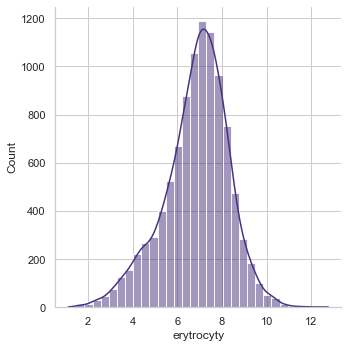

In [29]:
sns.displot(data_labor["erytrocyty"], kde=True, bins=32)
# sns.histplot(data=data_labor, x="erytrocyty", bins=24, kde=True)
print(f"[erytrocyty] Medián:  ", data_labor["erytrocyty"].median())
print(f"[erytrocyty] Modus:   ", data_labor.mode()["erytrocyty"][0])
print(f"[erytrocyty] Priemer: ", data_labor["erytrocyty"].mean())
print(f"[erytrocyty] Rozptyl: ", np.var(data_labor["erytrocyty"]))
print(f"[erytrocyty] Smerodajná odchylka: ", np.std(data_labor["erytrocyty"]))

[indicator] Medián:   1.0
[indicator] Modus:    1.0
[indicator] Priemer:  0.6431651790191556
[indicator] Rozptyl:  0.22950373151641315
[indicator] Smerodajná odchylka:  0.479065477274676


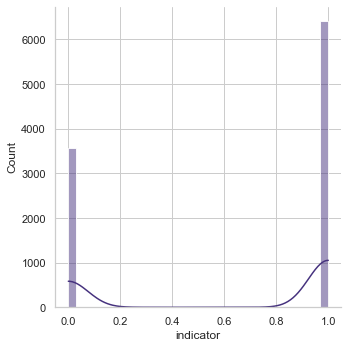

In [30]:
sns.displot(data_labor["indicator"], kde=True, bins=32)
# sns.histplot(data=data_labor, x="erytrocyty", bins=24, kde=True)
print(f"[indicator] Medián:  ", data_labor["indicator"].median())
print(f"[indicator] Modus:   ", data_labor.mode()["indicator"][0])
print(f"[indicator] Priemer: ", data_labor["indicator"].mean())
print(f"[indicator] Rozptyl: ", np.var(data_labor["indicator"]))
print(f"[indicator] Smerodajná odchylka: ", np.std(data_labor["indicator"]))

Z danej krátkej analýzy dvoch atribútov sme zistili, že hodnoty indikátora sú
v očakávanej norme a hodnoty erytrocytov sú pre danú analýzu taktiež
akceptovateľné.

Následne sme rozdelili dataset do **dvoch podsetov podľa hodnoty indikátora**,
aby sme mohli pracovať s našimi hypotézami.

#### Delenie atribútov do dvoch setov podľa indikátora:

In [31]:
data_0_erytrocyty = data_labor.loc[data_labor["indicator"] == 0, "erytrocyty"]
data_0_erytrocyty

0       8.89463
1       4.21847
2       7.94461
5       5.78198
17      3.89519
         ...   
9961    5.34416
9963    3.96481
9964    5.93103
9966    5.61728
9969    7.26178
Name: erytrocyty, Length: 3558, dtype: float64

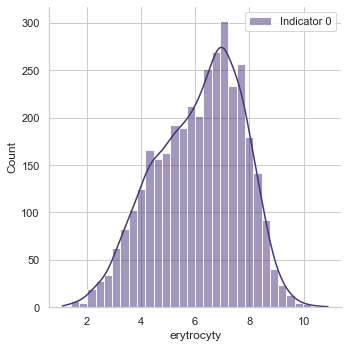

In [32]:
sns.displot(data_0_erytrocyty, kde=True, bins=32, label="Indicator 0")
plt.legend()

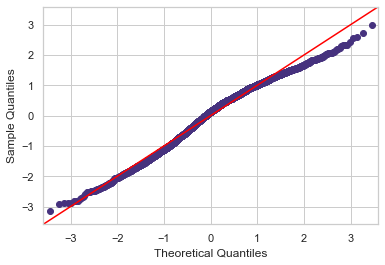

In [33]:
sm.qqplot(data_0_erytrocyty, fit=True, line="45")
plt.show()

In [34]:
data_1_erytrocyty = data_labor.loc[data_labor["indicator"] == 1, "erytrocyty"]
data_1_erytrocyty

3       7.67537
4       7.84993
6       5.61952
7       8.26529
8       6.25616
         ...   
9962    7.84604
9965    6.36163
9967    8.82840
9968    6.83179
9970    8.70299
Name: erytrocyty, Length: 6413, dtype: float64

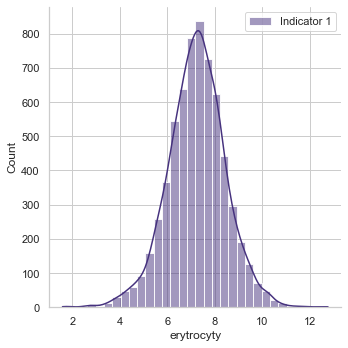

In [35]:
sns.displot(data_1_erytrocyty, kde=True, bins=32, label="Indicator 1")
plt.legend()

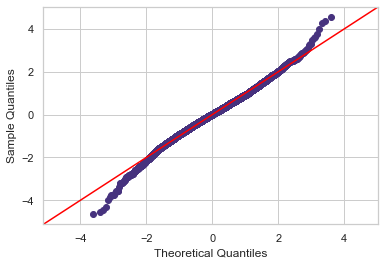

In [36]:
sm.qqplot(data_1_erytrocyty, fit=True, line="45")
plt.show()


Aby sme dodržali korektnosť pri vykonávaní nasledujúcich testov, rozhodli sme sa
z našich datasetov vybrať rovnako veľkú vzorku pre oba hodnoty indikátoru. Tým zaručíme
aj použiteľnosť Shapiro-Wilkovho testu, ktorý je vhodný pre dáta do 5000 záznamov.

In [37]:
print(data_0_erytrocyty.count())
print(data_1_erytrocyty.count())

3558
6413


Kedže počet záznamov v dataframe data_0_erytrocyty **(3558)** je menší ako počet záznamov v
dataframe data_1_erytrocyty **(6413)**, z data_1_erytrocyty vyberieme **toľko záznamov, koľko je v
data_0_erytrocyty**

In [38]:
data_1_erytrocyty = data_1_erytrocyty.sample(data_0_erytrocyty.count())
print(data_0_erytrocyty.count())
print(data_1_erytrocyty.count())

3558
3558


Z predchádzajúcich grafov je nám naznačené, že **nepôjde o normálnu distribúciu**.
Následne sme si vypočítali Cohenovo déčko, aby sme vedeli určiť silu nášho testu,
resp. silu presvedčenia o výsledku, ktorý dostaneme v ďalších testoch.

Výsledok je väčší ako učebnicová hodnota 0.75, čo znamená, že výsledok nášho testu
bude dostatočne presvedčivý.

In [39]:
def cohen_d(x1, x2):
    nx1 = len(x1)
    nx2 = len(x2)
    s = np.sqrt(((nx1-1) * np.std(x1, ddof=1)**2 + (nx2-1) * np.std(x2, ddof=1)**2) / (nx1 + nx2 - 2))
    return (np.abs(np.mean(x1) - np.mean(x2))) / s

c_d_erytrocyty = cohen_d(data_0_erytrocyty, data_1_erytrocyty)
c_d_erytrocyty

0.7862557940227162


Keďže sme si dáta rozdelili do dvoch setov podľa hypotézy, prešli sme na
**overenie nulovej hypotézy**, aby sme sa uistili,
že dáta pochádzajú z normálnej distribúcie.
Predpokladali sme, že dáta budú pochádzať skôr z rôznych distribúcií ako normálnych.

Na to nám slúži **Shapiro-Wilkov test**.

1.9335631161762587e-19
Iná distribúcia (reject H0)


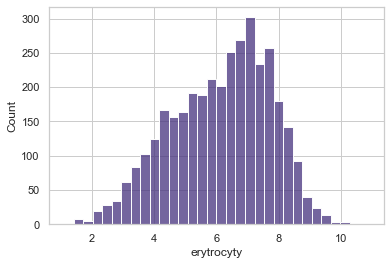

In [40]:
sns.histplot(data=data_0_erytrocyty)
alpha = 0.05
shapiro_test = stats.shapiro(data_0_erytrocyty)
print(shapiro_test.pvalue)

if shapiro_test.pvalue > alpha:
    print('Normálna distribúcia (fail to reject H0)')
else:
    print('Iná distribúcia (reject H0)')

5.039313411003832e-11
Iná distribúcia (reject H0)


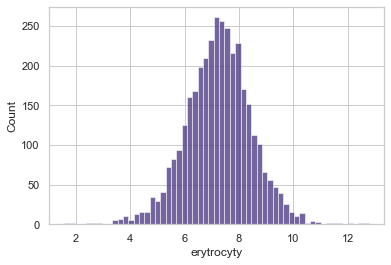

In [41]:
sns.histplot(data=data_1_erytrocyty)
alpha = 0.05
shapiro_test = stats.shapiro(data_1_erytrocyty)
print(shapiro_test.pvalue)

if shapiro_test.pvalue > alpha:
    print('Normálna distribúcia (fail to reject H0)')
else:
    print('Iná distribúcia (reject H0)')

Keďže podľa Shapiro-Wilkovho testu distribúcia oboch vzoriek **nepatrí
do skupiny normálnych** a naše dáta sú nepárové, pokračujeme testom, ktorý sa
nazýva **Mann-Whitneyho test**. Mann-Whitneyho test použijeme ako potvrdenie
výsledku SW testu.

In [42]:
alpha = 0.05
stat, p = mannwhitneyu(data_0_erytrocyty, data_1_erytrocyty)
print(p)

if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

3.8874557703316715e-184
Different distribution (reject H0)


#### Záver 1. hypotézy

Mann-Whitneyho test potvrdil, že hypotézu **H0 môžeme zamietnuť**
s dostatočnou mierou presvedčenia (aj kvôli Cohen's d), vďaka čomu
môžeme tvrdiť, že pacienti v lepšom stave majú **nie rovnaké hodnoty erytrocytov**
v krvi. Minimálne výsledné hodnoty oboch testov naznačujú fakt, že hypotéza
H0 nie je konzistentná.


#### 2. Hypotéza:

##### (**H0**): Pacienti v horšom stave majú hodnoty objemu krviniek (hematokrit) rovnaké
##### ako pacienti v lepšom stave.
##### (**H1**): Pacienti v horšom stave majú hodnoty objemu krviniek (hematokrit) rôzne
##### ako pacienti v lepšom stave.
-------------------------------------------------------

Opäť sme začali iným typom zobrazenia závislostí medzi zvolenými atribútmi (tentokrát
šlo o indikátor a hematokrit).

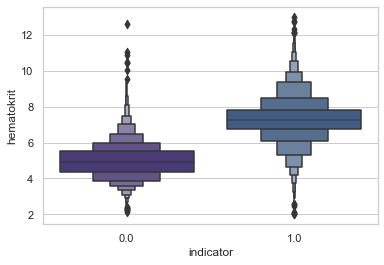

In [43]:
g = sns.boxenplot(data=data_labor, x='indicator', y = 'hematokrit')

Následne skontrolujeme atribúty indikátor a hematokrit a ich hodnoty, napr. či sú ich distribúcie
normálne alebo či ich dáta nezasahujú do záporných hodnôt, čo je z logického hľadiska nezmysel.

In [44]:
data_labor[['hematokrit', 'indicator']].describe()

,hematokrit,indicator
count,9971.000000,9971.000000
mean,6.461410,0.643165
std,1.617865,0.479090
min,1.991860,0.000000
25%,5.127505,0.000000
50%,6.753050,1.000000
75%,7.490275,1.000000
max,13.021170,1.000000


[hematokrit] Medián:   6.75305
[hematokrit] Modus:    6.461409967810079
[hematokrit] Priemer:  6.461409967810081
[hematokrit] Rozptyl:  2.617225818223387
[hematokrit] Smerodajná odchylka:  1.6177842310467077


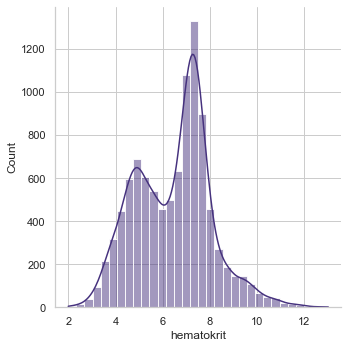

In [45]:
sns.displot(data_labor["hematokrit"], kde=True, bins=32)
# sns.histplot(data=data_labor, x="erytrocyty", bins=24, kde=True)
print(f"[hematokrit] Medián:  ", data_labor["hematokrit"].median())
print(f"[hematokrit] Modus:   ", data_labor.mode()["hematokrit"][0])
print(f"[hematokrit] Priemer: ", data_labor["hematokrit"].mean())
print(f"[hematokrit] Rozptyl: ", np.var(data_labor["hematokrit"]))
print(f"[hematokrit] Smerodajná odchylka: ", np.std(data_labor["hematokrit"]))

[indicator] Medián:   1.0
[indicator] Modus:    1.0
[indicator] Priemer:  0.6431651790191556
[indicator] Rozptyl:  0.22950373151641315
[indicator] Smerodajná odchylka:  0.479065477274676


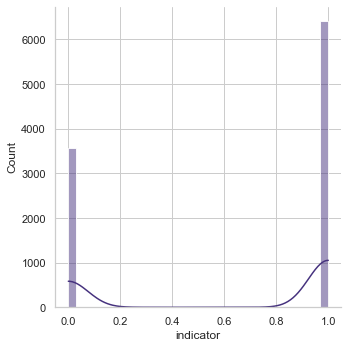

In [46]:
sns.displot(data_labor["indicator"], kde=True, bins=32)
# sns.histplot(data=data_labor, x="erytrocyty", bins=24, kde=True)
print(f"[indicator] Medián:  ", data_labor["indicator"].median())
print(f"[indicator] Modus:   ", data_labor.mode()["indicator"][0])
print(f"[indicator] Priemer: ", data_labor["indicator"].mean())
print(f"[indicator] Rozptyl: ", np.var(data_labor["indicator"]))
print(f"[indicator] Smerodajná odchylka: ", np.std(data_labor["indicator"]))

Z tejto krátkej štatistickej analýzy sme zistili, že hodnoty oboch atribútov
sa pohybujú v očakávaných intervaloch, no distribúcia hematokritu nám naznačila
možný výsledok Shapiro-Wilkovho testu.

Následne sme si rozdelili dataset do **dvoch podsetov podľa hodnoty indikátora**.

In [47]:
data_0_hematokrit = data_labor.loc[data_labor["indicator"] == 0, "hematokrit"]
data_0_hematokrit

0       3.34206
1       5.78180
2       4.55230
5       4.77041
17      5.96378
         ...   
9961    5.96894
9963    5.13656
9964    3.47833
9966    4.57350
9969    4.98399
Name: hematokrit, Length: 3558, dtype: float64

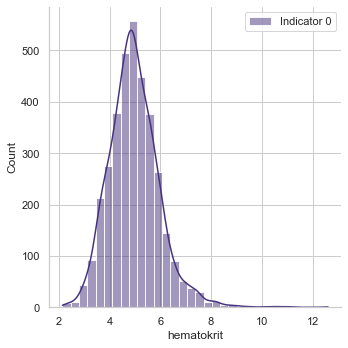

In [48]:
sns.displot(data_0_hematokrit, kde=True, bins=32, label="Indicator 0")
plt.legend()

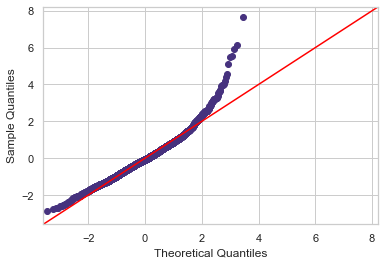

In [49]:
sm.qqplot(data_0_hematokrit, fit=True, line="45")
plt.show()

In [50]:
data_1_hematokrit = data_labor.loc[data_labor["indicator"] == 1, "hematokrit"]
data_1_hematokrit

3       7.17271
4       6.93681
6       7.60427
7       7.25248
8       6.92202
         ...   
9962    7.99329
9965    6.71859
9967    7.00122
9968    6.94466
9970    7.27724
Name: hematokrit, Length: 6413, dtype: float64

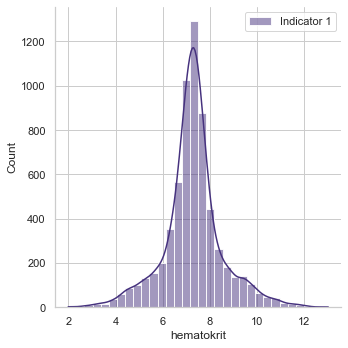

In [51]:
sns.displot(data_1_hematokrit, kde=True, bins=32, label="Indicator 1")
plt.legend()

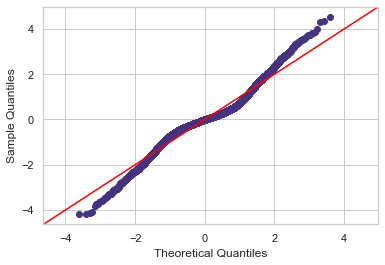

In [52]:
sm.qqplot(data_1_hematokrit, fit=True, line="45")
plt.show()

Z daných dát je očividná **rozdielnosť** týchto dvoch vzoriek ako aj ich **distribúcia**,
ktorá má od normálnosti pomerne ďaleko.

Prešli sme k časti vybratia rovnako veľkej vzorky pre rôzne hodnoty predikovanej premennej.
Dôvodom bolo opäť, zaručenie rovnakých podmienok
pre nasledovné štatistické testy.

In [53]:
print(data_0_hematokrit.count())
print(data_1_hematokrit.count())

3558
6413


V tomto prípade rovnako ako v prípade erytrocytov je počet záznamov pre data_0_hematokrit **(3558)**
nižší ako počet záznamov pre data_1_hematokrit **(6413)**, takže sme tiež vybrali z data_1_hematokrit
rovanký počet záznamov ako pre data_0_hematokrit.

In [54]:
data_1_hematokrit = data_1_hematokrit.sample(data_0_hematokrit.count())
data_1_hematokrit

420      7.51327
6394     6.98184
6208    10.00346
4700     7.20723
4434     6.82069
          ...   
4535     7.39856
4767     7.59116
594      8.37027
5481     4.19498
8009     7.65276
Name: hematokrit, Length: 3558, dtype: float64

In [55]:
print(data_0_hematokrit.count())
print(data_1_hematokrit.count())

3558
3558


Z predchádzajúcich grafov je jasné, že **nepôjde o normálnu distribúciu**.
Následne sme prešli na výpočet **Cohen's d**.

In [56]:
c_d_hematokrit = cohen_d(data_0_hematokrit, data_1_hematokrit)
c_d_hematokrit

2.0723401384020668

Výsledok je väčší ako učebnicová hodnota 1 a pohybuje sa okolo 2,
čo znamená, že **rozdiel medzi priemermi našich dvoch datasetov je rádovo
väčší ako 2 štandardné odchýlky**.

Vďaka tejto informácií môžeme tvrdiť, že výsledok nasledujúcich testov je
**veľmi dôveryhodný**.

Shapiro-Wilkov test overíme aj napriek qq-plotom,
aby sme si mohli byť istí, že nejde o normálnu distribúciu.

5.47405960683466e-28
Iná distribúcia (reject H0)


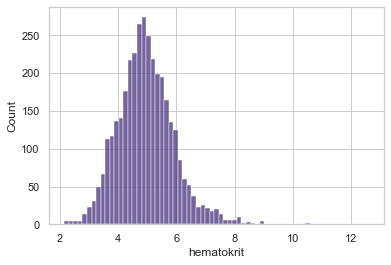

In [57]:
sns.histplot(data=data_0_hematokrit)
alpha = 0.05
shapiro_test = stats.shapiro(data_0_hematokrit)
print(shapiro_test.pvalue)

if shapiro_test.pvalue > alpha:
    print('Normálna distribúcia (fail to reject H0)')
else:
    print('Iná distribúcia (reject H0)')

1.8949867953334784e-30
Iná distribúcia (reject H0)


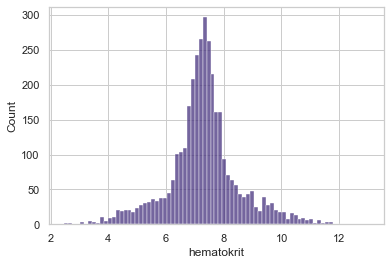

In [58]:
sns.histplot(data=data_1_hematokrit)
alpha = 0.05
shapiro_test = stats.shapiro(data_1_hematokrit)
print(shapiro_test.pvalue)

if shapiro_test.pvalue > alpha:
    print('Normálna distribúcia (fail to reject H0)')
else:
    print('Iná distribúcia (reject H0)')

Shapiro-Wilkov test nám vrátil **extrémne nízke p-hodnoty**, čo naznačuje vyvrátenie
nulovej hypotézy. Daný predpoklad sme si ešte potvrdili **Mann-Whitneyho testom**
v nasledujúcej bunke.

In [59]:
alpha = 0.05
stat, p = mannwhitneyu(data_0_hematokrit, data_1_hematokrit)
print(p)

if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

0.0
Different distribution (reject H0)


#### Záver 2. hypotézy

Mann-Whitneyho test potvrdil, že hypotézu **H0 môžeme zamietnuť** v prospech H1.
To znamená, že môžeme s dostatočným presvedčením predpokladať znenie alternatívnej
hypotézy.

## d) Identifikácia problémov v dátach s navrhnutým riešením
-------------------------------------------------------
### Identifikácia problémov

Táto sekcia prvej fázy je venovaná **čisteniu dát**, respektíve **hľadaniu problémov**
v datasete s návrhom riešení pre dané problémy. Všetky navrhnuté zmeny sme zakomentovali,
aby sme mali funkčný k dispozícii už do druhej fázy.

Postupovali sme problém po probléme v oboch .csv súboroch naraz.

### Nevhodná štruktúra dát

Na úvod sme otvorili druhý .csv súbor s názvom profiles.csv a vykonali sme základné
úpravy ako aj pri labor.csv na začiatku notebooku (vyhodenie prvého stĺpca, kde sú len
čísla).

In [60]:
data_profiles = pd.read_csv("dataset/profiles.csv", sep="\t")
data_profiles = data_profiles.iloc[:, 1:]
data_profiles

,birthdate,address,race,current_location,blood_group,ssn,name,sex,residence
0,1956/01/07,"76379 Lynn Drive\r\nKevinchester, VA 69374",Asian,"(Decimal('44.490493'), Decimal('-141.873900'))",A-,328-14-6945,Michelle Perez,F,39446 Gabrielle Pass Suite 764\r\nEast Daniell...
1,"10/28/1984, 00:00:00","PSC 8195, Box 7465\r\nAPO AP 27883",White,"(Decimal('-60.5512795'), Decimal('101.998999'))",B+,841-17-8814,Christopher Bishop,M,"18019 Mary Mountains\r\nScottport, IA 19641"
2,1966-08-30,"3345 Daniels Parks Suite 080\r\nNew Nancy, TX ...",Asian,"(Decimal('-24.9800585'), Decimal('-18.208792'))",A-,871-67-9396,Emily Stevens,F,"4906 Matthew Field\r\nGalvanfort, SC 22896"
3,1910/08/08,"3368 Brent Mall Suite 782\r\nPort Cheryl, WV 0...",black,"(Decimal('51.679296'), Decimal('-96.270056'))",O+,859-80-8937,Carla Hernandez,F,USCGC Schroeder\r\nFPO AE 57164
4,1972-10-28,"175 Michael Neck\r\nSouth Nicoleberg, PA 96022",White,"(Decimal('-85.5392635'), Decimal('-154.434283'))",O+,481-92-7602,Anthony Smith,M,"2148 Webb Valley\r\nNorth Madison, KS 07434"
...,...,...,...,...,...,...,...,...,...
3123,1988/07/28,"54115 Shelia Mall\r\nPerkinsland, CT 29608",White,"(Decimal('-7.930086'), Decimal('-151.534279'))",O-,420-58-2110,David Willis,M,5488 Michelle Crescent Apt. 782\r\nMelissatown...
3124,1948-05-03,USCGC Bowman\r\nFPO AP 06685,White,"(Decimal('50.0322335'), Decimal('166.727247'))",AB-,298-66-4795,Jeffrey Sims,M,"559 Kenneth Track Suite 021\r\nEast Ashley, TX..."
3125,1935/11/18,"616 John Pass Apt. 345\r\nBurnetttown, AZ 24833",Asian,"(Decimal('-35.8693315'), Decimal('111.435733'))",AB-,716-72-0406,Thomas Kennedy,M,"466 Ryan Stravenue\r\nGalvanbury, AZ 98577"
3126,"12/31/2003, 00:00:00",USCGC Baker\r\nFPO AE 40268,White,"(Decimal('-31.539476'), Decimal('162.149407'))",O-,678-62-0044,Bradley Barrett,M,"653 Dixon Loaf\r\nSouth Branditown, TX 58506"


Pred samotnou úpravou nevhodných štruktúr dát sme si vypísali prvých 20 záznamov,
na ktorých sme sa pokúsili detekovať abnormality v ich štruktúre zápisu.
Dataset data_labor bol z tohto ohľadu v poriadku.

In [61]:
data_labor.head(20)

,smoker,hbver,erytrocyty,alt,leukocyty,etytr,hemoglobin,ssn,name,trombocyty,alp,relationship,indicator,er-cv,weight,ast,hematokrit
0,yes,4.98718,8.89463,2.40520,5.75830,6.93712,4.54976,021-87-4523,Jeremy Tanner,6.23782,45.93625,divoced,0.0,55.43592,-2.73558,51.62366,3.34206
1,yes,6.67732,4.21847,0.66072,6.29064,5.19990,4.10863,513-39-9691,Jocelyn Kelly,6.27100,20.30249,divoced,0.0,45.34617,81.56533,61.59374,5.78180
2,no,6.51444,7.94461,1.28337,5.83567,6.88758,6.45793,881-46-4810,Crystal Kelley,6.02783,82.09305,divoced,0.0,29.29190,151.24191,47.96329,4.55230
3,no,6.05025,7.67537,0.83197,6.33300,4.45912,6.96013,826-16-7757,Doris Duncan,6.83876,69.43441,divoced,1.0,60.47398,83.89451,57.47174,7.17271
4,yes,6.20737,7.84993,0.93395,5.66904,4.88628,6.41332,167-37-6059,John Parks,5.75903,90.09567,divoced,1.0,41.10299,107.22958,34.25820,6.93681
5,no,6.43927,5.78198,0.38563,5.68222,3.97928,4.90713,289-95-2344,Shawn Richardson,6.70422,55.98531,divoced,0.0,70.18438,45.97264,43.98447,4.77041
6,yes,6.20765,5.61952,0.54770,3.98821,6.22502,7.63128,684-70-5275,Janice Buchanan,7.42329,54.79463,single,1.0,52.69461,34.70731,70.42152,7.60427
7,no,4.31997,8.26529,1.53396,5.57558,4.13495,7.57753,555-32-3180,Catherine Jackson,5.60203,65.09512,married,1.0,49.80798,91.49829,67.64974,7.25248
8,no,4.82413,6.25616,0.54975,6.43054,5.79923,6.90669,479-42-8879,Amanda Garcia,6.36469,72.65451,widowed,1.0,54.45955,118.55927,44.94089,6.92202
9,no,5.74884,6.66503,0.52396,6.99089,5.59373,8.31328,375-27-0860,Travis Brown,5.38674,26.96196,married,1.0,42.93586,81.83422,38.56586,6.65939


In [62]:
data_profiles.head(20)

,birthdate,address,race,current_location,blood_group,ssn,name,sex,residence
0,1956/01/07,"76379 Lynn Drive\r\nKevinchester, VA 69374",Asian,"(Decimal('44.490493'), Decimal('-141.873900'))",A-,328-14-6945,Michelle Perez,F,39446 Gabrielle Pass Suite 764\r\nEast Daniell...
1,"10/28/1984, 00:00:00","PSC 8195, Box 7465\r\nAPO AP 27883",White,"(Decimal('-60.5512795'), Decimal('101.998999'))",B+,841-17-8814,Christopher Bishop,M,"18019 Mary Mountains\r\nScottport, IA 19641"
2,1966-08-30,"3345 Daniels Parks Suite 080\r\nNew Nancy, TX ...",Asian,"(Decimal('-24.9800585'), Decimal('-18.208792'))",A-,871-67-9396,Emily Stevens,F,"4906 Matthew Field\r\nGalvanfort, SC 22896"
3,1910/08/08,"3368 Brent Mall Suite 782\r\nPort Cheryl, WV 0...",black,"(Decimal('51.679296'), Decimal('-96.270056'))",O+,859-80-8937,Carla Hernandez,F,USCGC Schroeder\r\nFPO AE 57164
4,1972-10-28,"175 Michael Neck\r\nSouth Nicoleberg, PA 96022",White,"(Decimal('-85.5392635'), Decimal('-154.434283'))",O+,481-92-7602,Anthony Smith,M,"2148 Webb Valley\r\nNorth Madison, KS 07434"
5,31 Mar 1989,USNV Johnson\r\nFPO AP 32339,white,"(Decimal('-14.0121985'), Decimal('-122.796017'))",AB-,273-99-1555,Scott Campbell,M,"4115 Bowman Coves Apt. 957\r\nHollandland, NJ ..."
6,06 Dec 1917,Unit 3895 Box 8817\r\nDPO AA 44069,Asian,"(Decimal('-35.169301'), Decimal('-153.383042'))",A-,564-52-3982,Ryan Ramirez,M,14408 Robert Mountains Suite 672\r\nRichardpor...
7,2005-03-30,"65932 Benjamin Trafficway\r\nBradleyview, MN 6...",White,"(Decimal('-76.0427015'), Decimal('-176.397613'))",B+,443-16-4619,John Martinez,M,Unit 1668 Box 0922\r\nDPO AE 29854
8,10 Aug 1920,"31360 Caleb Isle Suite 718\r\nLynnfurt, OH 70966",Black,"(Decimal('-86.563849'), Decimal('-164.137234'))",A+,667-24-8122,Ricardo Wright,M,"28996 Jacobs Rue\r\nPort Rachaelside, NE 55686"
9,2012-06-28,"8584 Branch Isle\r\nBrianshire, ND 32402",White,"(Decimal('-21.404155'), Decimal('105.809768'))",O+,421-41-3600,Angela Mcgee,F,"49107 Ortiz Hills Suite 611\r\nHouseborough, T..."


V data_profiles sme si všimli hneď niekoľko problémov v našich záznamoch. Prvý z nich
bol hneď v atribúte birthdate, kde bol dátum narodenia zapísaný niekoľkými rôznymi
spôsobmi.

Ďalšia nezrovnalosť bola v atribútoch address a residence, kde sa v záznamoch nachádzali
znaky pre nový riadok a ďalšie formátovacie znaky typu \r apod.

Poslednou chybou v rámci pozorovania prirodzeného jazyka boli záznamy pre current_location,
ktoré mali nevhodný formát.

Naše navrhnuté riešenia sú zakomentované nižšie.

* Pre atribút birthdate navrhujeme použitie predefinovaného pandas formátu, ktorý
by v takomto prípade nahradil všetky rozličné formáty jednotným.
* Pre atribúty currect_location, address a residence možno použiť nahradzovanie
regulárnym výrazom a vstavanou metódou replace(), ktorou by sa nahradili všetky
nechcené znaky, ktoré sa v záznamoch nachádzajú.

In [63]:
# data_profiles[["birthdate"]] = data_profiles[["birthdate"]].apply(pd.to_datetime)

In [64]:
# data_profiles["current_location"] = data_profiles["current_location"].str.replace(r"[A-Za-z]", "", regex=True)
# data_profiles["current_location"] = data_profiles["current_location"].str.replace(r"[()']", "", regex=True)
# data_profiles

In [65]:
# data_profiles["address"] = data_profiles["address"].str.replace(r"[\r\n]", " ", regex = True)
# data_profiles

In [66]:
# data_profiles["residence"] = data_profiles["residence"].str.replace(r"[\r\n]", " ", regex = True)
# data_profiles

### Duplicitné záznamy

Ďalším problémom v datasete, s ktorým sa je potrebné popasovať, je riešenie **duplikátnych riadkov**.
To je z hľadiska trénovanie umelej inteligencie podstatné, keďže **duplikátny riadok nepridáva
nijakú hodnotu** pre náš algoritmus, skôr môže narušiť jeho úsudok v prospech týchto rovnakých
riadkov.

V tejto bunke sme spočítali riadky, ktoré majú **duplikát** v celom datasete.

In [67]:
data_labor.duplicated(keep=False).sum()

198

Pre tento problém by sme zvolili riešenie, v ktorom by sme odstránili všetky duplikátne
riadky s tým, že by bol ponechaný len jeden z nich. V kóde, ktorý je zakomentovaný nižšie,
je aj kontrola, či sa daný úkon vykonal správne. Po takejto úprave je potrebné preindexovať
záznamy nanovo.

In [68]:
# data_labor.drop_duplicates(inplace=True)
# data_labor.duplicated(keep=False).sum()
# data_labor.index = range(len(data_labor))
# data_labor

Naša datábaza profilov neobsahuje duplikátne riadky, čo je overené v nasledujúcej bunke.
Preto nie je potrebné v tomto sete riešiť nijakú duplicitu.

In [69]:
data_profiles.duplicated(keep=False).sum()

0

### Nejednotné formáty

Do okruhu nejednotných formátov spadajú prípady ako napr. rôzna veľkosť písmen,
preklepy, rôzne podoby zápisov alebo aj ich kombinácia.

Preto sme si na úvod vypísali všetky unikátne v hodnoty v atribútoch, pre
ktoré dáva zmysel riešiť nejednotný formát
(napr. pri atribúte rasy to dáva zmysel, keďže rás je len zopár unikátnych,
kdežto adresy takto kontrolovať nemôžeme).

Atribúty v data_labor, pri ktorých možno kontrolovať jednotný formát:
* smoker
* relationship

Atribúty v data_profiles, pri ktorých možno kontrolovať jednotný formát:
* race
* blood_group
* sex

### Nejednotný formát: data_labor

In [70]:
data_labor["smoker"].unique()

array(['yes', 'no', 'Y', 'N'], dtype=object)

V datasete data_labor pre atribút smoker sme identifikovali nejednotný formát,
v 4 rôznych verziách. Na tento problém by sme vykonali prekonvertovanie hodnôt
na numerické hodnoty 0 a 1, keďže to sú jediné možnosti, ako môže byť daný
atribút vyjadrený.

In [71]:
"""
data_labor["smoker"] = data_labor["smoker"].str.replace("yes", "1")
data_labor["smoker"] = data_labor["smoker"].str.replace("no", "0")
data_labor["smoker"] = data_labor["smoker"].str.replace("Y", "1")
data_labor["smoker"] = data_labor["smoker"].str.replace("N", "0")
data_labor["smoker"] = data_labor["smoker"].astype(float)
"""

'\ndata_labor["smoker"] = data_labor["smoker"].str.replace("yes", "1")\ndata_labor["smoker"] = data_labor["smoker"].str.replace("no", "0")\ndata_labor["smoker"] = data_labor["smoker"].str.replace("Y", "1")\ndata_labor["smoker"] = data_labor["smoker"].str.replace("N", "0")\ndata_labor["smoker"] = data_labor["smoker"].astype(float)\n'

In [72]:
data_labor["relationship"].unique()

array(['divoced', 'single', 'married', 'widowed', 'nop', 'separated'],
      dtype=object)

Atribút relationship bol naformátovaný relatívne korektne, no upravili by sme
hrúbku pre slovo "divoced" na "divorced" pre lepšiu zrozumiteľnosť záznamov.

In [73]:
# data_labor["relationship"] = data_labor["relationship"].str.replace("divoced", "divorced")

### Nejednotný formát: data_profiles

In [74]:
data_profiles["race"].unique()

array(['Asian', 'White', 'black', 'white', 'Black', 'Hawaiian', 'blsck',
       'Indian'], dtype=object)

Pre rasy sme identifikovali preklep v prípade rasy **black**, kde bolo **blsck**.
Tento preklep by sme upravili funkciou replace().
Taktiež sme si všimli, že sa jednotlivé rasy začínajú na malé aj veľké písmená.
Túto skutočnosť by sme upravili pomocou funkcie lower(), ktorá zmení všetky veľké
písmená na malé.

In [75]:
# data_profiles["race"] = data_profiles["race"].str.replace("blsck", "black")
# data_profiles["race"] = data_profiles["race"].str.lower()

In [76]:
data_profiles["blood_group"].unique()

array(['A-', 'B+', 'O+', 'AB-', 'A+', 'O-', 'AB+', 'B-'], dtype=object)

Pre atribút blood_group boli formáty jednotné typu: veľké písmeno a +/-.
V budúcnosti možno pristúpime ku kroku nahradzovania týchto string hodnôt
na numerickú podobu.

In [77]:
data_profiles["sex"].unique()

array(['F', 'M'], dtype=object)

Tak ako pri atribúte smoker v predchádzajúcej časti, tak aj pri atribúte
pohlavia by sme vykonali zmenu formátu na numerické hodnoty 0 a 1.

In [78]:
"""
data_profiles["sex"] = data_profiles["sex"].str.replace("M", "1")
data_profiles["sex"] = data_profiles["sex"].str.replace("F", "0")
data_profiles["sex"] = data_profiles["sex"].astype(float)
"""

'\ndata_profiles["sex"] = data_profiles["sex"].str.replace("M", "1")\ndata_profiles["sex"] = data_profiles["sex"].str.replace("F", "0")\ndata_profiles["sex"] = data_profiles["sex"].astype(float)\n'

Príkaz spustený v bunke nižšie kontroluje, či sú všetky hodnoty vo všetých stĺpcoch
**numerické**, vďaka čomu by sme mohli prehlásiť,
že dané atribúty obsahujú výlučne numerické hodnoty.

V kombinácii spolu s funkciou info() vieme potvrdiť, že ide o dátový typ float_64 a
že ostatné dátové typy sú typu object, čo je Python reprezentácia stringu.

In [79]:
data_labor.apply(lambda y: pd.to_numeric(y, errors='coerce').notnull().all())

smoker          False
hbver            True
erytrocyty       True
alt              True
leukocyty        True
etytr            True
hemoglobin       True
ssn             False
name            False
trombocyty       True
alp              True
relationship    False
indicator        True
er-cv            True
weight           True
ast              True
hematokrit       True
dtype: bool

In [80]:
data_labor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9971 entries, 0 to 9970
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   smoker        9971 non-null   object 
 1   hbver         9971 non-null   float64
 2   erytrocyty    9971 non-null   float64
 3   alt           9971 non-null   float64
 4   leukocyty     9971 non-null   float64
 5   etytr         9971 non-null   float64
 6   hemoglobin    9971 non-null   float64
 7   ssn           9971 non-null   object 
 8   name          9971 non-null   object 
 9   trombocyty    9971 non-null   float64
 10  alp           9971 non-null   float64
 11  relationship  9971 non-null   object 
 12  indicator     9971 non-null   float64
 13  er-cv         9971 non-null   float64
 14  weight        9971 non-null   float64
 15  ast           9971 non-null   float64
 16  hematokrit    9971 non-null   float64
dtypes: float64(13), object(4)
memory usage: 1.1+ MB


In [81]:
data_profiles.apply(lambda y: pd.to_numeric(y, errors='coerce').notnull().all())

birthdate           False
address             False
race                False
current_location    False
blood_group         False
ssn                 False
name                False
sex                 False
residence           False
dtype: bool

In [82]:
data_profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3128 entries, 0 to 3127
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   birthdate         3128 non-null   object
 1   address           3128 non-null   object
 2   race              3128 non-null   object
 3   current_location  3128 non-null   object
 4   blood_group       3128 non-null   object
 5   ssn               3128 non-null   object
 6   name              3128 non-null   object
 7   sex               3128 non-null   object
 8   residence         3128 non-null   object
dtypes: object(9)
memory usage: 110.0+ KB


### Chýbajúce hodnoty

Chýbajúce hodnoty sme na našom datasete sčasti už upravili.

Pre data_labor sme ešte pred začiatkom prvej fázy vykonali nahradenie priemerom.
Túto skutočnosť, že náš dataset už naozaj nemá nijaké chýbajúce hodnoty, možno
overiť bunkou nižšie, ktorá zráta počet chýbajúcich hodnôt pre každý atribút
zvlášť.

In [83]:
data_labor.isna().sum()

smoker          0
hbver           0
erytrocyty      0
alt             0
leukocyty       0
etytr           0
hemoglobin      0
ssn             0
name            0
trombocyty      0
alp             0
relationship    0
indicator       0
er-cv           0
weight          0
ast             0
hematokrit      0
dtype: int64

Pre data_profiles navrhujeme rovnakú taktiku, ktorá v prvom rade spočíva v zistení,
či sa v datasete nachádzajú nejaké chýbajúce hodnoty. Ako možno vidieť v bunke nižšie,
tak chýbajúce dáta nemáme, a preto nijaké ďalšie kroky nie sú potrebné.

In [84]:
data_profiles.isna().sum()

birthdate           0
address             0
race                0
current_location    0
blood_group         0
ssn                 0
name                0
sex                 0
residence           0
dtype: int64

### Vychýlené hodnoty

V tejto sekcii sú navrhnutú postupy riešenia problémov s vychýlenými hodnotami.

Na začiatok je vhodné poznamenať, že problém vychýlených hodnôt sa týka len
číselných záznamov, a preto atribúty typu string nie je potrebné ošetrovať.
Začali sme výpisom datatypov v jednotlivých setoch.

In [85]:
data_labor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9971 entries, 0 to 9970
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   smoker        9971 non-null   object 
 1   hbver         9971 non-null   float64
 2   erytrocyty    9971 non-null   float64
 3   alt           9971 non-null   float64
 4   leukocyty     9971 non-null   float64
 5   etytr         9971 non-null   float64
 6   hemoglobin    9971 non-null   float64
 7   ssn           9971 non-null   object 
 8   name          9971 non-null   object 
 9   trombocyty    9971 non-null   float64
 10  alp           9971 non-null   float64
 11  relationship  9971 non-null   object 
 12  indicator     9971 non-null   float64
 13  er-cv         9971 non-null   float64
 14  weight        9971 non-null   float64
 15  ast           9971 non-null   float64
 16  hematokrit    9971 non-null   float64
dtypes: float64(13), object(4)
memory usage: 1.1+ MB


In [86]:
data_profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3128 entries, 0 to 3127
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   birthdate         3128 non-null   object
 1   address           3128 non-null   object
 2   race              3128 non-null   object
 3   current_location  3128 non-null   object
 4   blood_group       3128 non-null   object
 5   ssn               3128 non-null   object
 6   name              3128 non-null   object
 7   sex               3128 non-null   object
 8   residence         3128 non-null   object
dtypes: object(9)
memory usage: 110.0+ KB


Zistili sme, že data_profiles obsahuje výlučne stringy, z tohto dôvodu nie je
potrebná korekcia pre vychýlené hodnoty.

Zoznam číselných atribútov, pre ktoré je možné upravovať tzv. outlierov:
* hbver
* erytrocyty
* alt
* leukocyty
* etytr
* hemoglobin
* trombocyty
* alp
* er-cv
* weight
* ast
* hematokrit

Na začiatok sme sa rozhodli pre výpis základných štatistkých údajov metódou
describe().

In [87]:
data_labor.describe()

,hbver,erytrocyty,alt,leukocyty,etytr,hemoglobin,trombocyty,alp,indicator,er-cv,weight,ast,hematokrit
count,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000
mean,6.071692,6.842049,1.120983,6.064355,5.318564,6.062952,6.084395,54.622262,0.643165,51.121580,70.305658,50.459989,6.461410
std,1.000834,1.460087,2.019724,1.009118,1.393256,1.741981,1.006202,26.103211,0.479090,12.856008,34.976941,12.771838,1.617865
min,2.148000,1.103640,0.000000,2.239400,0.548790,0.000000,2.587100,0.000000,0.000000,0.000000,-54.061950,0.000000,1.991860
25%,5.401305,6.037930,0.563945,5.393100,4.444160,4.780500,5.407585,31.460750,0.000000,42.546015,46.128010,41.770680,5.127505
50%,6.071692,7.004430,0.780950,6.071080,5.120390,6.115310,6.084395,58.533820,1.000000,50.954600,70.793900,50.618370,6.753050
75%,6.742105,7.807580,1.166560,6.730190,6.019805,7.378890,6.765420,78.880725,1.000000,59.861495,94.071090,59.039665,7.490275
max,10.532500,12.769020,100.000000,9.767710,10.673750,11.720370,9.774760,100.000000,1.000000,100.000000,194.734070,100.000000,13.021170


Z predchádzajúcej bunky sme zistili, že niektoré atribúty majú hodnoty viac
roztrúsené ako iné. Jedným z extrémov bola váha, ktorej hodnoty siahali až
do záporných hodnôt.

Skrz tieto zistenia sme sa rozhodli, že váhu budeme upravovať samostatne a všetky
zvyšné numerické atribúty ošetríme spoločne.

Pre atribút váhy by sme navrhli riešenie pripočítania priemeru k hodnotám, ktoré
spadajú pod istú hranicu s ohľadom na pohlavie.

Na úpravu outlierov pre ostatné atribúty navrhujeme využiť metódu detekcie extrémov,
ktoré ležia
za dolnou alebo hornou hranicou, ktoré možno vypočítať z tzv. IQR (Interquartile range).

### VÁHA

Náš návrh spočíva v zistení priemerných hodnôt u oboch pohlaví, čo by mohlo byť
zohľadnené pri nahradzovaní záporných hodnôt.

V bunkách nižšie je príklad kódu, ktorým by sme zistili rôzne hodnoty váh
u mužov a žien.

In [88]:
# merged_data = pd.merge(data_labor, data_profiles, on="ssn")
# merged_data.head(15)

In [89]:
# data_f_weight = merged_data.loc[merged_data["sex"] == "F", "weight"]
# data_f_weight.describe()

In [90]:
# data_m_weight = merged_data.loc[merged_data["sex"] == "M", "weight"]
# data_m_weight.describe()

Nižšie sa nachádza vzorový kód, ktorý by mohol byť použiteľný v prípade, ak by
hodnoty priemerných váh u oboch pohlaví boli identické alebo aspoň podobné.

In [91]:
"""
for x in data_labor.index:
    if data_labor.loc[x, "weight"] < 5:
        data_labor["weight"][x] = data_labor["weight"][x] + data_labor["weight"].mean()
"""


'\nfor x in data_labor.index:\n    if data_labor.loc[x, "weight"] < 5:\n        data_labor["weight"][x] = data_labor["weight"][x] + data_labor["weight"].mean()\n'

Všetky ostatné atribúty by sme riešili pomocou metódy quantile_calc().
V tejto metóde počítame IQR pomocou daného vzorca s tým, že hodnotu IQR
použijeme na určenie lower a upper whisker. Tieto hodnoty sú hraničné, pričom
ak sa im hodnoty atribútov vymykajú, ide o tzv. outliers,
ktorých hodnoty budú následne upravené.

Na záver funkcia vykreslí aj boxplot na vizuálne zobrazenie kvartilov a whiskerov
a vráti tieto hraničné hodnoty.

In [92]:
def quantile_calc(column, boxplot=True):
    Q1 = data_labor[column].quantile(0.25)
    Q3 = data_labor[column].quantile(0.75)
    IQR = Q3 - Q1
    print(Q1)
    print(Q3)
    print(IQR)
    Lower_Whisker = Q1-1.5*IQR if Q1-1.5*IQR > 0 else 0
    Upper_Whisker = Q3+1.5*IQR
    print(Lower_Whisker, Upper_Whisker)

    if boxplot:
        sns.boxplot(x=data_labor[column])

    return Lower_Whisker, Upper_Whisker

Pomocou tejto funkcie a konkrétnych hraničných hodnôt pre jednotlivé atribúty
by sme upravili ich distribúcie individuálne.
Ak by daný atribút potreboval individuálny prístup v zmysle, že jeho vychýlené
hodnoty sú roztrúsené omnoho viac ako pri normálnejších distribúciách,
použili by sme ručne napísaný kód.
V iných prípadoch by sme použili funkciu move_outliers(), ktorej kód je nižšie.

In [93]:
def move_outliers(lower, upper, attr):
    for i in data_labor.index:
        if data_labor.loc[i, attr] < lower:
            data_labor[attr][i] = data_labor[attr][i] + lower
        elif data_labor.loc[i, attr] > upper:
            data_labor[attr][i] = data_labor[attr][i] - lower

    sns.boxplot(x=data_labor[attr])

Príklady, ako by sme tieto úpravy vykonali, sú zobrazené nižšie aj s dostupným
kódom. Pri atribúte alt je ukážka, kedy bol potrebný individuálny prístup, keďže
sme chceli ponechať outlierov outliermi, ale v rozumnejšej miere, aby sa nenarušila
podstata vychýlených hodnôt, ktoré taktiež ukazujú dôležitú výpovednú hodnotu.

## ALT

0.563945
1.16656
0.602615
0 2.0704825


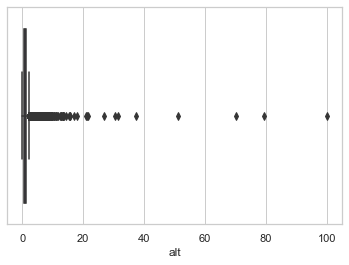

In [94]:
lower, upper = quantile_calc("alt")

Zistili sme, že máme priveľa **vychýlených hodnôt** a nemôžeme všetky vyhodiť z nášho datasetu.
Preto sme sa rozhodli pre metódu úpravy hodnôt pomocou **kvantilov** s individuálnym prístupom.

<AxesSubplot:xlabel='alt'>

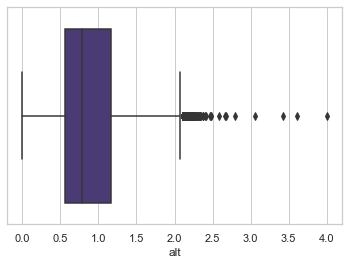

In [95]:
# 2.5 -> 2.05
# 5 -> 2.10
# 20 -> 2.40
# 100 -> 4.00

for x in data_labor.index:
    if data_labor.loc[x, "alt"] > upper:
        data_labor["alt"][x] = (data_labor["alt"][x]/(upper*25)) + upper

sns.boxplot(x=data_labor["alt"])

## HEMOGLOBÍN

Ako úpravu sme opäť zvolili pripočítanie istej hodnoty k "outlierom", aby sme ich
"shiftli" do normálneho intervalu.

4.7805
7.37889
2.59839
0.8829149999999997 11.276475000000001


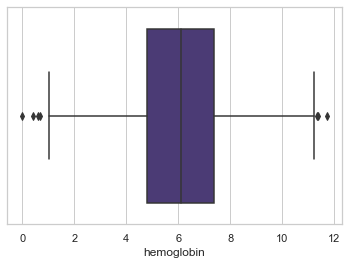

In [96]:
lower, upper = quantile_calc("hemoglobin")

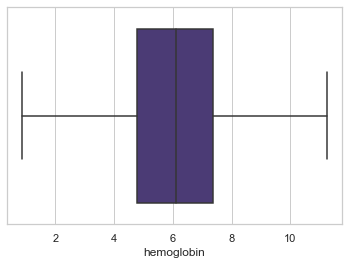

In [97]:
move_outliers(lower, upper, "hemoglobin")

## ALP

Hodnoty alpu sme nemuseli upravovať, keďže boxplot z našej funkcie nevykreslil nijakých
outlierov. Preto sme sa rozhodli daný atribút neupravovať.

31.460749999999997
78.880725
47.419975
0 150.01068750000002


(0, 150.01068750000002)

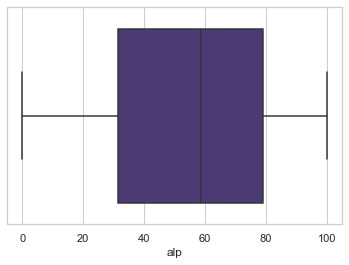

In [98]:
quantile_calc("alp")

## ER-CV

Opäť raz sme použili našu funkciu **quantile_calc()**, ktorá nám okrem
hraničných hodnôt vykreslila boxplot, v ktorom môžeme graficky odpozorovať
vymykajúce sa hodnoty er-cv atribútu.

42.546015
59.861495000000005
17.315480000000008
16.572794999999985 85.83471500000002


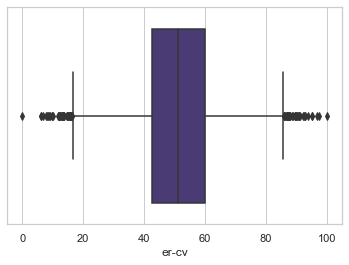

In [99]:
lower, upper = quantile_calc("er-cv")

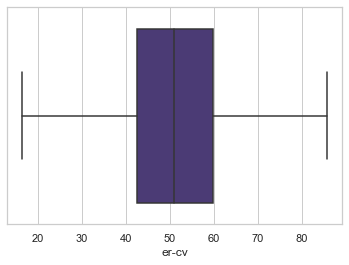

In [100]:
move_outliers(lower, upper, "er-cv")

## AST

Pri atribúte AST sme zvolili identickú taktiku ako pri atribúte er-cv.
* výpočet hraníc a vykreslenie boxplotu
* úprava outlierov pripočítaním/odpočítaním spodnej hranice

41.77068
59.039665
17.268985
15.867202499999998 84.9431425


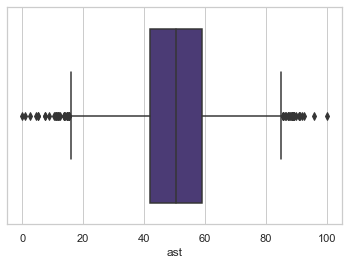

In [101]:
lower, upper = quantile_calc("ast")

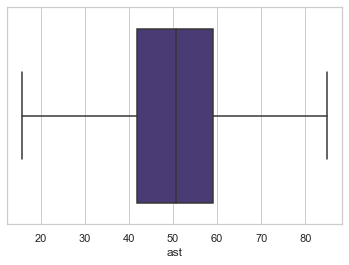

In [102]:
move_outliers(lower, upper, "ast")

In [103]:
data_labor.describe()

,hbver,erytrocyty,alt,leukocyty,etytr,hemoglobin,trombocyty,alp,indicator,er-cv,weight,ast,hematokrit
count,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000,9971.000000
mean,6.071692,6.842049,0.937090,6.064355,5.318564,6.063040,6.084395,54.622262,0.643165,51.129890,70.305658,50.464763,6.461410
std,1.000834,1.460087,0.521472,1.009118,1.393256,1.740164,1.006202,26.103211,0.479090,12.538942,34.976941,12.540005,1.617865
min,2.148000,1.103640,0.000000,2.239400,0.548790,0.882915,2.587100,0.000000,0.000000,16.572795,-54.061950,15.867202,1.991860
25%,5.401305,6.037930,0.563945,5.393100,4.444160,4.780500,5.407585,31.460750,0.000000,42.546015,46.128010,41.770680,5.127505
50%,6.071692,7.004430,0.780950,6.071080,5.120390,6.115310,6.084395,58.533820,1.000000,50.954600,70.793900,50.618370,6.753050
75%,6.742105,7.807580,1.166560,6.730190,6.019805,7.378890,6.765420,78.880725,1.000000,59.861495,94.071090,59.039665,7.490275
max,10.532500,12.769020,4.002399,9.767710,10.673750,11.237110,9.774760,100.000000,1.000000,85.724780,194.734070,84.846140,13.021170


# 2. fáza - Predspracovanie údajov

#### Percentuálny podiel práce: Stahovec = 50%, Viest = 50%

## a) Integrácia a čistenie dát
-------------------------------------------------------

Úvod do 2. fázy predstavuje realizáciu návrhov z konca 1. fázy.
Keďže sme na začiatok exploratívnej analýzy dát nahradzovali chýbajúce hodnoty
priemerom, túto skutočnosť obídeme tak, že si dáta zo súboru načítame znovu a
na tom vyskúšame a zrealizujeme rôzne metódy na úpravu chýbajúcich hodnôt.

Ešte predtým sme vykonali rôzne čistiacie operácie a prípravu dát.

Začali sme načítaním datasetu labor nanovo.

In [104]:
data_labor = pd.read_csv("dataset/labor.csv", sep="\t")
data_labor = data_labor.iloc[:, 1:]
data_labor.head(15)

,smoker,hbver,erytrocyty,alt,leukocyty,etytr,hemoglobin,ssn,name,trombocyty,alp,relationship,indicator,er-cv,weight,ast,hematokrit
0,yes,4.98718,8.89463,2.40520,5.75830,6.93712,4.54976,021-87-4523,Jeremy Tanner,6.23782,45.93625,divoced,0.0,55.43592,-2.73558,51.62366,3.34206
1,yes,6.67732,4.21847,0.66072,6.29064,5.19990,4.10863,513-39-9691,Jocelyn Kelly,6.27100,20.30249,divoced,0.0,45.34617,81.56533,61.59374,5.78180
2,no,6.51444,7.94461,1.28337,5.83567,6.88758,6.45793,881-46-4810,Crystal Kelley,6.02783,82.09305,divoced,0.0,29.29190,151.24191,47.96329,4.55230
3,no,6.05025,7.67537,0.83197,6.33300,4.45912,6.96013,826-16-7757,Doris Duncan,6.83876,69.43441,divoced,1.0,60.47398,83.89451,57.47174,7.17271
4,yes,6.20737,7.84993,0.93395,5.66904,4.88628,6.41332,167-37-6059,John Parks,5.75903,90.09567,divoced,1.0,41.10299,107.22958,34.25820,6.93681
5,no,6.43927,5.78198,0.38563,5.68222,3.97928,4.90713,289-95-2344,Shawn Richardson,6.70422,55.98531,divoced,0.0,70.18438,45.97264,43.98447,4.77041
6,yes,6.20765,5.61952,0.54770,3.98821,6.22502,7.63128,684-70-5275,Janice Buchanan,7.42329,54.79463,single,1.0,52.69461,34.70731,70.42152,7.60427
7,no,4.31997,8.26529,1.53396,5.57558,4.13495,7.57753,555-32-3180,Catherine Jackson,5.60203,65.09512,married,1.0,49.80798,91.49829,67.64974,7.25248
8,no,4.82413,6.25616,0.54975,6.43054,5.79923,6.90669,479-42-8879,Amanda Garcia,6.36469,72.65451,widowed,1.0,54.45955,118.55927,44.94089,6.92202
9,no,5.74884,6.66503,0.52396,6.99089,5.59373,8.31328,375-27-0860,Travis Brown,5.38674,26.96196,married,1.0,42.93586,81.83422,38.56586,6.65939


Rovnako aj profiles.csv je načítaný nanovo.

In [105]:
data_profiles = pd.read_csv("dataset/profiles.csv", sep="\t")
data_profiles = data_profiles.iloc[:, 1:]
data_profiles.head(15)

,birthdate,address,race,current_location,blood_group,ssn,name,sex,residence
0,1956/01/07,"76379 Lynn Drive\r\nKevinchester, VA 69374",Asian,"(Decimal('44.490493'), Decimal('-141.873900'))",A-,328-14-6945,Michelle Perez,F,39446 Gabrielle Pass Suite 764\r\nEast Daniell...
1,"10/28/1984, 00:00:00","PSC 8195, Box 7465\r\nAPO AP 27883",White,"(Decimal('-60.5512795'), Decimal('101.998999'))",B+,841-17-8814,Christopher Bishop,M,"18019 Mary Mountains\r\nScottport, IA 19641"
2,1966-08-30,"3345 Daniels Parks Suite 080\r\nNew Nancy, TX ...",Asian,"(Decimal('-24.9800585'), Decimal('-18.208792'))",A-,871-67-9396,Emily Stevens,F,"4906 Matthew Field\r\nGalvanfort, SC 22896"
3,1910/08/08,"3368 Brent Mall Suite 782\r\nPort Cheryl, WV 0...",black,"(Decimal('51.679296'), Decimal('-96.270056'))",O+,859-80-8937,Carla Hernandez,F,USCGC Schroeder\r\nFPO AE 57164
4,1972-10-28,"175 Michael Neck\r\nSouth Nicoleberg, PA 96022",White,"(Decimal('-85.5392635'), Decimal('-154.434283'))",O+,481-92-7602,Anthony Smith,M,"2148 Webb Valley\r\nNorth Madison, KS 07434"
5,31 Mar 1989,USNV Johnson\r\nFPO AP 32339,white,"(Decimal('-14.0121985'), Decimal('-122.796017'))",AB-,273-99-1555,Scott Campbell,M,"4115 Bowman Coves Apt. 957\r\nHollandland, NJ ..."
6,06 Dec 1917,Unit 3895 Box 8817\r\nDPO AA 44069,Asian,"(Decimal('-35.169301'), Decimal('-153.383042'))",A-,564-52-3982,Ryan Ramirez,M,14408 Robert Mountains Suite 672\r\nRichardpor...
7,2005-03-30,"65932 Benjamin Trafficway\r\nBradleyview, MN 6...",White,"(Decimal('-76.0427015'), Decimal('-176.397613'))",B+,443-16-4619,John Martinez,M,Unit 1668 Box 0922\r\nDPO AE 29854
8,10 Aug 1920,"31360 Caleb Isle Suite 718\r\nLynnfurt, OH 70966",Black,"(Decimal('-86.563849'), Decimal('-164.137234'))",A+,667-24-8122,Ricardo Wright,M,"28996 Jacobs Rue\r\nPort Rachaelside, NE 55686"
9,2012-06-28,"8584 Branch Isle\r\nBrianshire, ND 32402",White,"(Decimal('-21.404155'), Decimal('105.809768'))",O+,421-41-3600,Angela Mcgee,F,"49107 Ortiz Hills Suite 611\r\nHouseborough, T..."


A následne sme spojili oba datasety do jedného skrz parameter ssn.
Všetky čistiace a transformačné operácie budú vykonávané už len na tomto
datasete, ktorý sa volá merged_data.

In [106]:
merged_data = pd.merge(data_labor, data_profiles, on="ssn")
merged_data.head(15)

,smoker,hbver,erytrocyty,alt,leukocyty,etytr,hemoglobin,ssn,name_x,trombocyty,...,ast,hematokrit,birthdate,address,race,current_location,blood_group,name_y,sex,residence
0,yes,4.98718,8.89463,2.40520,5.75830,6.93712,4.54976,021-87-4523,Jeremy Tanner,6.23782,...,51.62366,3.34206,"05/10/1923, 00:00:00","PSC 7581, Box 0898\r\nAPO AA 06225",Asian,"(Decimal('56.944534'), Decimal('42.355764'))",B-,Jeremy Tanner,M,"6041 Henry Inlet\r\nHarrishaven, KS 63783"
1,no,5.00648,7.27841,0.82563,5.54481,5.03221,7.70354,021-87-4523,Jeremy Tanner,7.42732,...,59.24840,6.85814,"05/10/1923, 00:00:00","PSC 7581, Box 0898\r\nAPO AA 06225",Asian,"(Decimal('56.944534'), Decimal('42.355764'))",B-,Jeremy Tanner,M,"6041 Henry Inlet\r\nHarrishaven, KS 63783"
2,yes,6.71966,7.01351,1.00377,5.66778,5.12799,7.73316,021-87-4523,Jeremy Tanner,5.42279,...,46.12997,6.78850,"05/10/1923, 00:00:00","PSC 7581, Box 0898\r\nAPO AA 06225",Asian,"(Decimal('56.944534'), Decimal('42.355764'))",B-,Jeremy Tanner,M,"6041 Henry Inlet\r\nHarrishaven, KS 63783"
3,yes,6.67732,4.21847,0.66072,6.29064,5.19990,4.10863,513-39-9691,Jocelyn Kelly,6.27100,...,61.59374,5.78180,"12/08/1923, 00:00:00","175 Anita Pass\r\nLake Davidchester, NC 93833",Asian,"(Decimal('84.160623'), Decimal('21.685531'))",AB-,Jocelyn Kelly,F,"04425 Wilson Crescent Apt. 364\r\nLisashire, W..."
4,Y,6.06875,5.68453,0.58818,3.90764,5.87943,6.89656,513-39-9691,Jocelyn Kelly,7.03818,...,64.44051,8.14506,"12/08/1923, 00:00:00","175 Anita Pass\r\nLake Davidchester, NC 93833",Asian,"(Decimal('84.160623'), Decimal('21.685531'))",AB-,Jocelyn Kelly,F,"04425 Wilson Crescent Apt. 364\r\nLisashire, W..."
5,Y,6.05162,6.77173,0.45377,4.84219,NaN,6.35723,513-39-9691,Jocelyn Kelly,5.20885,...,38.20747,5.74776,"12/08/1923, 00:00:00","175 Anita Pass\r\nLake Davidchester, NC 93833",Asian,"(Decimal('84.160623'), Decimal('21.685531'))",AB-,Jocelyn Kelly,F,"04425 Wilson Crescent Apt. 364\r\nLisashire, W..."
6,no,6.51444,7.94461,1.28337,5.83567,6.88758,6.45793,881-46-4810,Crystal Kelley,6.02783,...,47.96329,4.55230,"04/25/1939, 00:00:00","9086 Danny Cliff\r\nMitchellport, NM 64440",black,"(Decimal('75.7681605'), Decimal('-60.890199'))",A-,Crystal Kelley,F,Unit 6525 Box 9751\r\nDPO AP 62291
7,no,6.34520,7.38959,0.86698,4.17522,4.90444,3.91870,881-46-4810,Crystal Kelley,4.13432,...,46.57264,5.67578,"04/25/1939, 00:00:00","9086 Danny Cliff\r\nMitchellport, NM 64440",black,"(Decimal('75.7681605'), Decimal('-60.890199'))",A-,Crystal Kelley,F,Unit 6525 Box 9751\r\nDPO AP 62291
8,no,5.31645,7.41004,0.85142,7.38934,5.33935,4.28161,881-46-4810,Crystal Kelley,6.85927,...,44.68660,7.87799,"04/25/1939, 00:00:00","9086 Danny Cliff\r\nMitchellport, NM 64440",black,"(Decimal('75.7681605'), Decimal('-60.890199'))",A-,Crystal Kelley,F,Unit 6525 Box 9751\r\nDPO AP 62291
9,no,6.05025,7.67537,0.83197,6.33300,4.45912,6.96013,826-16-7757,Doris Duncan,6.83876,...,57.47174,7.17271,1947/06/17,USNV Lewis\r\nFPO AA 51211,Indian,"(Decimal('51.933690'), Decimal('-76.430283'))",O+,Doris Duncan,F,"7806 Laura Walk Apt. 892\r\nDawnfort, WV 09432"


Nasleduje realizácia návrhov z konca prvej fázy. Všetky zmeny
sú identické s ich návrhmi s jedinou zmenou, keďže dataset, na ktorom
vykonávame zmeny, má iný názov. Operácia je ale stále rovnaká.

**Začali sme úpravou nevhodných štruktúr dát v datasete**.

### Nevhodná štruktúra dát

Jednotný formát pre dátum:

In [107]:
merged_data[["birthdate"]] = merged_data[["birthdate"]].apply(pd.to_datetime)
merged_data

,smoker,hbver,erytrocyty,alt,leukocyty,etytr,hemoglobin,ssn,name_x,trombocyty,...,ast,hematokrit,birthdate,address,race,current_location,blood_group,name_y,sex,residence
0,yes,4.98718,8.89463,2.40520,5.75830,6.93712,4.54976,021-87-4523,Jeremy Tanner,6.23782,...,51.62366,3.34206,1923-05-10,"PSC 7581, Box 0898\r\nAPO AA 06225",Asian,"(Decimal('56.944534'), Decimal('42.355764'))",B-,Jeremy Tanner,M,"6041 Henry Inlet\r\nHarrishaven, KS 63783"
1,no,5.00648,7.27841,0.82563,5.54481,5.03221,7.70354,021-87-4523,Jeremy Tanner,7.42732,...,59.24840,6.85814,1923-05-10,"PSC 7581, Box 0898\r\nAPO AA 06225",Asian,"(Decimal('56.944534'), Decimal('42.355764'))",B-,Jeremy Tanner,M,"6041 Henry Inlet\r\nHarrishaven, KS 63783"
2,yes,6.71966,7.01351,1.00377,5.66778,5.12799,7.73316,021-87-4523,Jeremy Tanner,5.42279,...,46.12997,6.78850,1923-05-10,"PSC 7581, Box 0898\r\nAPO AA 06225",Asian,"(Decimal('56.944534'), Decimal('42.355764'))",B-,Jeremy Tanner,M,"6041 Henry Inlet\r\nHarrishaven, KS 63783"
3,yes,6.67732,4.21847,0.66072,6.29064,5.19990,4.10863,513-39-9691,Jocelyn Kelly,6.27100,...,61.59374,5.78180,1923-12-08,"175 Anita Pass\r\nLake Davidchester, NC 93833",Asian,"(Decimal('84.160623'), Decimal('21.685531'))",AB-,Jocelyn Kelly,F,"04425 Wilson Crescent Apt. 364\r\nLisashire, W..."
4,Y,6.06875,5.68453,0.58818,3.90764,5.87943,6.89656,513-39-9691,Jocelyn Kelly,7.03818,...,64.44051,8.14506,1923-12-08,"175 Anita Pass\r\nLake Davidchester, NC 93833",Asian,"(Decimal('84.160623'), Decimal('21.685531'))",AB-,Jocelyn Kelly,F,"04425 Wilson Crescent Apt. 364\r\nLisashire, W..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9966,yes,5.56044,7.88598,1.25698,6.44806,4.91910,5.42717,774-29-8698,Stacy Young,5.95845,...,56.75972,6.44557,1990-10-21,"5329 Green Circle\r\nWest Janet, CO 94192",White,"(Decimal('89.633417'), Decimal('92.757661'))",B-,Stacy Young,F,"3827 Sullivan Manor Suite 578\r\nJoehaven, ID ..."
9967,no,6.02362,4.17512,0.51225,5.81361,5.63849,4.22984,774-29-8698,Stacy Young,5.86267,...,35.73155,5.78540,1990-10-21,"5329 Green Circle\r\nWest Janet, CO 94192",White,"(Decimal('89.633417'), Decimal('92.757661'))",B-,Stacy Young,F,"3827 Sullivan Manor Suite 578\r\nJoehaven, ID ..."
9968,yes,5.63262,5.74856,0.39597,7.16376,5.98503,7.57294,461-85-3049,Jason Santos MD,6.82832,...,51.29995,7.69555,1916-02-13,"4749 Ashley Mission\r\nNew Natalie, ME 97315",White,"(Decimal('60.916302'), Decimal('-46.237649'))",AB-,Jason Santos MD,M,"782 Cross Glen Apt. 928\r\nMelissaland, NE 05568"
9969,no,6.74328,7.27587,0.98270,4.87883,4.79271,6.66698,461-85-3049,Jason Santos MD,8.27491,...,27.24570,7.23617,1916-02-13,"4749 Ashley Mission\r\nNew Natalie, ME 97315",White,"(Decimal('60.916302'), Decimal('-46.237649'))",AB-,Jason Santos MD,M,"782 Cross Glen Apt. 928\r\nMelissaland, NE 05568"


Čitateľnejšia reprezentácia aktuálnej polohy:

In [108]:
merged_data["current_location"] = merged_data["current_location"].str.replace(r"[A-Za-z]", "", regex=True)
merged_data["current_location"] = merged_data["current_location"].str.replace(r"[()']", "", regex=True)
merged_data

,smoker,hbver,erytrocyty,alt,leukocyty,etytr,hemoglobin,ssn,name_x,trombocyty,...,ast,hematokrit,birthdate,address,race,current_location,blood_group,name_y,sex,residence
0,yes,4.98718,8.89463,2.40520,5.75830,6.93712,4.54976,021-87-4523,Jeremy Tanner,6.23782,...,51.62366,3.34206,1923-05-10,"PSC 7581, Box 0898\r\nAPO AA 06225",Asian,"56.944534, 42.355764",B-,Jeremy Tanner,M,"6041 Henry Inlet\r\nHarrishaven, KS 63783"
1,no,5.00648,7.27841,0.82563,5.54481,5.03221,7.70354,021-87-4523,Jeremy Tanner,7.42732,...,59.24840,6.85814,1923-05-10,"PSC 7581, Box 0898\r\nAPO AA 06225",Asian,"56.944534, 42.355764",B-,Jeremy Tanner,M,"6041 Henry Inlet\r\nHarrishaven, KS 63783"
2,yes,6.71966,7.01351,1.00377,5.66778,5.12799,7.73316,021-87-4523,Jeremy Tanner,5.42279,...,46.12997,6.78850,1923-05-10,"PSC 7581, Box 0898\r\nAPO AA 06225",Asian,"56.944534, 42.355764",B-,Jeremy Tanner,M,"6041 Henry Inlet\r\nHarrishaven, KS 63783"
3,yes,6.67732,4.21847,0.66072,6.29064,5.19990,4.10863,513-39-9691,Jocelyn Kelly,6.27100,...,61.59374,5.78180,1923-12-08,"175 Anita Pass\r\nLake Davidchester, NC 93833",Asian,"84.160623, 21.685531",AB-,Jocelyn Kelly,F,"04425 Wilson Crescent Apt. 364\r\nLisashire, W..."
4,Y,6.06875,5.68453,0.58818,3.90764,5.87943,6.89656,513-39-9691,Jocelyn Kelly,7.03818,...,64.44051,8.14506,1923-12-08,"175 Anita Pass\r\nLake Davidchester, NC 93833",Asian,"84.160623, 21.685531",AB-,Jocelyn Kelly,F,"04425 Wilson Crescent Apt. 364\r\nLisashire, W..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9966,yes,5.56044,7.88598,1.25698,6.44806,4.91910,5.42717,774-29-8698,Stacy Young,5.95845,...,56.75972,6.44557,1990-10-21,"5329 Green Circle\r\nWest Janet, CO 94192",White,"89.633417, 92.757661",B-,Stacy Young,F,"3827 Sullivan Manor Suite 578\r\nJoehaven, ID ..."
9967,no,6.02362,4.17512,0.51225,5.81361,5.63849,4.22984,774-29-8698,Stacy Young,5.86267,...,35.73155,5.78540,1990-10-21,"5329 Green Circle\r\nWest Janet, CO 94192",White,"89.633417, 92.757661",B-,Stacy Young,F,"3827 Sullivan Manor Suite 578\r\nJoehaven, ID ..."
9968,yes,5.63262,5.74856,0.39597,7.16376,5.98503,7.57294,461-85-3049,Jason Santos MD,6.82832,...,51.29995,7.69555,1916-02-13,"4749 Ashley Mission\r\nNew Natalie, ME 97315",White,"60.916302, -46.237649",AB-,Jason Santos MD,M,"782 Cross Glen Apt. 928\r\nMelissaland, NE 05568"
9969,no,6.74328,7.27587,0.98270,4.87883,4.79271,6.66698,461-85-3049,Jason Santos MD,8.27491,...,27.24570,7.23617,1916-02-13,"4749 Ashley Mission\r\nNew Natalie, ME 97315",White,"60.916302, -46.237649",AB-,Jason Santos MD,M,"782 Cross Glen Apt. 928\r\nMelissaland, NE 05568"


Odstránenie formátovacích znakov z atribútu adresa:

In [109]:
merged_data["address"] = merged_data["address"].str.replace(r"[\r\n]", " ", regex = True)
merged_data

,smoker,hbver,erytrocyty,alt,leukocyty,etytr,hemoglobin,ssn,name_x,trombocyty,...,ast,hematokrit,birthdate,address,race,current_location,blood_group,name_y,sex,residence
0,yes,4.98718,8.89463,2.40520,5.75830,6.93712,4.54976,021-87-4523,Jeremy Tanner,6.23782,...,51.62366,3.34206,1923-05-10,"PSC 7581, Box 0898 APO AA 06225",Asian,"56.944534, 42.355764",B-,Jeremy Tanner,M,"6041 Henry Inlet\r\nHarrishaven, KS 63783"
1,no,5.00648,7.27841,0.82563,5.54481,5.03221,7.70354,021-87-4523,Jeremy Tanner,7.42732,...,59.24840,6.85814,1923-05-10,"PSC 7581, Box 0898 APO AA 06225",Asian,"56.944534, 42.355764",B-,Jeremy Tanner,M,"6041 Henry Inlet\r\nHarrishaven, KS 63783"
2,yes,6.71966,7.01351,1.00377,5.66778,5.12799,7.73316,021-87-4523,Jeremy Tanner,5.42279,...,46.12997,6.78850,1923-05-10,"PSC 7581, Box 0898 APO AA 06225",Asian,"56.944534, 42.355764",B-,Jeremy Tanner,M,"6041 Henry Inlet\r\nHarrishaven, KS 63783"
3,yes,6.67732,4.21847,0.66072,6.29064,5.19990,4.10863,513-39-9691,Jocelyn Kelly,6.27100,...,61.59374,5.78180,1923-12-08,"175 Anita Pass Lake Davidchester, NC 93833",Asian,"84.160623, 21.685531",AB-,Jocelyn Kelly,F,"04425 Wilson Crescent Apt. 364\r\nLisashire, W..."
4,Y,6.06875,5.68453,0.58818,3.90764,5.87943,6.89656,513-39-9691,Jocelyn Kelly,7.03818,...,64.44051,8.14506,1923-12-08,"175 Anita Pass Lake Davidchester, NC 93833",Asian,"84.160623, 21.685531",AB-,Jocelyn Kelly,F,"04425 Wilson Crescent Apt. 364\r\nLisashire, W..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9966,yes,5.56044,7.88598,1.25698,6.44806,4.91910,5.42717,774-29-8698,Stacy Young,5.95845,...,56.75972,6.44557,1990-10-21,"5329 Green Circle West Janet, CO 94192",White,"89.633417, 92.757661",B-,Stacy Young,F,"3827 Sullivan Manor Suite 578\r\nJoehaven, ID ..."
9967,no,6.02362,4.17512,0.51225,5.81361,5.63849,4.22984,774-29-8698,Stacy Young,5.86267,...,35.73155,5.78540,1990-10-21,"5329 Green Circle West Janet, CO 94192",White,"89.633417, 92.757661",B-,Stacy Young,F,"3827 Sullivan Manor Suite 578\r\nJoehaven, ID ..."
9968,yes,5.63262,5.74856,0.39597,7.16376,5.98503,7.57294,461-85-3049,Jason Santos MD,6.82832,...,51.29995,7.69555,1916-02-13,"4749 Ashley Mission New Natalie, ME 97315",White,"60.916302, -46.237649",AB-,Jason Santos MD,M,"782 Cross Glen Apt. 928\r\nMelissaland, NE 05568"
9969,no,6.74328,7.27587,0.98270,4.87883,4.79271,6.66698,461-85-3049,Jason Santos MD,8.27491,...,27.24570,7.23617,1916-02-13,"4749 Ashley Mission New Natalie, ME 97315",White,"60.916302, -46.237649",AB-,Jason Santos MD,M,"782 Cross Glen Apt. 928\r\nMelissaland, NE 05568"


Odstránenie formátovacích znakov z "residence":

In [110]:
merged_data["residence"] = merged_data["residence"].str.replace(r"[\r\n]", " ", regex = True)
merged_data

,smoker,hbver,erytrocyty,alt,leukocyty,etytr,hemoglobin,ssn,name_x,trombocyty,...,ast,hematokrit,birthdate,address,race,current_location,blood_group,name_y,sex,residence
0,yes,4.98718,8.89463,2.40520,5.75830,6.93712,4.54976,021-87-4523,Jeremy Tanner,6.23782,...,51.62366,3.34206,1923-05-10,"PSC 7581, Box 0898 APO AA 06225",Asian,"56.944534, 42.355764",B-,Jeremy Tanner,M,"6041 Henry Inlet Harrishaven, KS 63783"
1,no,5.00648,7.27841,0.82563,5.54481,5.03221,7.70354,021-87-4523,Jeremy Tanner,7.42732,...,59.24840,6.85814,1923-05-10,"PSC 7581, Box 0898 APO AA 06225",Asian,"56.944534, 42.355764",B-,Jeremy Tanner,M,"6041 Henry Inlet Harrishaven, KS 63783"
2,yes,6.71966,7.01351,1.00377,5.66778,5.12799,7.73316,021-87-4523,Jeremy Tanner,5.42279,...,46.12997,6.78850,1923-05-10,"PSC 7581, Box 0898 APO AA 06225",Asian,"56.944534, 42.355764",B-,Jeremy Tanner,M,"6041 Henry Inlet Harrishaven, KS 63783"
3,yes,6.67732,4.21847,0.66072,6.29064,5.19990,4.10863,513-39-9691,Jocelyn Kelly,6.27100,...,61.59374,5.78180,1923-12-08,"175 Anita Pass Lake Davidchester, NC 93833",Asian,"84.160623, 21.685531",AB-,Jocelyn Kelly,F,"04425 Wilson Crescent Apt. 364 Lisashire, WY ..."
4,Y,6.06875,5.68453,0.58818,3.90764,5.87943,6.89656,513-39-9691,Jocelyn Kelly,7.03818,...,64.44051,8.14506,1923-12-08,"175 Anita Pass Lake Davidchester, NC 93833",Asian,"84.160623, 21.685531",AB-,Jocelyn Kelly,F,"04425 Wilson Crescent Apt. 364 Lisashire, WY ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9966,yes,5.56044,7.88598,1.25698,6.44806,4.91910,5.42717,774-29-8698,Stacy Young,5.95845,...,56.75972,6.44557,1990-10-21,"5329 Green Circle West Janet, CO 94192",White,"89.633417, 92.757661",B-,Stacy Young,F,"3827 Sullivan Manor Suite 578 Joehaven, ID 19902"
9967,no,6.02362,4.17512,0.51225,5.81361,5.63849,4.22984,774-29-8698,Stacy Young,5.86267,...,35.73155,5.78540,1990-10-21,"5329 Green Circle West Janet, CO 94192",White,"89.633417, 92.757661",B-,Stacy Young,F,"3827 Sullivan Manor Suite 578 Joehaven, ID 19902"
9968,yes,5.63262,5.74856,0.39597,7.16376,5.98503,7.57294,461-85-3049,Jason Santos MD,6.82832,...,51.29995,7.69555,1916-02-13,"4749 Ashley Mission New Natalie, ME 97315",White,"60.916302, -46.237649",AB-,Jason Santos MD,M,"782 Cross Glen Apt. 928 Melissaland, NE 05568"
9969,no,6.74328,7.27587,0.98270,4.87883,4.79271,6.66698,461-85-3049,Jason Santos MD,8.27491,...,27.24570,7.23617,1916-02-13,"4749 Ashley Mission New Natalie, ME 97315",White,"60.916302, -46.237649",AB-,Jason Santos MD,M,"782 Cross Glen Apt. 928 Melissaland, NE 05568"


### Duplicitné záznamy

Keďže duplicitné záznamy nepridávajú nijakú hodnotu pre trénovanie umelej inteligencie, je
potrebné sa ich zbaviť.

V tejto bunke sme spočítali riadky, ktoré majú **duplikát** v celom datasete.

In [111]:
merged_data.duplicated(keep=False).sum()

198

Riešenie duplikátnych riadkov odstránením a ponechaním len jedného unikátneho záznamu:

In [112]:
merged_data.drop_duplicates(inplace=True)
merged_data.duplicated(keep=False).sum()
merged_data.index = range(len(merged_data))
merged_data

,smoker,hbver,erytrocyty,alt,leukocyty,etytr,hemoglobin,ssn,name_x,trombocyty,...,ast,hematokrit,birthdate,address,race,current_location,blood_group,name_y,sex,residence
0,yes,4.98718,8.89463,2.40520,5.75830,6.93712,4.54976,021-87-4523,Jeremy Tanner,6.23782,...,51.62366,3.34206,1923-05-10,"PSC 7581, Box 0898 APO AA 06225",Asian,"56.944534, 42.355764",B-,Jeremy Tanner,M,"6041 Henry Inlet Harrishaven, KS 63783"
1,no,5.00648,7.27841,0.82563,5.54481,5.03221,7.70354,021-87-4523,Jeremy Tanner,7.42732,...,59.24840,6.85814,1923-05-10,"PSC 7581, Box 0898 APO AA 06225",Asian,"56.944534, 42.355764",B-,Jeremy Tanner,M,"6041 Henry Inlet Harrishaven, KS 63783"
2,yes,6.71966,7.01351,1.00377,5.66778,5.12799,7.73316,021-87-4523,Jeremy Tanner,5.42279,...,46.12997,6.78850,1923-05-10,"PSC 7581, Box 0898 APO AA 06225",Asian,"56.944534, 42.355764",B-,Jeremy Tanner,M,"6041 Henry Inlet Harrishaven, KS 63783"
3,yes,6.67732,4.21847,0.66072,6.29064,5.19990,4.10863,513-39-9691,Jocelyn Kelly,6.27100,...,61.59374,5.78180,1923-12-08,"175 Anita Pass Lake Davidchester, NC 93833",Asian,"84.160623, 21.685531",AB-,Jocelyn Kelly,F,"04425 Wilson Crescent Apt. 364 Lisashire, WY ..."
4,Y,6.06875,5.68453,0.58818,3.90764,5.87943,6.89656,513-39-9691,Jocelyn Kelly,7.03818,...,64.44051,8.14506,1923-12-08,"175 Anita Pass Lake Davidchester, NC 93833",Asian,"84.160623, 21.685531",AB-,Jocelyn Kelly,F,"04425 Wilson Crescent Apt. 364 Lisashire, WY ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9867,yes,5.56044,7.88598,1.25698,6.44806,4.91910,5.42717,774-29-8698,Stacy Young,5.95845,...,56.75972,6.44557,1990-10-21,"5329 Green Circle West Janet, CO 94192",White,"89.633417, 92.757661",B-,Stacy Young,F,"3827 Sullivan Manor Suite 578 Joehaven, ID 19902"
9868,no,6.02362,4.17512,0.51225,5.81361,5.63849,4.22984,774-29-8698,Stacy Young,5.86267,...,35.73155,5.78540,1990-10-21,"5329 Green Circle West Janet, CO 94192",White,"89.633417, 92.757661",B-,Stacy Young,F,"3827 Sullivan Manor Suite 578 Joehaven, ID 19902"
9869,yes,5.63262,5.74856,0.39597,7.16376,5.98503,7.57294,461-85-3049,Jason Santos MD,6.82832,...,51.29995,7.69555,1916-02-13,"4749 Ashley Mission New Natalie, ME 97315",White,"60.916302, -46.237649",AB-,Jason Santos MD,M,"782 Cross Glen Apt. 928 Melissaland, NE 05568"
9870,no,6.74328,7.27587,0.98270,4.87883,4.79271,6.66698,461-85-3049,Jason Santos MD,8.27491,...,27.24570,7.23617,1916-02-13,"4749 Ashley Mission New Natalie, ME 97315",White,"60.916302, -46.237649",AB-,Jason Santos MD,M,"782 Cross Glen Apt. 928 Melissaland, NE 05568"


### Nejednotné formáty dát

Je nelogické kontrolovať jednotnosť formátov pri nekategorických stringových
formátoch a numerických záznamoch, preto ich vykonávame len na kategorických
string atribútoch.

**Zoznam kategorických atribútov**:
* smoker
* relationship
* race
* blood_group
* sex

Unikátne formáty pre atribút smoker:

In [113]:
merged_data["smoker"].unique()

array(['yes', 'no', 'Y', 'N'], dtype=object)

Náhrada v atribúte smoker:

In [114]:
merged_data["smoker"] = merged_data["smoker"].str.replace("yes", "1")
merged_data["smoker"] = merged_data["smoker"].str.replace("no", "0")
merged_data["smoker"] = merged_data["smoker"].str.replace("Y", "1")
merged_data["smoker"] = merged_data["smoker"].str.replace("N", "0")
merged_data["smoker"] = merged_data["smoker"].astype(int)
merged_data

,smoker,hbver,erytrocyty,alt,leukocyty,etytr,hemoglobin,ssn,name_x,trombocyty,...,ast,hematokrit,birthdate,address,race,current_location,blood_group,name_y,sex,residence
0,1,4.98718,8.89463,2.40520,5.75830,6.93712,4.54976,021-87-4523,Jeremy Tanner,6.23782,...,51.62366,3.34206,1923-05-10,"PSC 7581, Box 0898 APO AA 06225",Asian,"56.944534, 42.355764",B-,Jeremy Tanner,M,"6041 Henry Inlet Harrishaven, KS 63783"
1,0,5.00648,7.27841,0.82563,5.54481,5.03221,7.70354,021-87-4523,Jeremy Tanner,7.42732,...,59.24840,6.85814,1923-05-10,"PSC 7581, Box 0898 APO AA 06225",Asian,"56.944534, 42.355764",B-,Jeremy Tanner,M,"6041 Henry Inlet Harrishaven, KS 63783"
2,1,6.71966,7.01351,1.00377,5.66778,5.12799,7.73316,021-87-4523,Jeremy Tanner,5.42279,...,46.12997,6.78850,1923-05-10,"PSC 7581, Box 0898 APO AA 06225",Asian,"56.944534, 42.355764",B-,Jeremy Tanner,M,"6041 Henry Inlet Harrishaven, KS 63783"
3,1,6.67732,4.21847,0.66072,6.29064,5.19990,4.10863,513-39-9691,Jocelyn Kelly,6.27100,...,61.59374,5.78180,1923-12-08,"175 Anita Pass Lake Davidchester, NC 93833",Asian,"84.160623, 21.685531",AB-,Jocelyn Kelly,F,"04425 Wilson Crescent Apt. 364 Lisashire, WY ..."
4,1,6.06875,5.68453,0.58818,3.90764,5.87943,6.89656,513-39-9691,Jocelyn Kelly,7.03818,...,64.44051,8.14506,1923-12-08,"175 Anita Pass Lake Davidchester, NC 93833",Asian,"84.160623, 21.685531",AB-,Jocelyn Kelly,F,"04425 Wilson Crescent Apt. 364 Lisashire, WY ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9867,1,5.56044,7.88598,1.25698,6.44806,4.91910,5.42717,774-29-8698,Stacy Young,5.95845,...,56.75972,6.44557,1990-10-21,"5329 Green Circle West Janet, CO 94192",White,"89.633417, 92.757661",B-,Stacy Young,F,"3827 Sullivan Manor Suite 578 Joehaven, ID 19902"
9868,0,6.02362,4.17512,0.51225,5.81361,5.63849,4.22984,774-29-8698,Stacy Young,5.86267,...,35.73155,5.78540,1990-10-21,"5329 Green Circle West Janet, CO 94192",White,"89.633417, 92.757661",B-,Stacy Young,F,"3827 Sullivan Manor Suite 578 Joehaven, ID 19902"
9869,1,5.63262,5.74856,0.39597,7.16376,5.98503,7.57294,461-85-3049,Jason Santos MD,6.82832,...,51.29995,7.69555,1916-02-13,"4749 Ashley Mission New Natalie, ME 97315",White,"60.916302, -46.237649",AB-,Jason Santos MD,M,"782 Cross Glen Apt. 928 Melissaland, NE 05568"
9870,0,6.74328,7.27587,0.98270,4.87883,4.79271,6.66698,461-85-3049,Jason Santos MD,8.27491,...,27.24570,7.23617,1916-02-13,"4749 Ashley Mission New Natalie, ME 97315",White,"60.916302, -46.237649",AB-,Jason Santos MD,M,"782 Cross Glen Apt. 928 Melissaland, NE 05568"


Unikátne formáty pre atribút relationship:

In [115]:
merged_data["relationship"].unique()

array(['divoced', 'single', 'nop', 'married', 'widowed', 'separated'],
      dtype=object)

Riešenie pre atribút relationship, kde použijeme slovník na premapovanie
string hodnôt na čísla (+fix na hrúbku v divorced):

In [116]:
merged_data["relationship"] = merged_data["relationship"].str.replace("divoced", "divorced")

merged_data.relationship = merged_data.relationship.replace(
    {"nop": 0, "single": 1, "married": 2, "separated": 3, "divorced": 4, "widowed": 5})

merged_data

,smoker,hbver,erytrocyty,alt,leukocyty,etytr,hemoglobin,ssn,name_x,trombocyty,...,ast,hematokrit,birthdate,address,race,current_location,blood_group,name_y,sex,residence
0,1,4.98718,8.89463,2.40520,5.75830,6.93712,4.54976,021-87-4523,Jeremy Tanner,6.23782,...,51.62366,3.34206,1923-05-10,"PSC 7581, Box 0898 APO AA 06225",Asian,"56.944534, 42.355764",B-,Jeremy Tanner,M,"6041 Henry Inlet Harrishaven, KS 63783"
1,0,5.00648,7.27841,0.82563,5.54481,5.03221,7.70354,021-87-4523,Jeremy Tanner,7.42732,...,59.24840,6.85814,1923-05-10,"PSC 7581, Box 0898 APO AA 06225",Asian,"56.944534, 42.355764",B-,Jeremy Tanner,M,"6041 Henry Inlet Harrishaven, KS 63783"
2,1,6.71966,7.01351,1.00377,5.66778,5.12799,7.73316,021-87-4523,Jeremy Tanner,5.42279,...,46.12997,6.78850,1923-05-10,"PSC 7581, Box 0898 APO AA 06225",Asian,"56.944534, 42.355764",B-,Jeremy Tanner,M,"6041 Henry Inlet Harrishaven, KS 63783"
3,1,6.67732,4.21847,0.66072,6.29064,5.19990,4.10863,513-39-9691,Jocelyn Kelly,6.27100,...,61.59374,5.78180,1923-12-08,"175 Anita Pass Lake Davidchester, NC 93833",Asian,"84.160623, 21.685531",AB-,Jocelyn Kelly,F,"04425 Wilson Crescent Apt. 364 Lisashire, WY ..."
4,1,6.06875,5.68453,0.58818,3.90764,5.87943,6.89656,513-39-9691,Jocelyn Kelly,7.03818,...,64.44051,8.14506,1923-12-08,"175 Anita Pass Lake Davidchester, NC 93833",Asian,"84.160623, 21.685531",AB-,Jocelyn Kelly,F,"04425 Wilson Crescent Apt. 364 Lisashire, WY ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9867,1,5.56044,7.88598,1.25698,6.44806,4.91910,5.42717,774-29-8698,Stacy Young,5.95845,...,56.75972,6.44557,1990-10-21,"5329 Green Circle West Janet, CO 94192",White,"89.633417, 92.757661",B-,Stacy Young,F,"3827 Sullivan Manor Suite 578 Joehaven, ID 19902"
9868,0,6.02362,4.17512,0.51225,5.81361,5.63849,4.22984,774-29-8698,Stacy Young,5.86267,...,35.73155,5.78540,1990-10-21,"5329 Green Circle West Janet, CO 94192",White,"89.633417, 92.757661",B-,Stacy Young,F,"3827 Sullivan Manor Suite 578 Joehaven, ID 19902"
9869,1,5.63262,5.74856,0.39597,7.16376,5.98503,7.57294,461-85-3049,Jason Santos MD,6.82832,...,51.29995,7.69555,1916-02-13,"4749 Ashley Mission New Natalie, ME 97315",White,"60.916302, -46.237649",AB-,Jason Santos MD,M,"782 Cross Glen Apt. 928 Melissaland, NE 05568"
9870,0,6.74328,7.27587,0.98270,4.87883,4.79271,6.66698,461-85-3049,Jason Santos MD,8.27491,...,27.24570,7.23617,1916-02-13,"4749 Ashley Mission New Natalie, ME 97315",White,"60.916302, -46.237649",AB-,Jason Santos MD,M,"782 Cross Glen Apt. 928 Melissaland, NE 05568"


Unikátne formáty pre rasu:

In [117]:
merged_data["race"].unique()

array(['Asian', 'black', 'Indian', 'White', 'Black', 'blsck', 'Hawaiian',
       'white'], dtype=object)

Pre rasy sme identifikovali preklep v prípade rasy **black**, kde bolo **blsck**.
Tento preklep by sme upravili funkciou replace().
Taktiež sme si všimli, že sa jednotlivé rasy začínajú na malé aj veľké písmená.
Túto skutočnosť by sme upravili pomocou funkcie lower(), ktorá zmení všetky veľké
písmená na malé.

In [118]:
merged_data["race"] = merged_data["race"].str.replace("blsck", "black")
merged_data["race"] = merged_data["race"].str.lower()

merged_data.race = merged_data.race.replace({"asian": 0, "black": 1, "hawaiian": 2, "indian": 3, "white": 4})
merged_data

,smoker,hbver,erytrocyty,alt,leukocyty,etytr,hemoglobin,ssn,name_x,trombocyty,...,ast,hematokrit,birthdate,address,race,current_location,blood_group,name_y,sex,residence
0,1,4.98718,8.89463,2.40520,5.75830,6.93712,4.54976,021-87-4523,Jeremy Tanner,6.23782,...,51.62366,3.34206,1923-05-10,"PSC 7581, Box 0898 APO AA 06225",0,"56.944534, 42.355764",B-,Jeremy Tanner,M,"6041 Henry Inlet Harrishaven, KS 63783"
1,0,5.00648,7.27841,0.82563,5.54481,5.03221,7.70354,021-87-4523,Jeremy Tanner,7.42732,...,59.24840,6.85814,1923-05-10,"PSC 7581, Box 0898 APO AA 06225",0,"56.944534, 42.355764",B-,Jeremy Tanner,M,"6041 Henry Inlet Harrishaven, KS 63783"
2,1,6.71966,7.01351,1.00377,5.66778,5.12799,7.73316,021-87-4523,Jeremy Tanner,5.42279,...,46.12997,6.78850,1923-05-10,"PSC 7581, Box 0898 APO AA 06225",0,"56.944534, 42.355764",B-,Jeremy Tanner,M,"6041 Henry Inlet Harrishaven, KS 63783"
3,1,6.67732,4.21847,0.66072,6.29064,5.19990,4.10863,513-39-9691,Jocelyn Kelly,6.27100,...,61.59374,5.78180,1923-12-08,"175 Anita Pass Lake Davidchester, NC 93833",0,"84.160623, 21.685531",AB-,Jocelyn Kelly,F,"04425 Wilson Crescent Apt. 364 Lisashire, WY ..."
4,1,6.06875,5.68453,0.58818,3.90764,5.87943,6.89656,513-39-9691,Jocelyn Kelly,7.03818,...,64.44051,8.14506,1923-12-08,"175 Anita Pass Lake Davidchester, NC 93833",0,"84.160623, 21.685531",AB-,Jocelyn Kelly,F,"04425 Wilson Crescent Apt. 364 Lisashire, WY ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9867,1,5.56044,7.88598,1.25698,6.44806,4.91910,5.42717,774-29-8698,Stacy Young,5.95845,...,56.75972,6.44557,1990-10-21,"5329 Green Circle West Janet, CO 94192",4,"89.633417, 92.757661",B-,Stacy Young,F,"3827 Sullivan Manor Suite 578 Joehaven, ID 19902"
9868,0,6.02362,4.17512,0.51225,5.81361,5.63849,4.22984,774-29-8698,Stacy Young,5.86267,...,35.73155,5.78540,1990-10-21,"5329 Green Circle West Janet, CO 94192",4,"89.633417, 92.757661",B-,Stacy Young,F,"3827 Sullivan Manor Suite 578 Joehaven, ID 19902"
9869,1,5.63262,5.74856,0.39597,7.16376,5.98503,7.57294,461-85-3049,Jason Santos MD,6.82832,...,51.29995,7.69555,1916-02-13,"4749 Ashley Mission New Natalie, ME 97315",4,"60.916302, -46.237649",AB-,Jason Santos MD,M,"782 Cross Glen Apt. 928 Melissaland, NE 05568"
9870,0,6.74328,7.27587,0.98270,4.87883,4.79271,6.66698,461-85-3049,Jason Santos MD,8.27491,...,27.24570,7.23617,1916-02-13,"4749 Ashley Mission New Natalie, ME 97315",4,"60.916302, -46.237649",AB-,Jason Santos MD,M,"782 Cross Glen Apt. 928 Melissaland, NE 05568"


Všetky formáty krvných skupín:

In [119]:
merged_data["blood_group"].unique()

array(['B-', 'AB-', 'A-', 'O+', 'A+', 'AB+', 'B+', 'O-'], dtype=object)

Konvertovanie krvných skupín na numerickú podobu:

In [120]:
merged_data.blood_group = merged_data.blood_group.replace(
    {"O-": 0, "O+": 1, "A-": 2, "A+": 3, "B-": 4, "B+": 5, "AB-": 6, "AB+": 7})

merged_data

,smoker,hbver,erytrocyty,alt,leukocyty,etytr,hemoglobin,ssn,name_x,trombocyty,...,ast,hematokrit,birthdate,address,race,current_location,blood_group,name_y,sex,residence
0,1,4.98718,8.89463,2.40520,5.75830,6.93712,4.54976,021-87-4523,Jeremy Tanner,6.23782,...,51.62366,3.34206,1923-05-10,"PSC 7581, Box 0898 APO AA 06225",0,"56.944534, 42.355764",4,Jeremy Tanner,M,"6041 Henry Inlet Harrishaven, KS 63783"
1,0,5.00648,7.27841,0.82563,5.54481,5.03221,7.70354,021-87-4523,Jeremy Tanner,7.42732,...,59.24840,6.85814,1923-05-10,"PSC 7581, Box 0898 APO AA 06225",0,"56.944534, 42.355764",4,Jeremy Tanner,M,"6041 Henry Inlet Harrishaven, KS 63783"
2,1,6.71966,7.01351,1.00377,5.66778,5.12799,7.73316,021-87-4523,Jeremy Tanner,5.42279,...,46.12997,6.78850,1923-05-10,"PSC 7581, Box 0898 APO AA 06225",0,"56.944534, 42.355764",4,Jeremy Tanner,M,"6041 Henry Inlet Harrishaven, KS 63783"
3,1,6.67732,4.21847,0.66072,6.29064,5.19990,4.10863,513-39-9691,Jocelyn Kelly,6.27100,...,61.59374,5.78180,1923-12-08,"175 Anita Pass Lake Davidchester, NC 93833",0,"84.160623, 21.685531",6,Jocelyn Kelly,F,"04425 Wilson Crescent Apt. 364 Lisashire, WY ..."
4,1,6.06875,5.68453,0.58818,3.90764,5.87943,6.89656,513-39-9691,Jocelyn Kelly,7.03818,...,64.44051,8.14506,1923-12-08,"175 Anita Pass Lake Davidchester, NC 93833",0,"84.160623, 21.685531",6,Jocelyn Kelly,F,"04425 Wilson Crescent Apt. 364 Lisashire, WY ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9867,1,5.56044,7.88598,1.25698,6.44806,4.91910,5.42717,774-29-8698,Stacy Young,5.95845,...,56.75972,6.44557,1990-10-21,"5329 Green Circle West Janet, CO 94192",4,"89.633417, 92.757661",4,Stacy Young,F,"3827 Sullivan Manor Suite 578 Joehaven, ID 19902"
9868,0,6.02362,4.17512,0.51225,5.81361,5.63849,4.22984,774-29-8698,Stacy Young,5.86267,...,35.73155,5.78540,1990-10-21,"5329 Green Circle West Janet, CO 94192",4,"89.633417, 92.757661",4,Stacy Young,F,"3827 Sullivan Manor Suite 578 Joehaven, ID 19902"
9869,1,5.63262,5.74856,0.39597,7.16376,5.98503,7.57294,461-85-3049,Jason Santos MD,6.82832,...,51.29995,7.69555,1916-02-13,"4749 Ashley Mission New Natalie, ME 97315",4,"60.916302, -46.237649",6,Jason Santos MD,M,"782 Cross Glen Apt. 928 Melissaland, NE 05568"
9870,0,6.74328,7.27587,0.98270,4.87883,4.79271,6.66698,461-85-3049,Jason Santos MD,8.27491,...,27.24570,7.23617,1916-02-13,"4749 Ashley Mission New Natalie, ME 97315",4,"60.916302, -46.237649",6,Jason Santos MD,M,"782 Cross Glen Apt. 928 Melissaland, NE 05568"


Všetky formáty pre pohlavie:

In [121]:
merged_data["sex"].unique()

array(['M', 'F'], dtype=object)

Prekonvertovanie na číselné hodnoty 0 a 1:

In [122]:
merged_data["sex"] = merged_data["sex"].str.replace("M", "1")
merged_data["sex"] = merged_data["sex"].str.replace("F", "0")
merged_data["sex"] = merged_data["sex"].astype(int)
merged_data

,smoker,hbver,erytrocyty,alt,leukocyty,etytr,hemoglobin,ssn,name_x,trombocyty,...,ast,hematokrit,birthdate,address,race,current_location,blood_group,name_y,sex,residence
0,1,4.98718,8.89463,2.40520,5.75830,6.93712,4.54976,021-87-4523,Jeremy Tanner,6.23782,...,51.62366,3.34206,1923-05-10,"PSC 7581, Box 0898 APO AA 06225",0,"56.944534, 42.355764",4,Jeremy Tanner,1,"6041 Henry Inlet Harrishaven, KS 63783"
1,0,5.00648,7.27841,0.82563,5.54481,5.03221,7.70354,021-87-4523,Jeremy Tanner,7.42732,...,59.24840,6.85814,1923-05-10,"PSC 7581, Box 0898 APO AA 06225",0,"56.944534, 42.355764",4,Jeremy Tanner,1,"6041 Henry Inlet Harrishaven, KS 63783"
2,1,6.71966,7.01351,1.00377,5.66778,5.12799,7.73316,021-87-4523,Jeremy Tanner,5.42279,...,46.12997,6.78850,1923-05-10,"PSC 7581, Box 0898 APO AA 06225",0,"56.944534, 42.355764",4,Jeremy Tanner,1,"6041 Henry Inlet Harrishaven, KS 63783"
3,1,6.67732,4.21847,0.66072,6.29064,5.19990,4.10863,513-39-9691,Jocelyn Kelly,6.27100,...,61.59374,5.78180,1923-12-08,"175 Anita Pass Lake Davidchester, NC 93833",0,"84.160623, 21.685531",6,Jocelyn Kelly,0,"04425 Wilson Crescent Apt. 364 Lisashire, WY ..."
4,1,6.06875,5.68453,0.58818,3.90764,5.87943,6.89656,513-39-9691,Jocelyn Kelly,7.03818,...,64.44051,8.14506,1923-12-08,"175 Anita Pass Lake Davidchester, NC 93833",0,"84.160623, 21.685531",6,Jocelyn Kelly,0,"04425 Wilson Crescent Apt. 364 Lisashire, WY ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9867,1,5.56044,7.88598,1.25698,6.44806,4.91910,5.42717,774-29-8698,Stacy Young,5.95845,...,56.75972,6.44557,1990-10-21,"5329 Green Circle West Janet, CO 94192",4,"89.633417, 92.757661",4,Stacy Young,0,"3827 Sullivan Manor Suite 578 Joehaven, ID 19902"
9868,0,6.02362,4.17512,0.51225,5.81361,5.63849,4.22984,774-29-8698,Stacy Young,5.86267,...,35.73155,5.78540,1990-10-21,"5329 Green Circle West Janet, CO 94192",4,"89.633417, 92.757661",4,Stacy Young,0,"3827 Sullivan Manor Suite 578 Joehaven, ID 19902"
9869,1,5.63262,5.74856,0.39597,7.16376,5.98503,7.57294,461-85-3049,Jason Santos MD,6.82832,...,51.29995,7.69555,1916-02-13,"4749 Ashley Mission New Natalie, ME 97315",4,"60.916302, -46.237649",6,Jason Santos MD,1,"782 Cross Glen Apt. 928 Melissaland, NE 05568"
9870,0,6.74328,7.27587,0.98270,4.87883,4.79271,6.66698,461-85-3049,Jason Santos MD,8.27491,...,27.24570,7.23617,1916-02-13,"4749 Ashley Mission New Natalie, ME 97315",4,"60.916302, -46.237649",6,Jason Santos MD,1,"782 Cross Glen Apt. 928 Melissaland, NE 05568"


Keďže atribúty ako napr. residence

### Chýbajúce hodnoty

Zo zadania vyplýva, že na riešenie chýbajúcich hodnôt máme použiť niekoľko
rôznych metód na ich úpravu. V tejto časti je urobené práve to.

Stratégie, ktoré vyskúšame na úpravu chýbajúcich hodnôt:
* odstránením daných riadkov
* nahradenie priemerom
* pomocou lineárnej regresie

#### Riešenie odstránením riadkov

Na úvod si vypíšeme počet riadkov podľa atribútov,
v ktorých chýba aspoň jeden záznam.

In [123]:
merged_data.isna().sum()

smoker               0
hbver               30
erytrocyty          30
alt                 30
leukocyty           30
etytr               30
hemoglobin          30
ssn                  0
name_x               0
trombocyty          30
alp                 30
relationship         0
indicator            0
er-cv               30
weight               0
ast                 30
hematokrit          30
birthdate            0
address              0
race                 0
current_location     0
blood_group          0
name_y               0
sex                  0
residence            0
dtype: int64

Pred samotným úkonom odstránenia si vytvoríme kópiu nášho aktuálneho datasetu, aby
sme doň nezasahovali a aby sme mohli na záver použiť len tú metódu, ktorú zhodnotíme
ako najvhodnejšiu.

Metódou dropna() vykonáme odstránenie riadkov s chýbajúcimi hodnotami.

In [124]:
testing_merged_data = merged_data.copy()
testing_merged_data

,smoker,hbver,erytrocyty,alt,leukocyty,etytr,hemoglobin,ssn,name_x,trombocyty,...,ast,hematokrit,birthdate,address,race,current_location,blood_group,name_y,sex,residence
0,1,4.98718,8.89463,2.40520,5.75830,6.93712,4.54976,021-87-4523,Jeremy Tanner,6.23782,...,51.62366,3.34206,1923-05-10,"PSC 7581, Box 0898 APO AA 06225",0,"56.944534, 42.355764",4,Jeremy Tanner,1,"6041 Henry Inlet Harrishaven, KS 63783"
1,0,5.00648,7.27841,0.82563,5.54481,5.03221,7.70354,021-87-4523,Jeremy Tanner,7.42732,...,59.24840,6.85814,1923-05-10,"PSC 7581, Box 0898 APO AA 06225",0,"56.944534, 42.355764",4,Jeremy Tanner,1,"6041 Henry Inlet Harrishaven, KS 63783"
2,1,6.71966,7.01351,1.00377,5.66778,5.12799,7.73316,021-87-4523,Jeremy Tanner,5.42279,...,46.12997,6.78850,1923-05-10,"PSC 7581, Box 0898 APO AA 06225",0,"56.944534, 42.355764",4,Jeremy Tanner,1,"6041 Henry Inlet Harrishaven, KS 63783"
3,1,6.67732,4.21847,0.66072,6.29064,5.19990,4.10863,513-39-9691,Jocelyn Kelly,6.27100,...,61.59374,5.78180,1923-12-08,"175 Anita Pass Lake Davidchester, NC 93833",0,"84.160623, 21.685531",6,Jocelyn Kelly,0,"04425 Wilson Crescent Apt. 364 Lisashire, WY ..."
4,1,6.06875,5.68453,0.58818,3.90764,5.87943,6.89656,513-39-9691,Jocelyn Kelly,7.03818,...,64.44051,8.14506,1923-12-08,"175 Anita Pass Lake Davidchester, NC 93833",0,"84.160623, 21.685531",6,Jocelyn Kelly,0,"04425 Wilson Crescent Apt. 364 Lisashire, WY ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9867,1,5.56044,7.88598,1.25698,6.44806,4.91910,5.42717,774-29-8698,Stacy Young,5.95845,...,56.75972,6.44557,1990-10-21,"5329 Green Circle West Janet, CO 94192",4,"89.633417, 92.757661",4,Stacy Young,0,"3827 Sullivan Manor Suite 578 Joehaven, ID 19902"
9868,0,6.02362,4.17512,0.51225,5.81361,5.63849,4.22984,774-29-8698,Stacy Young,5.86267,...,35.73155,5.78540,1990-10-21,"5329 Green Circle West Janet, CO 94192",4,"89.633417, 92.757661",4,Stacy Young,0,"3827 Sullivan Manor Suite 578 Joehaven, ID 19902"
9869,1,5.63262,5.74856,0.39597,7.16376,5.98503,7.57294,461-85-3049,Jason Santos MD,6.82832,...,51.29995,7.69555,1916-02-13,"4749 Ashley Mission New Natalie, ME 97315",4,"60.916302, -46.237649",6,Jason Santos MD,1,"782 Cross Glen Apt. 928 Melissaland, NE 05568"
9870,0,6.74328,7.27587,0.98270,4.87883,4.79271,6.66698,461-85-3049,Jason Santos MD,8.27491,...,27.24570,7.23617,1916-02-13,"4749 Ashley Mission New Natalie, ME 97315",4,"60.916302, -46.237649",6,Jason Santos MD,1,"782 Cross Glen Apt. 928 Melissaland, NE 05568"


In [125]:
testing_merged_data.dropna(inplace=True)
testing_merged_data

,smoker,hbver,erytrocyty,alt,leukocyty,etytr,hemoglobin,ssn,name_x,trombocyty,...,ast,hematokrit,birthdate,address,race,current_location,blood_group,name_y,sex,residence
0,1,4.98718,8.89463,2.40520,5.75830,6.93712,4.54976,021-87-4523,Jeremy Tanner,6.23782,...,51.62366,3.34206,1923-05-10,"PSC 7581, Box 0898 APO AA 06225",0,"56.944534, 42.355764",4,Jeremy Tanner,1,"6041 Henry Inlet Harrishaven, KS 63783"
1,0,5.00648,7.27841,0.82563,5.54481,5.03221,7.70354,021-87-4523,Jeremy Tanner,7.42732,...,59.24840,6.85814,1923-05-10,"PSC 7581, Box 0898 APO AA 06225",0,"56.944534, 42.355764",4,Jeremy Tanner,1,"6041 Henry Inlet Harrishaven, KS 63783"
2,1,6.71966,7.01351,1.00377,5.66778,5.12799,7.73316,021-87-4523,Jeremy Tanner,5.42279,...,46.12997,6.78850,1923-05-10,"PSC 7581, Box 0898 APO AA 06225",0,"56.944534, 42.355764",4,Jeremy Tanner,1,"6041 Henry Inlet Harrishaven, KS 63783"
3,1,6.67732,4.21847,0.66072,6.29064,5.19990,4.10863,513-39-9691,Jocelyn Kelly,6.27100,...,61.59374,5.78180,1923-12-08,"175 Anita Pass Lake Davidchester, NC 93833",0,"84.160623, 21.685531",6,Jocelyn Kelly,0,"04425 Wilson Crescent Apt. 364 Lisashire, WY ..."
4,1,6.06875,5.68453,0.58818,3.90764,5.87943,6.89656,513-39-9691,Jocelyn Kelly,7.03818,...,64.44051,8.14506,1923-12-08,"175 Anita Pass Lake Davidchester, NC 93833",0,"84.160623, 21.685531",6,Jocelyn Kelly,0,"04425 Wilson Crescent Apt. 364 Lisashire, WY ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9867,1,5.56044,7.88598,1.25698,6.44806,4.91910,5.42717,774-29-8698,Stacy Young,5.95845,...,56.75972,6.44557,1990-10-21,"5329 Green Circle West Janet, CO 94192",4,"89.633417, 92.757661",4,Stacy Young,0,"3827 Sullivan Manor Suite 578 Joehaven, ID 19902"
9868,0,6.02362,4.17512,0.51225,5.81361,5.63849,4.22984,774-29-8698,Stacy Young,5.86267,...,35.73155,5.78540,1990-10-21,"5329 Green Circle West Janet, CO 94192",4,"89.633417, 92.757661",4,Stacy Young,0,"3827 Sullivan Manor Suite 578 Joehaven, ID 19902"
9869,1,5.63262,5.74856,0.39597,7.16376,5.98503,7.57294,461-85-3049,Jason Santos MD,6.82832,...,51.29995,7.69555,1916-02-13,"4749 Ashley Mission New Natalie, ME 97315",4,"60.916302, -46.237649",6,Jason Santos MD,1,"782 Cross Glen Apt. 928 Melissaland, NE 05568"
9870,0,6.74328,7.27587,0.98270,4.87883,4.79271,6.66698,461-85-3049,Jason Santos MD,8.27491,...,27.24570,7.23617,1916-02-13,"4749 Ashley Mission New Natalie, ME 97315",4,"60.916302, -46.237649",6,Jason Santos MD,1,"782 Cross Glen Apt. 928 Melissaland, NE 05568"


Na heatmape nižšie vidíme porovnanie korelácií medzi pôvodným datasetom
a tým, ktorý vznikol po vyhodení riadkov s chýbajúcou hodnotou.
Možno pozorovať minimálne rozdiely v hodnotách korelácie, z čoho usudzujeme,
že vyhadzovanie riadkov s chýbajucou hodnotou je vhodný spôsob riešenia,
keďže jeho jediné mínus je v našom prípade strata cca 300 záznamov.

In [126]:
def draw_heatmaps(original_data, modified_data, modified_label):
    matrix_0 = np.triu(original_data.corr())
    matrix_1 = np.tril(modified_data.corr())

    fig, ax = plt.subplots(figsize=(15, 10))
    heatmap_orig = sns.heatmap(original_data.corr(),annot=True,mask=matrix_0,cmap="magma",fmt=".2f",
                               cbar_kws={'label': 'Original Heatmap'})
    heatmap_test = sns.heatmap(modified_data.corr(),annot=True,mask=matrix_1,cmap="mako",fmt=".2f",
                               cbar_kws={'label': modified_label})

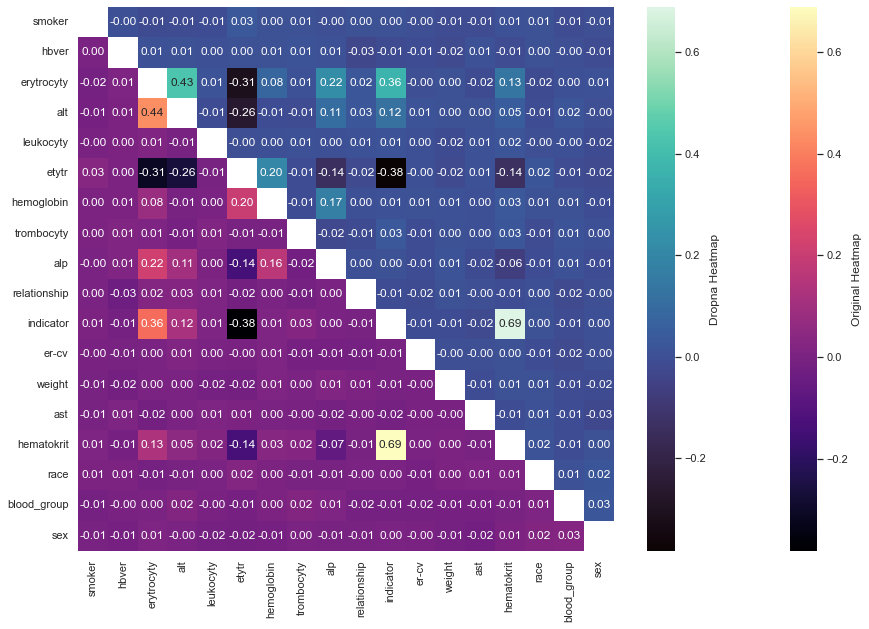

In [127]:
draw_heatmaps(merged_data, testing_merged_data, "Dropna Heatmap")

Predcházajúci úsudok vychádza z faktu, že pri odstránení príliš veľkého
počtu záznamov možno pozorovať badateľné zmeny na hodnotách korelácie.
To je ukázané na heatmape nižšie, kde sme vyhodili cca 97% riadkov.

In [128]:
testing_merged_data = merged_data.copy()
testing_merged_data = testing_merged_data.iloc[9500: , :]
testing_merged_data

,smoker,hbver,erytrocyty,alt,leukocyty,etytr,hemoglobin,ssn,name_x,trombocyty,...,ast,hematokrit,birthdate,address,race,current_location,blood_group,name_y,sex,residence
9500,0,4.67047,7.71964,1.16639,6.15913,4.17355,5.01398,191-63-0211,Sheryl Spencer,7.55134,...,44.77147,4.49259,1961-09-07,"89542 Angela Track Apt. 666 North Caitlin, AR...",4,"44.720321, 109.815982",1,Sheryl Spencer,0,"79787 Graham Lodge North Lauriehaven, MN 92204"
9501,1,4.57848,6.83339,0.83504,8.78283,5.30071,10.21540,725-64-8664,Lisa Horn,5.92439,...,37.61646,6.25236,2005-02-13,"82693 Michael Streets Suite 485 New Angelica,...",4,"-78.949966, -153.299385",6,Lisa Horn,0,"PSC 4489, Box 3213 APO AA 45955"
9502,0,6.20376,7.91596,1.36314,4.31320,4.78136,3.84701,725-64-8664,Lisa Horn,5.94045,...,32.86514,6.96250,2005-02-13,"82693 Michael Streets Suite 485 New Angelica,...",4,"-78.949966, -153.299385",6,Lisa Horn,0,"PSC 4489, Box 3213 APO AA 45955"
9503,1,6.05603,6.22482,0.50650,6.23878,4.35904,5.26282,725-64-8664,Lisa Horn,5.02012,...,47.53532,3.89128,2005-02-13,"82693 Michael Streets Suite 485 New Angelica,...",4,"-78.949966, -153.299385",6,Lisa Horn,0,"PSC 4489, Box 3213 APO AA 45955"
9504,1,4.32066,5.32316,0.39233,5.99186,6.50572,8.46840,028-70-9889,Michael Dickerson,5.65325,...,60.30219,7.54736,1957-02-08,Unit 3077 Box 5748 DPO AA 78375,4,"-16.995417, 43.762598",1,Michael Dickerson,1,"42084 Calderon Loaf Suite 651 Amyport, IA 11894"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9867,1,5.56044,7.88598,1.25698,6.44806,4.91910,5.42717,774-29-8698,Stacy Young,5.95845,...,56.75972,6.44557,1990-10-21,"5329 Green Circle West Janet, CO 94192",4,"89.633417, 92.757661",4,Stacy Young,0,"3827 Sullivan Manor Suite 578 Joehaven, ID 19902"
9868,0,6.02362,4.17512,0.51225,5.81361,5.63849,4.22984,774-29-8698,Stacy Young,5.86267,...,35.73155,5.78540,1990-10-21,"5329 Green Circle West Janet, CO 94192",4,"89.633417, 92.757661",4,Stacy Young,0,"3827 Sullivan Manor Suite 578 Joehaven, ID 19902"
9869,1,5.63262,5.74856,0.39597,7.16376,5.98503,7.57294,461-85-3049,Jason Santos MD,6.82832,...,51.29995,7.69555,1916-02-13,"4749 Ashley Mission New Natalie, ME 97315",4,"60.916302, -46.237649",6,Jason Santos MD,1,"782 Cross Glen Apt. 928 Melissaland, NE 05568"
9870,0,6.74328,7.27587,0.98270,4.87883,4.79271,6.66698,461-85-3049,Jason Santos MD,8.27491,...,27.24570,7.23617,1916-02-13,"4749 Ashley Mission New Natalie, ME 97315",4,"60.916302, -46.237649",6,Jason Santos MD,1,"782 Cross Glen Apt. 928 Melissaland, NE 05568"


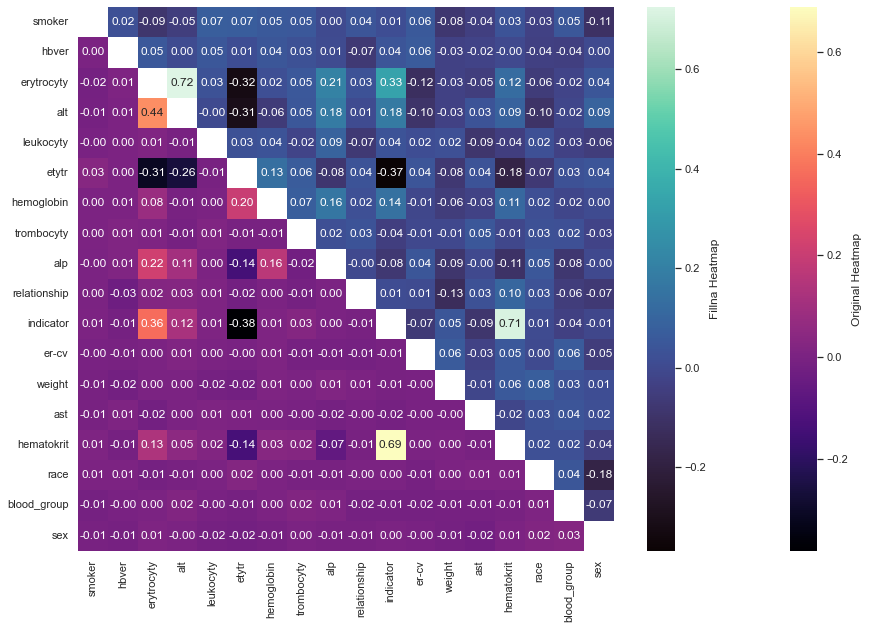

In [129]:
draw_heatmaps(merged_data, testing_merged_data, "Fillna Heatmap")

#### Riešenie nahradením priemernej hodnoty

Toto riešenie sme si zvolili aj v prvej fáze pri exploratívnej analýze dát.
Metódou fillna() sa nahradia všetky chýbajúce hodnoty priemerom pre každý atribút
zvlášť.

In [130]:
testing_merged_data = merged_data.copy()
testing_merged_data = testing_merged_data.fillna(testing_merged_data.mean())
testing_merged_data

C:\Users\PC\AppData\Local\Temp/ipykernel_11160/760269664.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  testing_merged_data = testing_merged_data.fillna(testing_merged_data.mean())
C:\Users\PC\AppData\Local\Temp/ipykernel_11160/760269664.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  testing_merged_data = testing_merged_data.fillna(testing_merged_data.mean())


,smoker,hbver,erytrocyty,alt,leukocyty,etytr,hemoglobin,ssn,name_x,trombocyty,...,ast,hematokrit,birthdate,address,race,current_location,blood_group,name_y,sex,residence
0,1,4.98718,8.89463,2.40520,5.75830,6.93712,4.54976,021-87-4523,Jeremy Tanner,6.23782,...,51.62366,3.34206,1923-05-10,"PSC 7581, Box 0898 APO AA 06225",0,"56.944534, 42.355764",4,Jeremy Tanner,1,"6041 Henry Inlet Harrishaven, KS 63783"
1,0,5.00648,7.27841,0.82563,5.54481,5.03221,7.70354,021-87-4523,Jeremy Tanner,7.42732,...,59.24840,6.85814,1923-05-10,"PSC 7581, Box 0898 APO AA 06225",0,"56.944534, 42.355764",4,Jeremy Tanner,1,"6041 Henry Inlet Harrishaven, KS 63783"
2,1,6.71966,7.01351,1.00377,5.66778,5.12799,7.73316,021-87-4523,Jeremy Tanner,5.42279,...,46.12997,6.78850,1923-05-10,"PSC 7581, Box 0898 APO AA 06225",0,"56.944534, 42.355764",4,Jeremy Tanner,1,"6041 Henry Inlet Harrishaven, KS 63783"
3,1,6.67732,4.21847,0.66072,6.29064,5.19990,4.10863,513-39-9691,Jocelyn Kelly,6.27100,...,61.59374,5.78180,1923-12-08,"175 Anita Pass Lake Davidchester, NC 93833",0,"84.160623, 21.685531",6,Jocelyn Kelly,0,"04425 Wilson Crescent Apt. 364 Lisashire, WY ..."
4,1,6.06875,5.68453,0.58818,3.90764,5.87943,6.89656,513-39-9691,Jocelyn Kelly,7.03818,...,64.44051,8.14506,1923-12-08,"175 Anita Pass Lake Davidchester, NC 93833",0,"84.160623, 21.685531",6,Jocelyn Kelly,0,"04425 Wilson Crescent Apt. 364 Lisashire, WY ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9867,1,5.56044,7.88598,1.25698,6.44806,4.91910,5.42717,774-29-8698,Stacy Young,5.95845,...,56.75972,6.44557,1990-10-21,"5329 Green Circle West Janet, CO 94192",4,"89.633417, 92.757661",4,Stacy Young,0,"3827 Sullivan Manor Suite 578 Joehaven, ID 19902"
9868,0,6.02362,4.17512,0.51225,5.81361,5.63849,4.22984,774-29-8698,Stacy Young,5.86267,...,35.73155,5.78540,1990-10-21,"5329 Green Circle West Janet, CO 94192",4,"89.633417, 92.757661",4,Stacy Young,0,"3827 Sullivan Manor Suite 578 Joehaven, ID 19902"
9869,1,5.63262,5.74856,0.39597,7.16376,5.98503,7.57294,461-85-3049,Jason Santos MD,6.82832,...,51.29995,7.69555,1916-02-13,"4749 Ashley Mission New Natalie, ME 97315",4,"60.916302, -46.237649",6,Jason Santos MD,1,"782 Cross Glen Apt. 928 Melissaland, NE 05568"
9870,0,6.74328,7.27587,0.98270,4.87883,4.79271,6.66698,461-85-3049,Jason Santos MD,8.27491,...,27.24570,7.23617,1916-02-13,"4749 Ashley Mission New Natalie, ME 97315",4,"60.916302, -46.237649",6,Jason Santos MD,1,"782 Cross Glen Apt. 928 Melissaland, NE 05568"


Opäť pozorujeme minimálne zmeny v hodnotách korelácie, no tento spôsob alteruje
hodnoty modusu a vytvára tzv. väčší spike uprostred distribúcie.

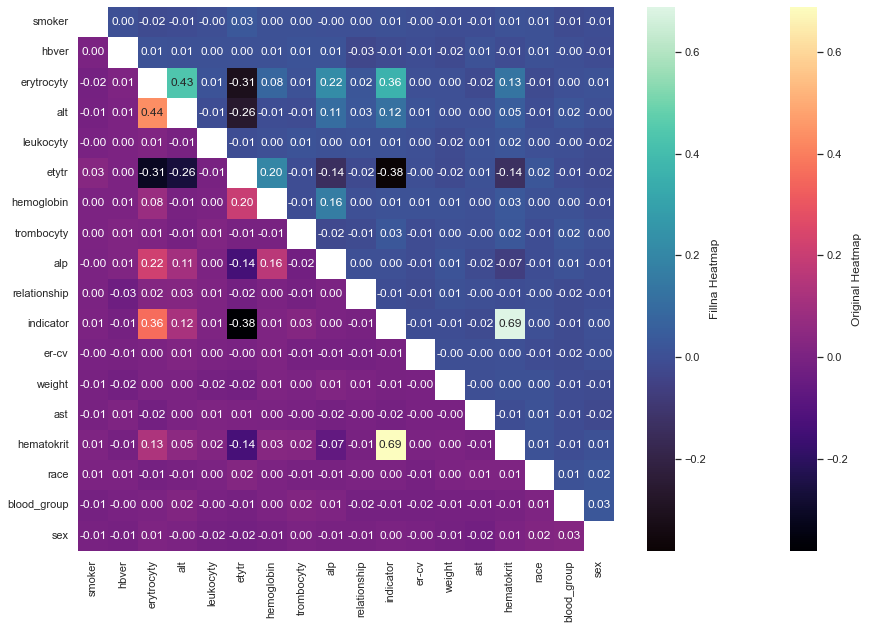

In [131]:
draw_heatmaps(merged_data, testing_merged_data, "Fillna Heatmap")

#### ZÁVER PRE CHÝBAJÚCE HODNOTY

Na záver sme sa rozhodli pre metódu odstránenia riadkov s chýbajúcimi hodnotami,
keďže si myslíme, že naše dáta budú čistejšie a menej skreslené ako pri nahradzovaní
priemerom.

In [132]:
merged_data.isna().sum()

smoker               0
hbver               30
erytrocyty          30
alt                 30
leukocyty           30
etytr               30
hemoglobin          30
ssn                  0
name_x               0
trombocyty          30
alp                 30
relationship         0
indicator            0
er-cv               30
weight               0
ast                 30
hematokrit          30
birthdate            0
address              0
race                 0
current_location     0
blood_group          0
name_y               0
sex                  0
residence            0
dtype: int64

In [133]:
merged_data.dropna(inplace=True)
merged_data.reset_index(drop = True, inplace = True)
merged_data

,smoker,hbver,erytrocyty,alt,leukocyty,etytr,hemoglobin,ssn,name_x,trombocyty,...,ast,hematokrit,birthdate,address,race,current_location,blood_group,name_y,sex,residence
0,1,4.98718,8.89463,2.40520,5.75830,6.93712,4.54976,021-87-4523,Jeremy Tanner,6.23782,...,51.62366,3.34206,1923-05-10,"PSC 7581, Box 0898 APO AA 06225",0,"56.944534, 42.355764",4,Jeremy Tanner,1,"6041 Henry Inlet Harrishaven, KS 63783"
1,0,5.00648,7.27841,0.82563,5.54481,5.03221,7.70354,021-87-4523,Jeremy Tanner,7.42732,...,59.24840,6.85814,1923-05-10,"PSC 7581, Box 0898 APO AA 06225",0,"56.944534, 42.355764",4,Jeremy Tanner,1,"6041 Henry Inlet Harrishaven, KS 63783"
2,1,6.71966,7.01351,1.00377,5.66778,5.12799,7.73316,021-87-4523,Jeremy Tanner,5.42279,...,46.12997,6.78850,1923-05-10,"PSC 7581, Box 0898 APO AA 06225",0,"56.944534, 42.355764",4,Jeremy Tanner,1,"6041 Henry Inlet Harrishaven, KS 63783"
3,1,6.67732,4.21847,0.66072,6.29064,5.19990,4.10863,513-39-9691,Jocelyn Kelly,6.27100,...,61.59374,5.78180,1923-12-08,"175 Anita Pass Lake Davidchester, NC 93833",0,"84.160623, 21.685531",6,Jocelyn Kelly,0,"04425 Wilson Crescent Apt. 364 Lisashire, WY ..."
4,1,6.06875,5.68453,0.58818,3.90764,5.87943,6.89656,513-39-9691,Jocelyn Kelly,7.03818,...,64.44051,8.14506,1923-12-08,"175 Anita Pass Lake Davidchester, NC 93833",0,"84.160623, 21.685531",6,Jocelyn Kelly,0,"04425 Wilson Crescent Apt. 364 Lisashire, WY ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9537,1,5.56044,7.88598,1.25698,6.44806,4.91910,5.42717,774-29-8698,Stacy Young,5.95845,...,56.75972,6.44557,1990-10-21,"5329 Green Circle West Janet, CO 94192",4,"89.633417, 92.757661",4,Stacy Young,0,"3827 Sullivan Manor Suite 578 Joehaven, ID 19902"
9538,0,6.02362,4.17512,0.51225,5.81361,5.63849,4.22984,774-29-8698,Stacy Young,5.86267,...,35.73155,5.78540,1990-10-21,"5329 Green Circle West Janet, CO 94192",4,"89.633417, 92.757661",4,Stacy Young,0,"3827 Sullivan Manor Suite 578 Joehaven, ID 19902"
9539,1,5.63262,5.74856,0.39597,7.16376,5.98503,7.57294,461-85-3049,Jason Santos MD,6.82832,...,51.29995,7.69555,1916-02-13,"4749 Ashley Mission New Natalie, ME 97315",4,"60.916302, -46.237649",6,Jason Santos MD,1,"782 Cross Glen Apt. 928 Melissaland, NE 05568"
9540,0,6.74328,7.27587,0.98270,4.87883,4.79271,6.66698,461-85-3049,Jason Santos MD,8.27491,...,27.24570,7.23617,1916-02-13,"4749 Ashley Mission New Natalie, ME 97315",4,"60.916302, -46.237649",6,Jason Santos MD,1,"782 Cross Glen Apt. 928 Melissaland, NE 05568"


In [134]:
merged_data.isna().sum()

smoker              0
hbver               0
erytrocyty          0
alt                 0
leukocyty           0
etytr               0
hemoglobin          0
ssn                 0
name_x              0
trombocyty          0
alp                 0
relationship        0
indicator           0
er-cv               0
weight              0
ast                 0
hematokrit          0
birthdate           0
address             0
race                0
current_location    0
blood_group         0
name_y              0
sex                 0
residence           0
dtype: int64

### Vychýlené hodnoty

Nasleduje testovanie rôznych prístupov pri úpravách vychýlených hodnôt.
Zo zadania sme si mali vybrať zopár rôznych stratégií, v našom prípade konkrétne:
* **odstránenie** riadkov s vychýlenými hodnotami
* **posun vychýlených hodnôt** o nejakú konštantu závislú od korelácie k atribútu

#### Riešenie odstránením riadkov

Na úvod si vypíšeme počet riadkov podľa atribútov,
v ktorých chýba aspoň jeden záznam.

In [135]:
merged_data.isna().sum()

smoker              0
hbver               0
erytrocyty          0
alt                 0
leukocyty           0
etytr               0
hemoglobin          0
ssn                 0
name_x              0
trombocyty          0
alp                 0
relationship        0
indicator           0
er-cv               0
weight              0
ast                 0
hematokrit          0
birthdate           0
address             0
race                0
current_location    0
blood_group         0
name_y              0
sex                 0
residence           0
dtype: int64

Pred samotným úkonom odstránenia si vytvoríme kópiu nášho aktuálneho datasetu, aby
sme doň nezasahovali a aby sme mohli na záver použiť len tú metódu, ktorú zhodnotíme
ako najvhodnejšiu.

In [136]:
testing_merged_data = merged_data.copy()
testing_merged_data

,smoker,hbver,erytrocyty,alt,leukocyty,etytr,hemoglobin,ssn,name_x,trombocyty,...,ast,hematokrit,birthdate,address,race,current_location,blood_group,name_y,sex,residence
0,1,4.98718,8.89463,2.40520,5.75830,6.93712,4.54976,021-87-4523,Jeremy Tanner,6.23782,...,51.62366,3.34206,1923-05-10,"PSC 7581, Box 0898 APO AA 06225",0,"56.944534, 42.355764",4,Jeremy Tanner,1,"6041 Henry Inlet Harrishaven, KS 63783"
1,0,5.00648,7.27841,0.82563,5.54481,5.03221,7.70354,021-87-4523,Jeremy Tanner,7.42732,...,59.24840,6.85814,1923-05-10,"PSC 7581, Box 0898 APO AA 06225",0,"56.944534, 42.355764",4,Jeremy Tanner,1,"6041 Henry Inlet Harrishaven, KS 63783"
2,1,6.71966,7.01351,1.00377,5.66778,5.12799,7.73316,021-87-4523,Jeremy Tanner,5.42279,...,46.12997,6.78850,1923-05-10,"PSC 7581, Box 0898 APO AA 06225",0,"56.944534, 42.355764",4,Jeremy Tanner,1,"6041 Henry Inlet Harrishaven, KS 63783"
3,1,6.67732,4.21847,0.66072,6.29064,5.19990,4.10863,513-39-9691,Jocelyn Kelly,6.27100,...,61.59374,5.78180,1923-12-08,"175 Anita Pass Lake Davidchester, NC 93833",0,"84.160623, 21.685531",6,Jocelyn Kelly,0,"04425 Wilson Crescent Apt. 364 Lisashire, WY ..."
4,1,6.06875,5.68453,0.58818,3.90764,5.87943,6.89656,513-39-9691,Jocelyn Kelly,7.03818,...,64.44051,8.14506,1923-12-08,"175 Anita Pass Lake Davidchester, NC 93833",0,"84.160623, 21.685531",6,Jocelyn Kelly,0,"04425 Wilson Crescent Apt. 364 Lisashire, WY ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9537,1,5.56044,7.88598,1.25698,6.44806,4.91910,5.42717,774-29-8698,Stacy Young,5.95845,...,56.75972,6.44557,1990-10-21,"5329 Green Circle West Janet, CO 94192",4,"89.633417, 92.757661",4,Stacy Young,0,"3827 Sullivan Manor Suite 578 Joehaven, ID 19902"
9538,0,6.02362,4.17512,0.51225,5.81361,5.63849,4.22984,774-29-8698,Stacy Young,5.86267,...,35.73155,5.78540,1990-10-21,"5329 Green Circle West Janet, CO 94192",4,"89.633417, 92.757661",4,Stacy Young,0,"3827 Sullivan Manor Suite 578 Joehaven, ID 19902"
9539,1,5.63262,5.74856,0.39597,7.16376,5.98503,7.57294,461-85-3049,Jason Santos MD,6.82832,...,51.29995,7.69555,1916-02-13,"4749 Ashley Mission New Natalie, ME 97315",4,"60.916302, -46.237649",6,Jason Santos MD,1,"782 Cross Glen Apt. 928 Melissaland, NE 05568"
9540,0,6.74328,7.27587,0.98270,4.87883,4.79271,6.66698,461-85-3049,Jason Santos MD,8.27491,...,27.24570,7.23617,1916-02-13,"4749 Ashley Mission New Natalie, ME 97315",4,"60.916302, -46.237649",6,Jason Santos MD,1,"782 Cross Glen Apt. 928 Melissaland, NE 05568"


Na určenie vychýlených hodnôt sme použili obdobnú verziu funkcie z návrhu v 1. fáze,
ktorá určuje vychýlené hodnoty výpočtom interquartile range.

In [137]:
def iqr_calc(dataframe, column, boxplot=True):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    Lower_Whisker = Q1-1.5*IQR if Q1-1.5*IQR > 0 else 0
    Upper_Whisker = Q3+1.5*IQR

    if boxplot:
        sns.boxplot(x=dataframe[column])

    return Lower_Whisker, Upper_Whisker

V tomto kroku, sme označovali vychýlené hodnoty riadkov z dataframu pomocou funkcie na výpočet
InterQuartile Range(IQR), pričom hodnoty,
ktoré boli pod lower whisker alebo nad upper whisker boli označené ako NaN.

In [138]:
for column in testing_merged_data.describe().columns:
    lower, upper = iqr_calc(testing_merged_data, column, False)
    outliers = []
    for row in testing_merged_data[column]:
        if row < lower or row > upper:
            outliers.append(np.nan)
        else:
            outliers.append(row)
    testing_merged_data[column] = outliers


In [139]:
testing_merged_data

,smoker,hbver,erytrocyty,alt,leukocyty,etytr,hemoglobin,ssn,name_x,trombocyty,...,ast,hematokrit,birthdate,address,race,current_location,blood_group,name_y,sex,residence
0,1,4.98718,8.89463,NaN,5.75830,6.93712,4.54976,021-87-4523,Jeremy Tanner,6.23782,...,51.62366,3.34206,1923-05-10,"PSC 7581, Box 0898 APO AA 06225",0,"56.944534, 42.355764",4,Jeremy Tanner,1,"6041 Henry Inlet Harrishaven, KS 63783"
1,0,5.00648,7.27841,0.82563,5.54481,5.03221,7.70354,021-87-4523,Jeremy Tanner,7.42732,...,59.24840,6.85814,1923-05-10,"PSC 7581, Box 0898 APO AA 06225",0,"56.944534, 42.355764",4,Jeremy Tanner,1,"6041 Henry Inlet Harrishaven, KS 63783"
2,1,6.71966,7.01351,1.00377,5.66778,5.12799,7.73316,021-87-4523,Jeremy Tanner,5.42279,...,46.12997,6.78850,1923-05-10,"PSC 7581, Box 0898 APO AA 06225",0,"56.944534, 42.355764",4,Jeremy Tanner,1,"6041 Henry Inlet Harrishaven, KS 63783"
3,1,6.67732,4.21847,0.66072,6.29064,5.19990,4.10863,513-39-9691,Jocelyn Kelly,6.27100,...,61.59374,5.78180,1923-12-08,"175 Anita Pass Lake Davidchester, NC 93833",0,"84.160623, 21.685531",6,Jocelyn Kelly,0,"04425 Wilson Crescent Apt. 364 Lisashire, WY ..."
4,1,6.06875,5.68453,0.58818,3.90764,5.87943,6.89656,513-39-9691,Jocelyn Kelly,7.03818,...,64.44051,8.14506,1923-12-08,"175 Anita Pass Lake Davidchester, NC 93833",0,"84.160623, 21.685531",6,Jocelyn Kelly,0,"04425 Wilson Crescent Apt. 364 Lisashire, WY ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9537,1,5.56044,7.88598,1.25698,6.44806,4.91910,5.42717,774-29-8698,Stacy Young,5.95845,...,56.75972,6.44557,1990-10-21,"5329 Green Circle West Janet, CO 94192",4,"89.633417, 92.757661",4,Stacy Young,0,"3827 Sullivan Manor Suite 578 Joehaven, ID 19902"
9538,0,6.02362,4.17512,0.51225,5.81361,5.63849,4.22984,774-29-8698,Stacy Young,5.86267,...,35.73155,5.78540,1990-10-21,"5329 Green Circle West Janet, CO 94192",4,"89.633417, 92.757661",4,Stacy Young,0,"3827 Sullivan Manor Suite 578 Joehaven, ID 19902"
9539,1,5.63262,5.74856,0.39597,7.16376,5.98503,7.57294,461-85-3049,Jason Santos MD,6.82832,...,51.29995,7.69555,1916-02-13,"4749 Ashley Mission New Natalie, ME 97315",4,"60.916302, -46.237649",6,Jason Santos MD,1,"782 Cross Glen Apt. 928 Melissaland, NE 05568"
9540,0,6.74328,7.27587,0.98270,4.87883,4.79271,6.66698,461-85-3049,Jason Santos MD,8.27491,...,27.24570,7.23617,1916-02-13,"4749 Ashley Mission New Natalie, ME 97315",4,"60.916302, -46.237649",6,Jason Santos MD,1,"782 Cross Glen Apt. 928 Melissaland, NE 05568"


Odstránenie všetkých NaN hodnôt, ktoré sme si v predošlom kroku uložili do dataframu a následne sme záznamy
preindexovali.

In [140]:
testing_merged_data.dropna(inplace = True)
testing_merged_data.reset_index(drop = True, inplace = True)
testing_merged_data

,smoker,hbver,erytrocyty,alt,leukocyty,etytr,hemoglobin,ssn,name_x,trombocyty,...,ast,hematokrit,birthdate,address,race,current_location,blood_group,name_y,sex,residence
0,0,5.00648,7.27841,0.82563,5.54481,5.03221,7.70354,021-87-4523,Jeremy Tanner,7.42732,...,59.24840,6.85814,1923-05-10,"PSC 7581, Box 0898 APO AA 06225",0,"56.944534, 42.355764",4,Jeremy Tanner,1,"6041 Henry Inlet Harrishaven, KS 63783"
1,1,6.71966,7.01351,1.00377,5.66778,5.12799,7.73316,021-87-4523,Jeremy Tanner,5.42279,...,46.12997,6.78850,1923-05-10,"PSC 7581, Box 0898 APO AA 06225",0,"56.944534, 42.355764",4,Jeremy Tanner,1,"6041 Henry Inlet Harrishaven, KS 63783"
2,1,6.67732,4.21847,0.66072,6.29064,5.19990,4.10863,513-39-9691,Jocelyn Kelly,6.27100,...,61.59374,5.78180,1923-12-08,"175 Anita Pass Lake Davidchester, NC 93833",0,"84.160623, 21.685531",6,Jocelyn Kelly,0,"04425 Wilson Crescent Apt. 364 Lisashire, WY ..."
3,1,6.06875,5.68453,0.58818,3.90764,5.87943,6.89656,513-39-9691,Jocelyn Kelly,7.03818,...,64.44051,8.14506,1923-12-08,"175 Anita Pass Lake Davidchester, NC 93833",0,"84.160623, 21.685531",6,Jocelyn Kelly,0,"04425 Wilson Crescent Apt. 364 Lisashire, WY ..."
4,0,6.51444,7.94461,1.28337,5.83567,6.88758,6.45793,881-46-4810,Crystal Kelley,6.02783,...,47.96329,4.55230,1939-04-25,"9086 Danny Cliff Mitchellport, NM 64440",1,"75.7681605, -60.890199",2,Crystal Kelley,0,Unit 6525 Box 9751 DPO AP 62291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7725,1,5.56044,7.88598,1.25698,6.44806,4.91910,5.42717,774-29-8698,Stacy Young,5.95845,...,56.75972,6.44557,1990-10-21,"5329 Green Circle West Janet, CO 94192",4,"89.633417, 92.757661",4,Stacy Young,0,"3827 Sullivan Manor Suite 578 Joehaven, ID 19902"
7726,0,6.02362,4.17512,0.51225,5.81361,5.63849,4.22984,774-29-8698,Stacy Young,5.86267,...,35.73155,5.78540,1990-10-21,"5329 Green Circle West Janet, CO 94192",4,"89.633417, 92.757661",4,Stacy Young,0,"3827 Sullivan Manor Suite 578 Joehaven, ID 19902"
7727,1,5.63262,5.74856,0.39597,7.16376,5.98503,7.57294,461-85-3049,Jason Santos MD,6.82832,...,51.29995,7.69555,1916-02-13,"4749 Ashley Mission New Natalie, ME 97315",4,"60.916302, -46.237649",6,Jason Santos MD,1,"782 Cross Glen Apt. 928 Melissaland, NE 05568"
7728,0,6.74328,7.27587,0.98270,4.87883,4.79271,6.66698,461-85-3049,Jason Santos MD,8.27491,...,27.24570,7.23617,1916-02-13,"4749 Ashley Mission New Natalie, ME 97315",4,"60.916302, -46.237649",6,Jason Santos MD,1,"782 Cross Glen Apt. 928 Melissaland, NE 05568"


#### Riešenie nahradením vychýlených hodnôt riadkov

Detekovanie vychýlených hodnôt je identické ako pri riešení vyššie, preto sme na to
použili rovnakú funkciu.

Vytvorenie kópie z pôvodného datasetu:

In [158]:
testing_merged_data = merged_data.copy()
testing_merged_data

,smoker,hbver,erytrocyty,alt,leukocyty,etytr,hemoglobin,ssn,name_x,trombocyty,...,ast,hematokrit,birthdate,address,race,current_location,blood_group,name_y,sex,residence
0,1,4.98718,8.89463,2.40520,5.75830,6.93712,4.54976,021-87-4523,Jeremy Tanner,6.23782,...,51.62366,3.34206,1923-05-10,"PSC 7581, Box 0898 APO AA 06225",0,"56.944534, 42.355764",4,Jeremy Tanner,1,"6041 Henry Inlet Harrishaven, KS 63783"
1,0,5.00648,7.27841,0.82563,5.54481,5.03221,7.70354,021-87-4523,Jeremy Tanner,7.42732,...,59.24840,6.85814,1923-05-10,"PSC 7581, Box 0898 APO AA 06225",0,"56.944534, 42.355764",4,Jeremy Tanner,1,"6041 Henry Inlet Harrishaven, KS 63783"
2,1,6.71966,7.01351,1.00377,5.66778,5.12799,7.73316,021-87-4523,Jeremy Tanner,5.42279,...,46.12997,6.78850,1923-05-10,"PSC 7581, Box 0898 APO AA 06225",0,"56.944534, 42.355764",4,Jeremy Tanner,1,"6041 Henry Inlet Harrishaven, KS 63783"
3,1,6.67732,4.21847,0.66072,6.29064,5.19990,4.10863,513-39-9691,Jocelyn Kelly,6.27100,...,61.59374,5.78180,1923-12-08,"175 Anita Pass Lake Davidchester, NC 93833",0,"84.160623, 21.685531",6,Jocelyn Kelly,0,"04425 Wilson Crescent Apt. 364 Lisashire, WY ..."
4,1,6.06875,5.68453,0.58818,3.90764,5.87943,6.89656,513-39-9691,Jocelyn Kelly,7.03818,...,64.44051,8.14506,1923-12-08,"175 Anita Pass Lake Davidchester, NC 93833",0,"84.160623, 21.685531",6,Jocelyn Kelly,0,"04425 Wilson Crescent Apt. 364 Lisashire, WY ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9537,1,5.56044,7.88598,1.25698,6.44806,4.91910,5.42717,774-29-8698,Stacy Young,5.95845,...,56.75972,6.44557,1990-10-21,"5329 Green Circle West Janet, CO 94192",4,"89.633417, 92.757661",4,Stacy Young,0,"3827 Sullivan Manor Suite 578 Joehaven, ID 19902"
9538,0,6.02362,4.17512,0.51225,5.81361,5.63849,4.22984,774-29-8698,Stacy Young,5.86267,...,35.73155,5.78540,1990-10-21,"5329 Green Circle West Janet, CO 94192",4,"89.633417, 92.757661",4,Stacy Young,0,"3827 Sullivan Manor Suite 578 Joehaven, ID 19902"
9539,1,5.63262,5.74856,0.39597,7.16376,5.98503,7.57294,461-85-3049,Jason Santos MD,6.82832,...,51.29995,7.69555,1916-02-13,"4749 Ashley Mission New Natalie, ME 97315",4,"60.916302, -46.237649",6,Jason Santos MD,1,"782 Cross Glen Apt. 928 Melissaland, NE 05568"
9540,0,6.74328,7.27587,0.98270,4.87883,4.79271,6.66698,461-85-3049,Jason Santos MD,8.27491,...,27.24570,7.23617,1916-02-13,"4749 Ashley Mission New Natalie, ME 97315",4,"60.916302, -46.237649",6,Jason Santos MD,1,"782 Cross Glen Apt. 928 Melissaland, NE 05568"


Podobná verzia cyklenia cez dáta, v ktorej sa upravuje hodnota v bunkách podľa hraničných
hodnôt vrátených z funkcie iqr_calc(). Tým je zabezpečená izolovanosť pre každý
atribút.

In [159]:
for column in testing_merged_data.describe().columns:
    lower, upper = iqr_calc(testing_merged_data, column, False)
    outliers = []
    for row in testing_merged_data[column]:
        if row < lower:
            outliers.append(row + lower)
        elif row > upper:
            outliers.append(row - lower)
        else:
            outliers.append(row)
    testing_merged_data[column] = outliers

In [160]:
testing_merged_data

,smoker,hbver,erytrocyty,alt,leukocyty,etytr,hemoglobin,ssn,name_x,trombocyty,...,ast,hematokrit,birthdate,address,race,current_location,blood_group,name_y,sex,residence
0,1,4.98718,8.89463,2.40520,5.75830,6.93712,4.54976,021-87-4523,Jeremy Tanner,6.23782,...,51.62366,3.34206,1923-05-10,"PSC 7581, Box 0898 APO AA 06225",0,"56.944534, 42.355764",4,Jeremy Tanner,1,"6041 Henry Inlet Harrishaven, KS 63783"
1,0,5.00648,7.27841,0.82563,5.54481,5.03221,7.70354,021-87-4523,Jeremy Tanner,7.42732,...,59.24840,6.85814,1923-05-10,"PSC 7581, Box 0898 APO AA 06225",0,"56.944534, 42.355764",4,Jeremy Tanner,1,"6041 Henry Inlet Harrishaven, KS 63783"
2,1,6.71966,7.01351,1.00377,5.66778,5.12799,7.73316,021-87-4523,Jeremy Tanner,5.42279,...,46.12997,6.78850,1923-05-10,"PSC 7581, Box 0898 APO AA 06225",0,"56.944534, 42.355764",4,Jeremy Tanner,1,"6041 Henry Inlet Harrishaven, KS 63783"
3,1,6.67732,4.21847,0.66072,6.29064,5.19990,4.10863,513-39-9691,Jocelyn Kelly,6.27100,...,61.59374,5.78180,1923-12-08,"175 Anita Pass Lake Davidchester, NC 93833",0,"84.160623, 21.685531",6,Jocelyn Kelly,0,"04425 Wilson Crescent Apt. 364 Lisashire, WY ..."
4,1,6.06875,5.68453,0.58818,3.90764,5.87943,6.89656,513-39-9691,Jocelyn Kelly,7.03818,...,64.44051,8.14506,1923-12-08,"175 Anita Pass Lake Davidchester, NC 93833",0,"84.160623, 21.685531",6,Jocelyn Kelly,0,"04425 Wilson Crescent Apt. 364 Lisashire, WY ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9537,1,5.56044,7.88598,1.25698,6.44806,4.91910,5.42717,774-29-8698,Stacy Young,5.95845,...,56.75972,6.44557,1990-10-21,"5329 Green Circle West Janet, CO 94192",4,"89.633417, 92.757661",4,Stacy Young,0,"3827 Sullivan Manor Suite 578 Joehaven, ID 19902"
9538,0,6.02362,4.17512,0.51225,5.81361,5.63849,4.22984,774-29-8698,Stacy Young,5.86267,...,35.73155,5.78540,1990-10-21,"5329 Green Circle West Janet, CO 94192",4,"89.633417, 92.757661",4,Stacy Young,0,"3827 Sullivan Manor Suite 578 Joehaven, ID 19902"
9539,1,5.63262,5.74856,0.39597,7.16376,5.98503,7.57294,461-85-3049,Jason Santos MD,6.82832,...,51.29995,7.69555,1916-02-13,"4749 Ashley Mission New Natalie, ME 97315",4,"60.916302, -46.237649",6,Jason Santos MD,1,"782 Cross Glen Apt. 928 Melissaland, NE 05568"
9540,0,6.74328,7.27587,0.98270,4.87883,4.79271,6.66698,461-85-3049,Jason Santos MD,8.27491,...,27.24570,7.23617,1916-02-13,"4749 Ashley Mission New Natalie, ME 97315",4,"60.916302, -46.237649",6,Jason Santos MD,1,"782 Cross Glen Apt. 928 Melissaland, NE 05568"


Popis, čo je vidno na grafoch nižšie.
Predtým sú ešte zadefinované funkcie, ktoré vykreslia všetky histploty
pre vybrané atribúty, ktoré sú vo vybraných datasetoch.

In [161]:
def display_two_histplots(firstdataset, seconddataset, attr):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8))
    sns.histplot(data=firstdataset, x=attr, ax=ax[0], bins=24, kde=True)
    sns.histplot(data=seconddataset, x=attr, ax=ax[1], bins=24, kde=True)

In [162]:
def display_numerical_histplots(firstdataset, seconddataset, series):
    for attr in series:
        display_two_histplots(firstdataset, seconddataset, attr)

V bunke nižšie sú vyfiltrované atribúty, ktoré obsahujú dátový typ float, čím zaručíme,
že kategorické dáta a stringy budú odignorované, keďže na tých upravovať nechceme.

In [163]:
float_columns = testing_merged_data.select_dtypes(include=[np.float]).describe().columns
float_columns

C:\Users\PC\AppData\Local\Temp/ipykernel_11160/3502030894.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  float_columns = testing_merged_data.select_dtypes(include=[np.float]).describe().columns


Index(['hbver', 'erytrocyty', 'alt', 'leukocyty', 'etytr', 'hemoglobin',
       'trombocyty', 'alp', 'indicator', 'er-cv', 'weight', 'ast',
       'hematokrit'],
      dtype='object')

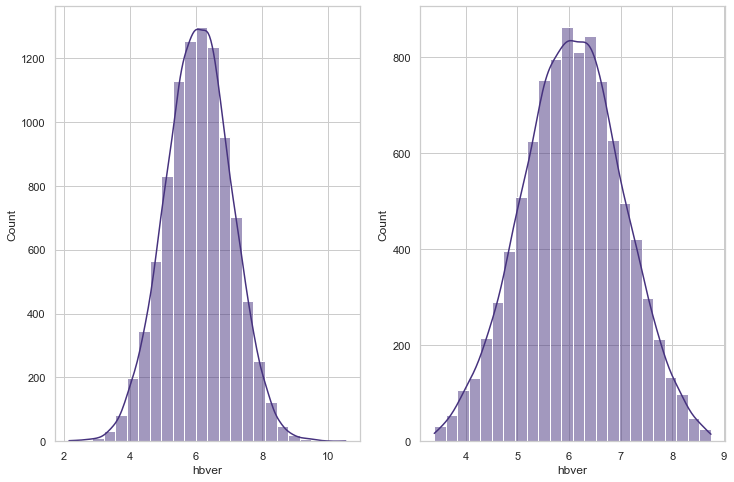

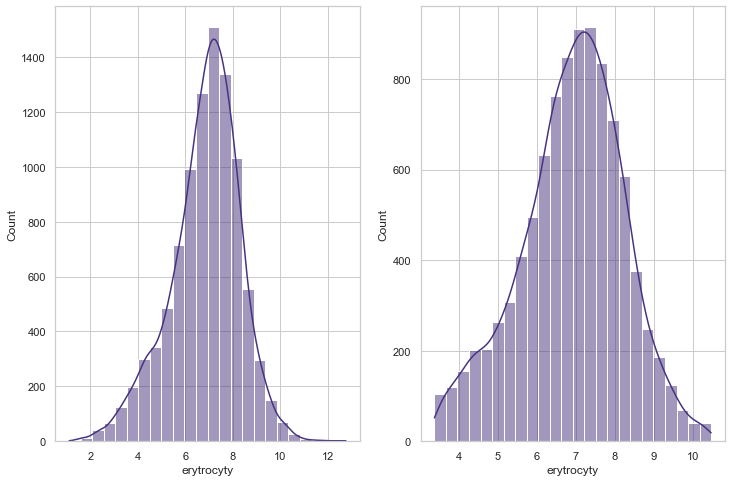

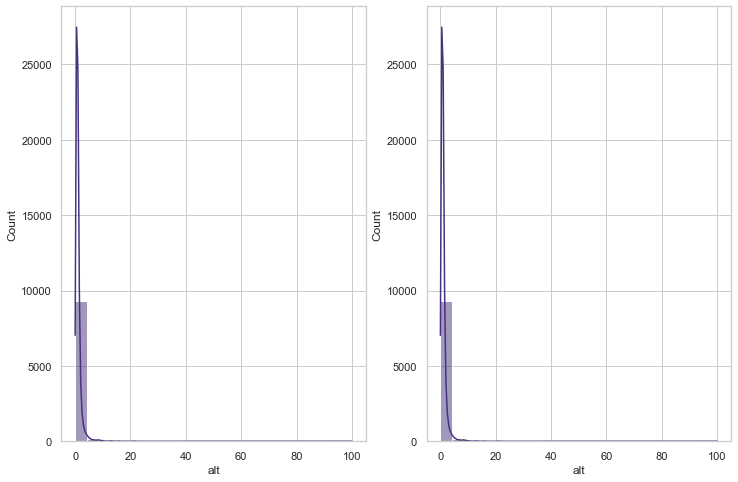

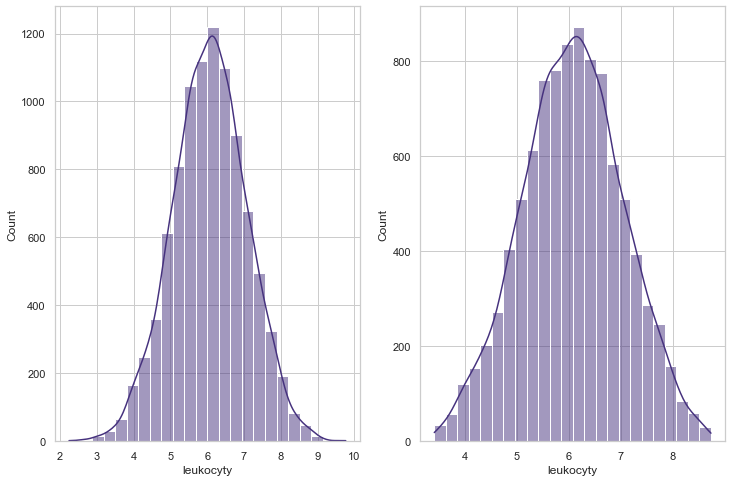

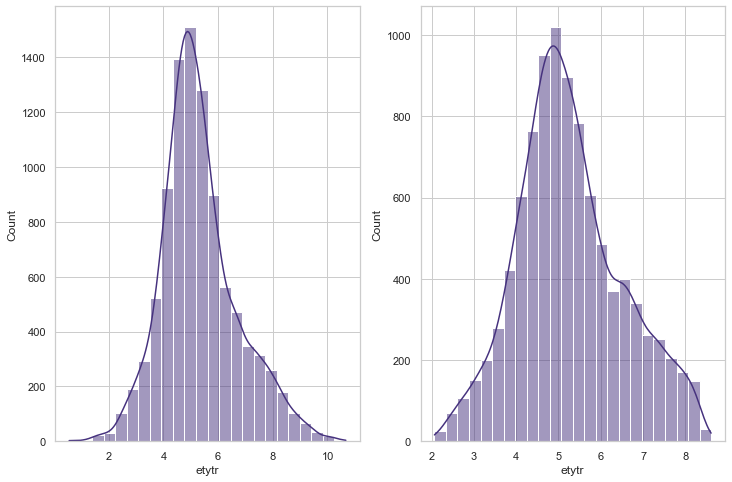

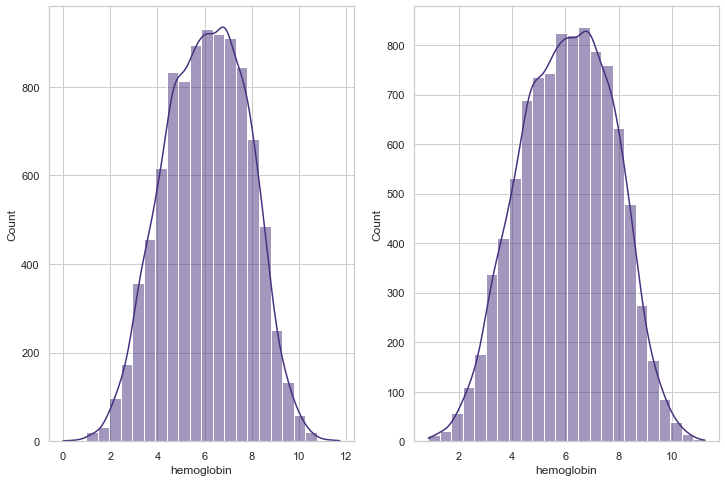

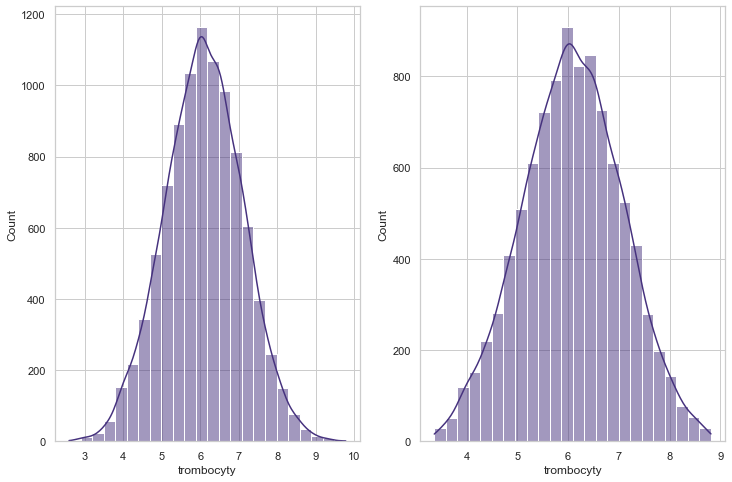

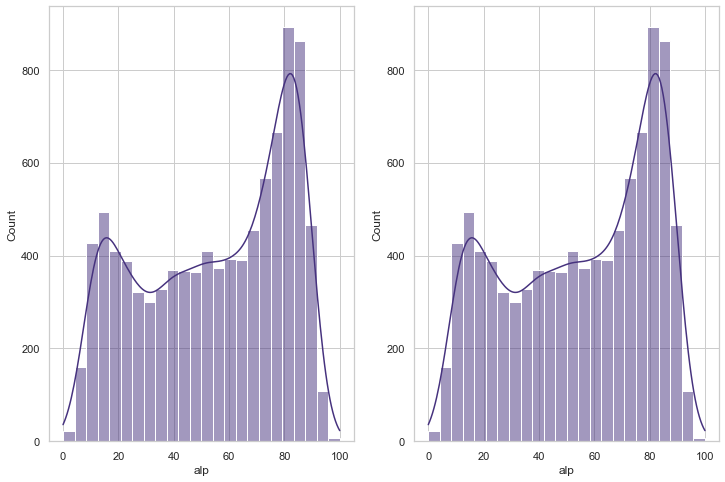

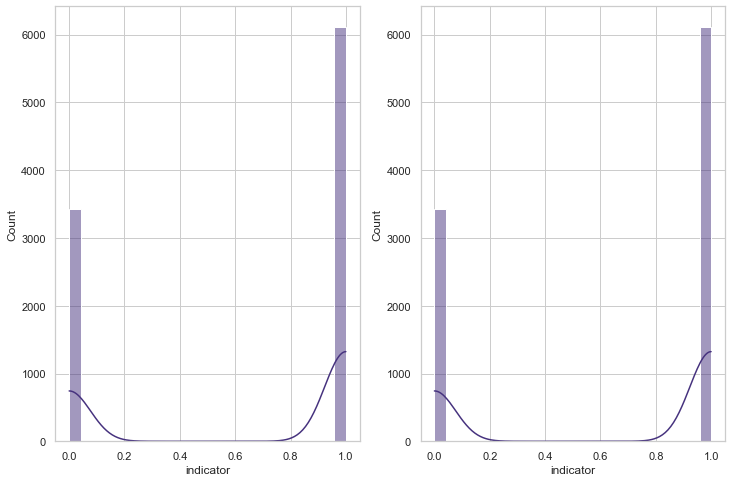

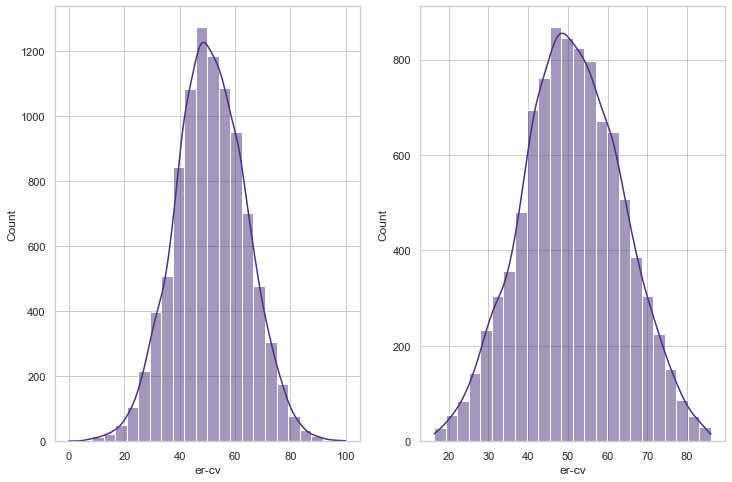

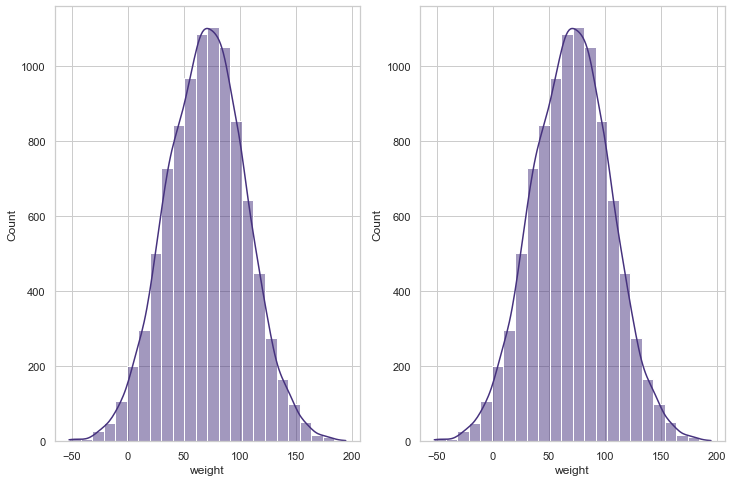

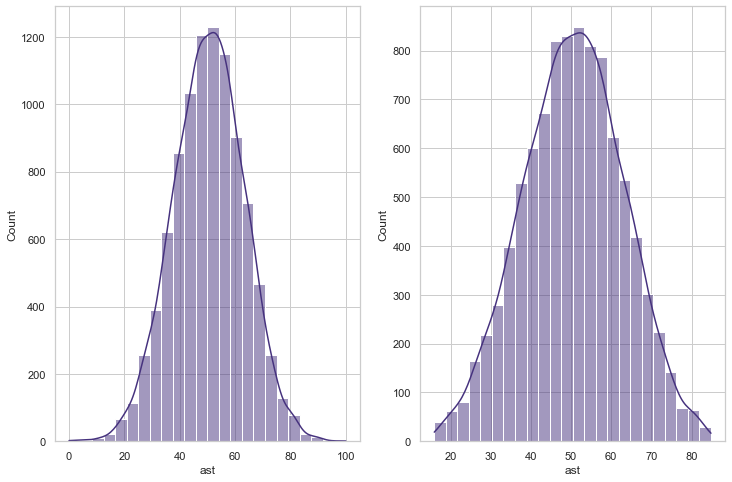

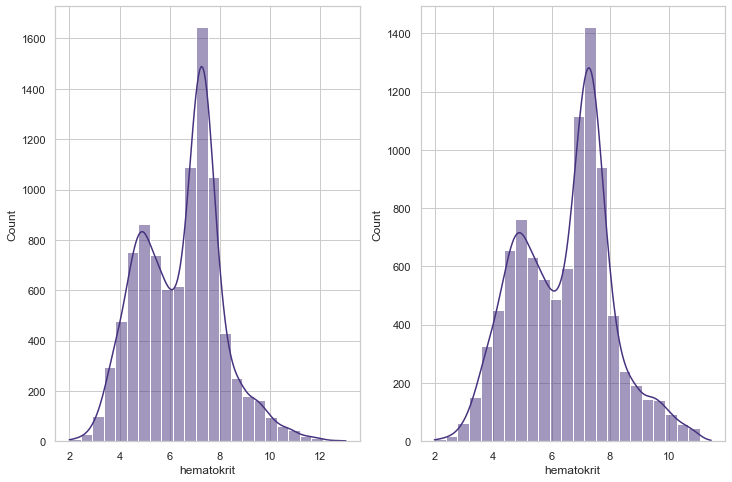

In [164]:
display_numerical_histplots(merged_data, testing_merged_data, float_columns)

### ZÁVER PRE VYCHÝLENÉ HODNOTY

Z analýzy dvoch rôznych riešení pre výchylené hodnoty sme zistili,
že odstraňovanie "outlierov" má za následok výrazné zredukovanie
počtu riadkov v datasete o viac než 20%. Tento prístup sa nám nepáči
nie len z toho dôvodu, že prichádzame o veľké množstvo dát, ale aj preto,
že vychýlené hodnoty sú do istej miery potrebné, keďže práve na takých
hodnotách sa môže náš machine-learning učiť najlepšie.

Preto sme sa rozhodli na našich dátach vykonať úpravu vychýlených hodnôt
nahradením adekvátnejšej hodnoty, ktorá nie je až tak vychýlená.

Z analýzy vyššie sme zistili, že tento prístup funguje na všetkých
atribútoch okrem:

* alt
* weight

Tie ošetríme individuálne.

In [212]:
testing_merged_data = merged_data.copy()
testing_merged_data

,smoker,hbver,erytrocyty,alt,leukocyty,etytr,hemoglobin,trombocyty,alp,relationship,indicator,er-cv,weight,ast,hematokrit,race,blood_group,sex
0,1,4.98718,8.89463,2.111448,5.75830,6.93712,4.54976,6.23782,45.93625,4,0,55.43592,67.600407,51.62366,3.34206,0,4,1
1,0,5.00648,7.27841,0.825630,5.54481,5.03221,7.70354,7.42732,50.72980,1,1,62.99586,146.161350,59.24840,6.85814,0,4,1
2,1,6.71966,7.01351,1.003770,5.66778,5.12799,7.73316,5.42279,54.52797,1,1,61.66052,90.390840,46.12997,6.78850,0,4,1
3,1,6.67732,4.21847,0.660720,6.29064,5.19990,4.10863,6.27100,20.30249,4,0,45.34617,81.565330,61.59374,5.78180,0,6,0
4,1,6.06875,5.68453,0.588180,3.90764,5.87943,6.89656,7.03818,84.46671,4,1,45.02880,93.784280,64.44051,8.14506,0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9537,1,5.56044,7.88598,1.256980,6.44806,4.91910,5.42717,5.95845,71.09634,4,1,62.05093,96.062210,56.75972,6.44557,4,4,0
9538,0,6.02362,4.17512,0.512250,5.81361,5.63849,4.22984,5.86267,33.94788,3,0,61.71716,43.582210,35.73155,5.78540,4,4,0
9539,1,5.63262,5.74856,0.395970,7.16376,5.98503,7.57294,6.82832,54.70713,5,1,82.43138,18.298130,51.29995,7.69555,4,6,1
9540,0,6.74328,7.27587,0.982700,4.87883,4.79271,6.66698,8.27491,81.65971,2,1,62.57684,113.125630,27.24570,7.23617,4,6,1


Zmenili sme dátový typ indikátora na **int**, keďže tieto hodnoty nechceme meniť v ďaľších krokoch.

In [213]:
testing_merged_data["indicator"] = testing_merged_data["indicator"].astype(int)

testing_merged_data


,smoker,hbver,erytrocyty,alt,leukocyty,etytr,hemoglobin,trombocyty,alp,relationship,indicator,er-cv,weight,ast,hematokrit,race,blood_group,sex
0,1,4.98718,8.89463,2.111448,5.75830,6.93712,4.54976,6.23782,45.93625,4,0,55.43592,67.600407,51.62366,3.34206,0,4,1
1,0,5.00648,7.27841,0.825630,5.54481,5.03221,7.70354,7.42732,50.72980,1,1,62.99586,146.161350,59.24840,6.85814,0,4,1
2,1,6.71966,7.01351,1.003770,5.66778,5.12799,7.73316,5.42279,54.52797,1,1,61.66052,90.390840,46.12997,6.78850,0,4,1
3,1,6.67732,4.21847,0.660720,6.29064,5.19990,4.10863,6.27100,20.30249,4,0,45.34617,81.565330,61.59374,5.78180,0,6,0
4,1,6.06875,5.68453,0.588180,3.90764,5.87943,6.89656,7.03818,84.46671,4,1,45.02880,93.784280,64.44051,8.14506,0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9537,1,5.56044,7.88598,1.256980,6.44806,4.91910,5.42717,5.95845,71.09634,4,1,62.05093,96.062210,56.75972,6.44557,4,4,0
9538,0,6.02362,4.17512,0.512250,5.81361,5.63849,4.22984,5.86267,33.94788,3,0,61.71716,43.582210,35.73155,5.78540,4,4,0
9539,1,5.63262,5.74856,0.395970,7.16376,5.98503,7.57294,6.82832,54.70713,5,1,82.43138,18.298130,51.29995,7.69555,4,6,1
9540,0,6.74328,7.27587,0.982700,4.87883,4.79271,6.66698,8.27491,81.65971,2,1,62.57684,113.125630,27.24570,7.23617,4,6,1


Vyberali sme iba hodnoty typu **float**, pretože hodnoty typu **int** značia rasu, krvnú skupinu, spoločenský stav,
pohlavie, fajčiara alebo indikator. Tieto hodnoty sú unikátne a preto ich nemožno posúvať.


In [214]:

target_columns = testing_merged_data.select_dtypes(include=[np.float]).describe().columns
target_columns = target_columns.drop("weight")
target_columns = target_columns.drop("alt")
target_columns

C:\Users\PC\AppData\Local\Temp/ipykernel_11160/1813818425.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  target_columns = testing_merged_data.select_dtypes(include=[np.float]).describe().columns


Index(['hbver', 'erytrocyty', 'leukocyty', 'etytr', 'hemoglobin', 'trombocyty',
       'alp', 'er-cv', 'ast', 'hematokrit'],
      dtype='object')

In [215]:
for column in target_columns:
    lower, upper = iqr_calc(testing_merged_data, column, False)
    outliers = []
    for row in testing_merged_data[column]:
        if row < lower:
            outliers.append(row + lower)
        elif row > upper:
            outliers.append(row - lower)
        else:
            outliers.append(row)
    testing_merged_data[column] = outliers

In [216]:

for x in testing_merged_data.index:
    if testing_merged_data.loc[x, "weight"] < 5:
        testing_merged_data["weight"][x] = testing_merged_data["weight"][x] + testing_merged_data["weight"].mean()


In [217]:
lower, upper = iqr_calc(testing_merged_data, "alt", False)

for x in testing_merged_data.index:
    if testing_merged_data.loc[x, "alt"] > upper:
        testing_merged_data["alt"][x] = (testing_merged_data["alt"][x]/(upper*25)) + upper


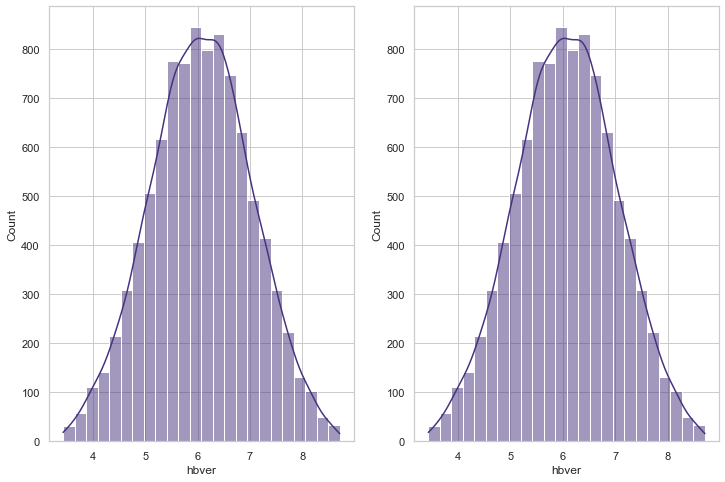

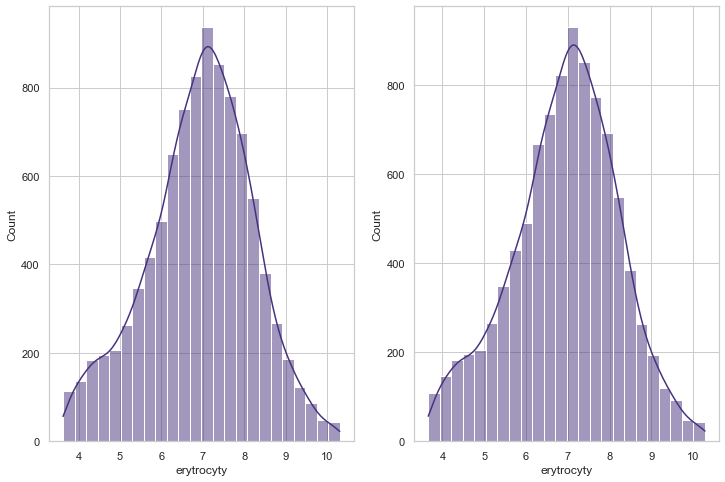

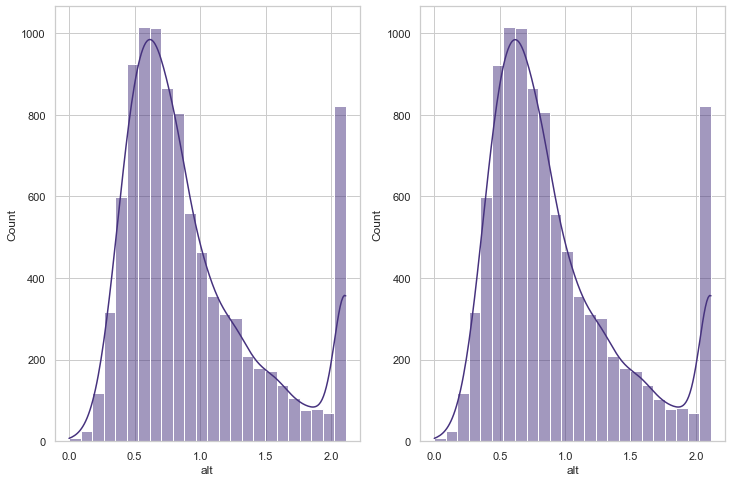

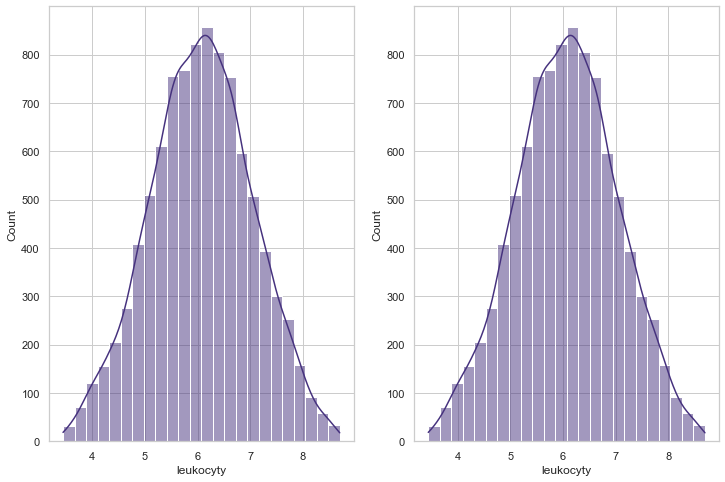

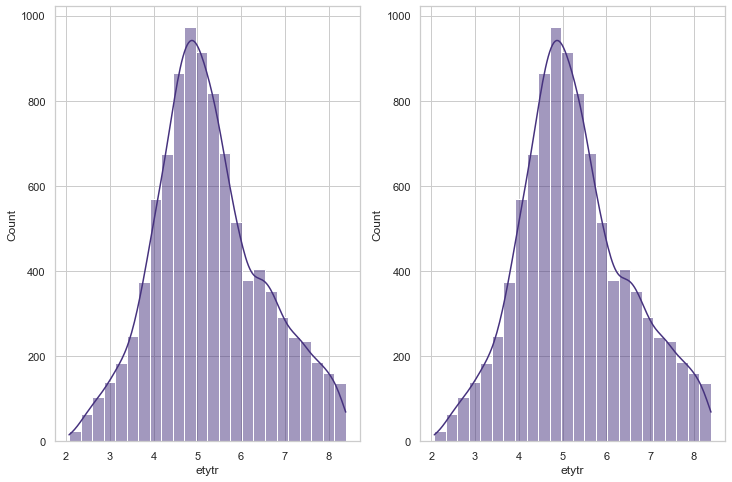

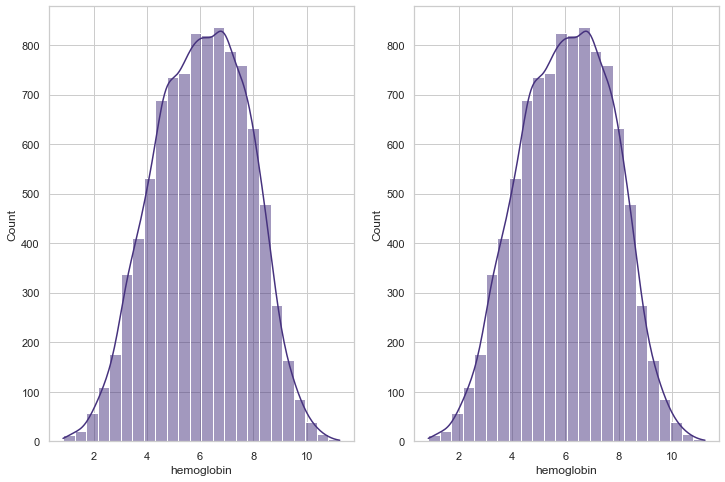

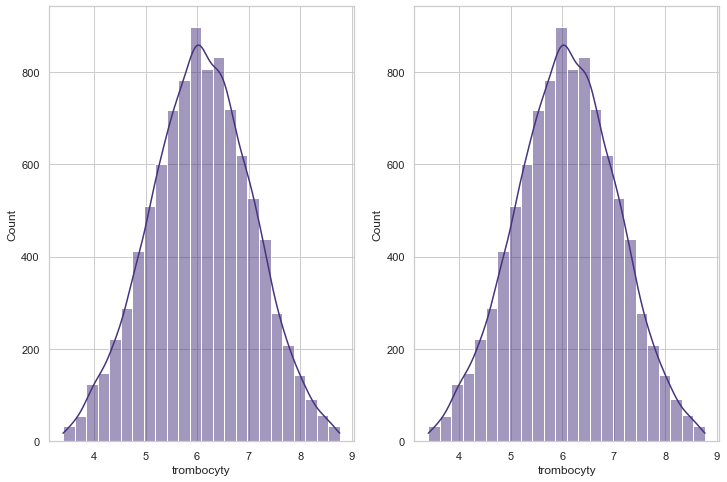

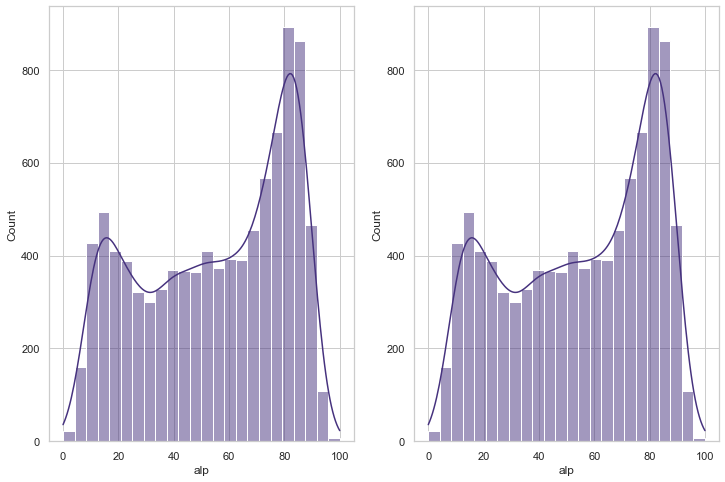

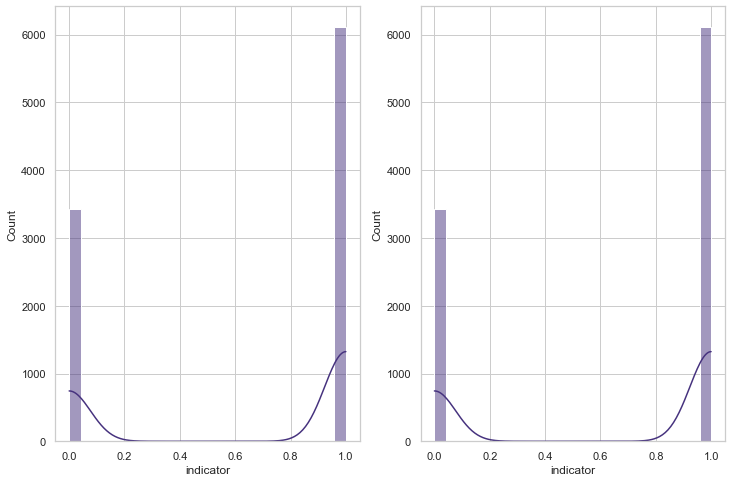

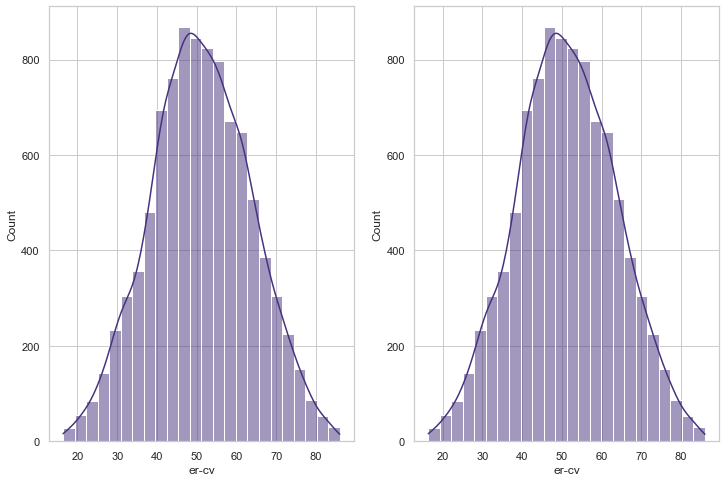

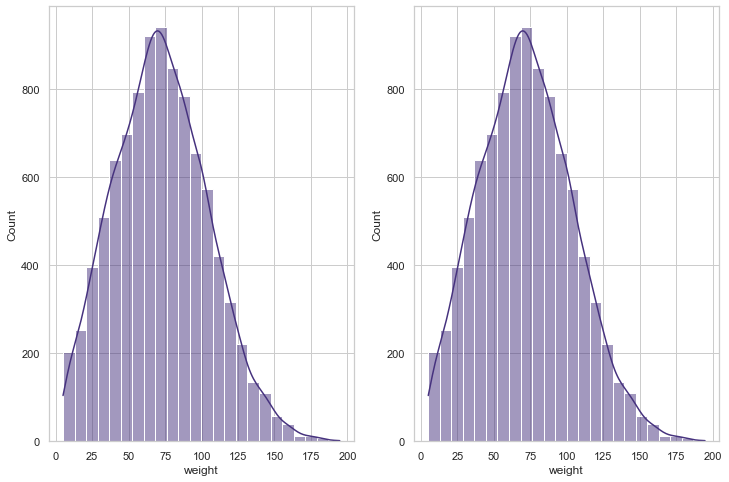

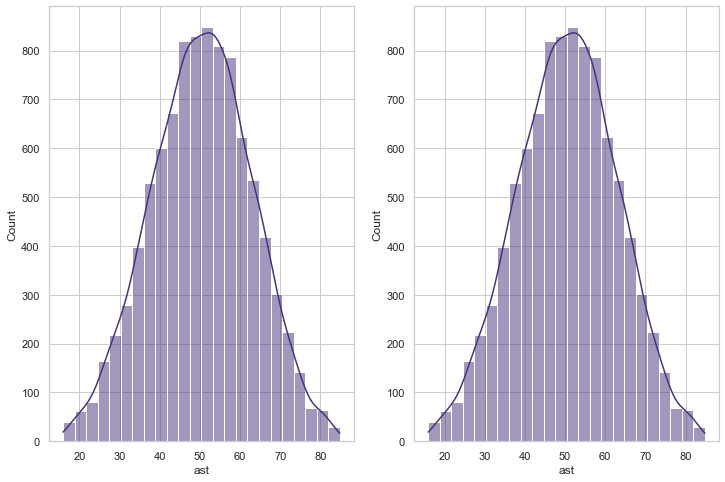

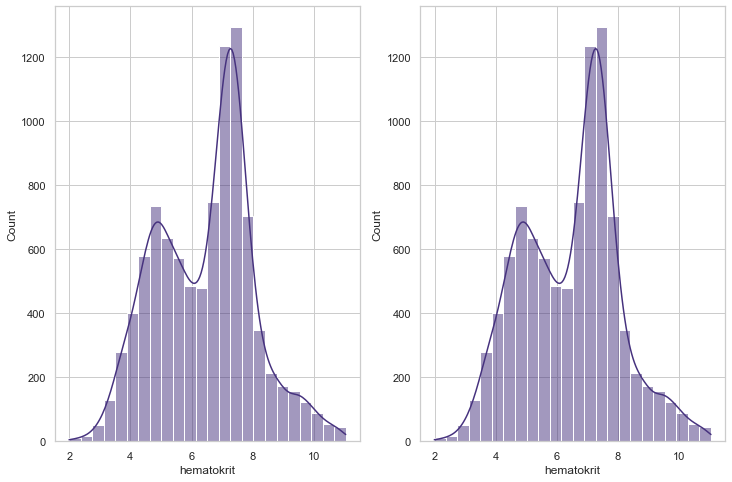

In [218]:
display_numerical_histplots(merged_data, testing_merged_data, float_columns)


In [219]:
merged_data = testing_merged_data.copy()

## b) Realizácia predspracovania dát


V prvom rade, sme si odstránili všetky nenumerické atribúty medzi ktoré patria:
* name
* ssn
* address
* residence
* location
* birthdate

In [220]:
merged_data

,smoker,hbver,erytrocyty,alt,leukocyty,etytr,hemoglobin,trombocyty,alp,relationship,indicator,er-cv,weight,ast,hematokrit,race,blood_group,sex
0,1,4.98718,8.89463,2.111445,5.75830,6.93712,4.54976,6.23782,45.93625,4,0,55.43592,67.600407,51.62366,3.34206,0,4,1
1,0,5.00648,7.27841,0.825630,5.54481,5.03221,7.70354,7.42732,50.72980,1,1,62.99586,146.161350,59.24840,6.85814,0,4,1
2,1,6.71966,7.01351,1.003770,5.66778,5.12799,7.73316,5.42279,54.52797,1,1,61.66052,90.390840,46.12997,6.78850,0,4,1
3,1,6.67732,4.21847,0.660720,6.29064,5.19990,4.10863,6.27100,20.30249,4,0,45.34617,81.565330,61.59374,5.78180,0,6,0
4,1,6.06875,5.68453,0.588180,3.90764,5.87943,6.89656,7.03818,84.46671,4,1,45.02880,93.784280,64.44051,8.14506,0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9537,1,5.56044,7.88598,1.256980,6.44806,4.91910,5.42717,5.95845,71.09634,4,1,62.05093,96.062210,56.75972,6.44557,4,4,0
9538,0,6.02362,4.17512,0.512250,5.81361,5.63849,4.22984,5.86267,33.94788,3,0,61.71716,43.582210,35.73155,5.78540,4,4,0
9539,1,5.63262,5.74856,0.395970,7.16376,5.98503,7.57294,6.82832,54.70713,5,1,82.43138,18.298130,51.29995,7.69555,4,6,1
9540,0,6.74328,7.27587,0.982700,4.87883,4.79271,6.66698,8.27491,81.65971,2,1,62.57684,113.125630,27.24570,7.23617,4,6,1


Uloženie dát do nového .csv súboru pre úpravami v prípade, že by sme sa k nim chceli vrátiť

In [221]:
merged_data.to_csv("dataset/merged.csv")

Odstánenie všetkých atribútov typu object

In [222]:
merged_data.drop(merged_data.select_dtypes(include = {'object', 'datetime64'}), axis = 1, inplace = True)

merged_data

,smoker,hbver,erytrocyty,alt,leukocyty,etytr,hemoglobin,trombocyty,alp,relationship,indicator,er-cv,weight,ast,hematokrit,race,blood_group,sex
0,1,4.98718,8.89463,2.111445,5.75830,6.93712,4.54976,6.23782,45.93625,4,0,55.43592,67.600407,51.62366,3.34206,0,4,1
1,0,5.00648,7.27841,0.825630,5.54481,5.03221,7.70354,7.42732,50.72980,1,1,62.99586,146.161350,59.24840,6.85814,0,4,1
2,1,6.71966,7.01351,1.003770,5.66778,5.12799,7.73316,5.42279,54.52797,1,1,61.66052,90.390840,46.12997,6.78850,0,4,1
3,1,6.67732,4.21847,0.660720,6.29064,5.19990,4.10863,6.27100,20.30249,4,0,45.34617,81.565330,61.59374,5.78180,0,6,0
4,1,6.06875,5.68453,0.588180,3.90764,5.87943,6.89656,7.03818,84.46671,4,1,45.02880,93.784280,64.44051,8.14506,0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9537,1,5.56044,7.88598,1.256980,6.44806,4.91910,5.42717,5.95845,71.09634,4,1,62.05093,96.062210,56.75972,6.44557,4,4,0
9538,0,6.02362,4.17512,0.512250,5.81361,5.63849,4.22984,5.86267,33.94788,3,0,61.71716,43.582210,35.73155,5.78540,4,4,0
9539,1,5.63262,5.74856,0.395970,7.16376,5.98503,7.57294,6.82832,54.70713,5,1,82.43138,18.298130,51.29995,7.69555,4,6,1
9540,0,6.74328,7.27587,0.982700,4.87883,4.79271,6.66698,8.27491,81.65971,2,1,62.57684,113.125630,27.24570,7.23617,4,6,1


In [223]:
merged_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9542 entries, 0 to 9541
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   smoker        9542 non-null   int32  
 1   hbver         9542 non-null   float64
 2   erytrocyty    9542 non-null   float64
 3   alt           9542 non-null   float64
 4   leukocyty     9542 non-null   float64
 5   etytr         9542 non-null   float64
 6   hemoglobin    9542 non-null   float64
 7   trombocyty    9542 non-null   float64
 8   alp           9542 non-null   float64
 9   relationship  9542 non-null   int64  
 10  indicator     9542 non-null   int32  
 11  er-cv         9542 non-null   float64
 12  weight        9542 non-null   float64
 13  ast           9542 non-null   float64
 14  hematokrit    9542 non-null   float64
 15  race          9542 non-null   int64  
 16  blood_group   9542 non-null   int64  
 17  sex           9542 non-null   int32  
dtypes: float64(12), int32(3), in

In [343]:
from sklearn.model_selection import train_test_split

def split_data(dataset, size, state):
    return train_test_split(dataset, test_size=size, random_state=state)

In [344]:
merged_data


,smoker,hbver,erytrocyty,alt,leukocyty,etytr,hemoglobin,trombocyty,alp,relationship,indicator,er-cv,weight,ast,hematokrit,race,blood_group,sex
0,1,4.98718,8.89463,2.111445,5.75830,6.93712,4.54976,6.23782,45.93625,4,0,55.43592,67.600407,51.62366,3.34206,0,4,1
1,0,5.00648,7.27841,0.825630,5.54481,5.03221,7.70354,7.42732,50.72980,1,1,62.99586,146.161350,59.24840,6.85814,0,4,1
2,1,6.71966,7.01351,1.003770,5.66778,5.12799,7.73316,5.42279,54.52797,1,1,61.66052,90.390840,46.12997,6.78850,0,4,1
3,1,6.67732,4.21847,0.660720,6.29064,5.19990,4.10863,6.27100,20.30249,4,0,45.34617,81.565330,61.59374,5.78180,0,6,0
4,1,6.06875,5.68453,0.588180,3.90764,5.87943,6.89656,7.03818,84.46671,4,1,45.02880,93.784280,64.44051,8.14506,0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9537,1,5.56044,7.88598,1.256980,6.44806,4.91910,5.42717,5.95845,71.09634,4,1,62.05093,96.062210,56.75972,6.44557,4,4,0
9538,0,6.02362,4.17512,0.512250,5.81361,5.63849,4.22984,5.86267,33.94788,3,0,61.71716,43.582210,35.73155,5.78540,4,4,0
9539,1,5.63262,5.74856,0.395970,7.16376,5.98503,7.57294,6.82832,54.70713,5,1,82.43138,18.298130,51.29995,7.69555,4,6,1
9540,0,6.74328,7.27587,0.982700,4.87883,4.79271,6.66698,8.27491,81.65971,2,1,62.57684,113.125630,27.24570,7.23617,4,6,1


In [345]:
training_data, testing_data = split_data(merged_data, 0.25, 25)

In [346]:
training_data

,smoker,hbver,erytrocyty,alt,leukocyty,etytr,hemoglobin,trombocyty,alp,relationship,indicator,er-cv,weight,ast,hematokrit,race,blood_group,sex
7433,1,7.11577,6.89604,0.87475,4.27852,5.18967,6.74443,6.05354,83.83442,0,1,52.97515,67.80356,30.53281,7.36825,4,6,0
5970,0,6.21022,4.75367,0.40265,4.91083,5.65163,4.93825,6.16399,55.78735,4,0,41.74361,51.53481,45.98273,4.67414,4,4,1
2732,0,6.98939,5.48411,0.63729,6.01959,4.59255,4.85923,5.97029,53.63644,4,1,77.03702,67.65246,25.34113,7.58605,4,2,1
4647,1,4.14123,4.54228,0.19204,6.68938,6.85113,7.71531,7.64038,55.17149,4,1,49.96126,33.91436,34.55417,8.29635,4,4,1
2235,0,5.38337,7.49654,1.09066,7.26850,5.34412,3.46287,6.67480,16.61751,1,1,47.17137,84.59153,52.05354,8.65907,2,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1175,0,5.03378,7.07644,0.74868,6.61567,4.53641,4.22759,5.77337,33.47031,5,1,64.02449,72.64568,62.99343,7.07865,1,3,0
8447,1,4.19229,5.74996,0.50020,5.10005,6.42235,9.62790,7.39094,12.09416,2,1,54.06941,67.99203,43.19515,6.49353,4,6,1
2934,0,6.15958,6.68865,0.58624,5.11874,5.32299,6.83223,7.13814,74.96693,0,1,51.49852,93.96373,46.74690,7.50798,3,7,1
6618,0,6.78041,7.14476,0.88021,6.11030,2.92355,5.74362,5.33375,89.12130,2,0,60.92369,50.71782,56.75800,3.34776,4,2,1


In [347]:
testing_data

# TU BUDE FUNKCIA, KTORA SPLITNE MERGED_DATA NA TRAINING A TESTING
# A DALEJ ROBIT CASTI 2 a 3 LEN NA TRAINING

# TREBA MAT FUNKCIU NA SPLIT MERGED_DATA NA TRAINING A TESTING AJ PRETO
# LEBO TO TREBA MAT PERZISTENTNE, ABY SME TO VEDELI SPLITNUT A TRENOVAT
# S NOVYM DATASETOM VIACKRAT A NECHAT SI LEN TO NAJLEPSIE

# TO SICE V PODMIENKACH 2.FAZY NIE JE, ALE DOBUDUCNA TO TREBA

,smoker,hbver,erytrocyty,alt,leukocyty,etytr,hemoglobin,trombocyty,alp,relationship,indicator,er-cv,weight,ast,hematokrit,race,blood_group,sex
6409,0,6.03423,6.404260,0.599900,4.65384,4.87438,4.82234,5.93582,50.93144,2,1,64.59131,48.67240,28.83709,7.20419,1,5,0
3588,1,4.71355,6.695842,0.569920,7.94259,8.01067,9.75886,5.65609,12.65894,2,1,41.73128,91.44908,51.66456,7.64759,0,3,1
1548,1,6.03920,8.077850,1.494050,7.45209,6.00264,4.12625,6.63690,25.99240,2,1,38.20987,83.02124,25.82746,8.79688,1,6,1
4348,1,6.64693,8.922550,2.111445,6.32866,6.28105,5.00473,6.00103,59.67563,0,0,45.83513,90.29187,55.22106,3.16730,4,5,1
2006,0,5.72025,5.643650,0.573110,5.88083,6.50695,9.59458,4.81289,8.53021,4,1,42.00761,70.95643,33.72688,7.65402,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7414,0,5.02338,8.024750,1.428920,6.63009,5.29343,4.33189,6.75456,34.31302,3,1,71.01298,107.60256,30.98959,8.07642,4,7,0
7249,0,5.76382,8.661470,1.853750,5.69670,3.39434,5.71703,6.25907,85.99623,1,0,39.74756,124.47906,39.74532,3.32588,1,6,0
684,0,5.75719,7.060460,0.675770,5.75068,4.29645,4.07855,6.08234,25.10811,2,1,56.11850,83.30527,63.28277,5.06710,4,3,1
747,0,6.14067,5.412250,0.614730,4.40173,3.86452,5.88575,6.62729,82.70474,3,0,46.43984,141.21917,53.38619,4.26845,1,2,1


In [360]:
# funkcia, ktora je uz pripravena na celu 2.cast s ohladom na 4.cast
# ta method v powertransformer mozno nepojde, ale cca toto sa tu chce
# mozes na to este pozriet
def transform_and_scale_dataset(dataset):
    pipeline = Pipeline([('power', PowerTransformer(method='yeo-johnson', standardize=False)),
                         ('scaler', MinMaxScaler())])
    print(pipeline)
    pipeline.fit(dataset)
    transformed = pipeline.transform(dataset)
    #transformed.columns = dataset.columns.copy()

    return transformed

In [361]:
transformed_data = transform_and_scale_dataset(merged_data)

Pipeline(steps=[('power', PowerTransformer(standardize=False)),
                ('scaler', MinMaxScaler())])


In [362]:
transformed_data


array([[1.        , 0.29406915, 0.75776065, ..., 0.        , 0.62837049,
        1.        ],
       [0.        , 0.29772499, 0.49596984, ..., 0.        , 0.62837049,
        1.        ],
       [1.        , 0.62237812, 0.45525531, ..., 0.        , 0.62837049,
        1.        ],
       ...,
       [1.        , 0.41634969, 0.2699343 , ..., 1.        , 0.88118524,
        1.        ],
       [0.        , 0.62685595, 0.49557642, ..., 1.        , 0.88118524,
        1.        ],
       [0.        , 0.65035865, 0.07881965, ..., 1.        , 0.88118524,
        1.        ]])

In [363]:
merged_data.describe()

,smoker,hbver,erytrocyty,alt,leukocyty,etytr,hemoglobin,trombocyty,alp,relationship,indicator,er-cv,weight,ast,hematokrit,race,blood_group,sex
count,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000
mean,0.406099,6.069171,6.930739,0.932579,6.071661,5.267386,6.061181,6.079948,54.620443,2.527877,0.640327,51.135435,72.422802,50.499787,6.449626,2.608258,3.525466,0.518445
std,0.491129,0.964593,1.272078,0.512126,0.968828,1.244723,1.742794,0.981443,26.139456,1.528203,0.479930,12.568477,32.135347,12.535278,1.597436,1.558948,2.283110,0.499686
min,0.000000,3.434000,3.659460,0.000000,3.444770,2.067800,0.856625,3.397180,0.000000,0.000000,0.000000,16.387250,5.046350,15.923328,1.991860,0.000000,0.000000,0.000000
25%,0.000000,5.410637,6.148961,0.564083,5.414178,4.440820,4.773087,5.409823,31.405380,1.000000,0.000000,42.505820,49.169078,41.835828,5.120088,1.000000,2.000000,0.000000
50%,0.000000,6.069075,7.018945,0.779025,6.079405,5.117360,6.117640,6.076400,58.705070,2.000000,1.000000,50.858040,71.372615,50.694730,6.750770,4.000000,4.000000,1.000000
75%,1.000000,6.731940,7.799945,1.166713,6.727812,6.023055,7.384062,6.758015,78.885685,4.000000,1.000000,59.918200,94.018755,59.110827,7.490312,4.000000,6.000000,1.000000
max,1.000000,8.710810,10.283370,2.111459,8.695830,8.391400,11.237110,8.767650,100.000000,5.000000,1.000000,85.981520,194.734070,84.846140,11.044230,4.000000,7.000000,1.000000


In [364]:
merged_data


,smoker,hbver,erytrocyty,alt,leukocyty,etytr,hemoglobin,trombocyty,alp,relationship,indicator,er-cv,weight,ast,hematokrit,race,blood_group,sex
0,1,4.98718,8.89463,2.111445,5.75830,6.93712,4.54976,6.23782,45.93625,4,0,55.43592,67.600407,51.62366,3.34206,0,4,1
1,0,5.00648,7.27841,0.825630,5.54481,5.03221,7.70354,7.42732,50.72980,1,1,62.99586,146.161350,59.24840,6.85814,0,4,1
2,1,6.71966,7.01351,1.003770,5.66778,5.12799,7.73316,5.42279,54.52797,1,1,61.66052,90.390840,46.12997,6.78850,0,4,1
3,1,6.67732,4.21847,0.660720,6.29064,5.19990,4.10863,6.27100,20.30249,4,0,45.34617,81.565330,61.59374,5.78180,0,6,0
4,1,6.06875,5.68453,0.588180,3.90764,5.87943,6.89656,7.03818,84.46671,4,1,45.02880,93.784280,64.44051,8.14506,0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9537,1,5.56044,7.88598,1.256980,6.44806,4.91910,5.42717,5.95845,71.09634,4,1,62.05093,96.062210,56.75972,6.44557,4,4,0
9538,0,6.02362,4.17512,0.512250,5.81361,5.63849,4.22984,5.86267,33.94788,3,0,61.71716,43.582210,35.73155,5.78540,4,4,0
9539,1,5.63262,5.74856,0.395970,7.16376,5.98503,7.57294,6.82832,54.70713,5,1,82.43138,18.298130,51.29995,7.69555,4,6,1
9540,0,6.74328,7.27587,0.982700,4.87883,4.79271,6.66698,8.27491,81.65971,2,1,62.57684,113.125630,27.24570,7.23617,4,6,1
